<a href="https://colab.research.google.com/github/Sikoros/learning/blob/main/Sikoro_vkr_project_open_credit_card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  1. Общее описание

**Аналитическая задача** — провести анализ данных с целью выделения портрета клиентов, которые будут открывать карту, и портрета клиентов, которые не будут открывать карту.

## Описание данных
Каждый клиент описывается следующим набором признаков:

|Признак|Комментарий|
|--:|:--|
|`client_id`|Идентификационный номер|
|`gender`|Пол|
|`age`|Возраст|
|`marital_status`|Семейный статус|
|`job_position`|Работа|
|`credit_sum`|Сумма кредита|
|`credit_month`|Срок кредитования|
|`score_shk`|Внутренняя скоринговая оценка|
|`education`|Образование|
|`tariff_id`|Идентификационный номер тарифа|
|`living_region`|Регион|
|`monthly_income`|Месячный заработок|
|`credit_count`|Количество кредитов у клиента|
|`overdue_credit_count`|Количество просроченных кредитов у клиента|
|`open_account_flg`|Факт открытия кредитного счета в данном банке|
|`avregzarplata`|Средняя заработная плата в регионе|
|`okrug`|Федеральный округ|
|date_bank|Дата обращения в банк|

## Примерный план по выполнению проекта

**Шаг 1.** Загрузка данных;

**Шаг 2.** Первичная обработка данных (при необходимости):
- скорректировать заголовки;
- скорректировать типы признаков;
- проверить наличие дублирующихся записей;
- проверить наличие аномальных значений;
- восстановить пропущенные значения;

**Шаг 3.** Провести исследовательский анализ данных:
- исследовать распределения признаков;
- исследовать возможные зависимости между признаками;

**Шаг 4.** Отбор признаков и портреты клиентов:
- исследовать признаки в разрезе групп;
- выявить наличие значимых различий в значениям признаков в разрезе групп;
- сформулировать и проверить гипотезы о равенстве значений показателей по группам

**Шаг 5.** Построить классификационные модели
- Построить несколько моделей классификации и сравнить их.
- Исследовать возможные зависимости между признаками.

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка методов для проверки характера распределния признаков (нормальное/ другое)
from scipy.stats import shapiro
from scipy.stats import kstest
from scipy.stats import ks_2samp
from scipy.stats import anderson
from scipy.stats import jarque_bera

#подключение тестов для проверки гипотезы о равенстве параметров распределений
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal

from scipy import stats

from scipy.stats import pearsonr, spearmanr, kendalltau, pointbiserialr

# Загрузка данных

In [ ]:
df = pd.read_csv('/content/vkr_dataset_open_credit_card.csv')
df.head(5)

client_id  gender   age  marital_status  job_position credit_sum  \
0          1       2  48.0             3.0            15      59998   
1          2       1  28.0             NaN            15      10889   
2          3       2  32.0             3.0            14      10728   
3          4       1  27.0             2.0            14   12009,09   
4          5       2  45.0             3.0            14   16908,89   

   credit_month score_shk  education  tariff_id  living_region  okrug  \
0            10  0,770249        2.0         28           23.0    8.0   
1             6  0,248514        2.0          2           30.0    7.0   
2            12  0,459589        4.0          2           64.0    2.0   
3            12  0,362536        2.0          2            8.0    8.0   
4            10  0,421385        4.0          2           77.0    6.0   

   avregzarplata  monthly_income  credit_count  overdue_credit_count  \
0        25850.0         30000.0           1.0                   1.0   
1        66880.0         43000.0           2.0                   0.0   
2        23430.0         23000.0           5.0                   0.0   
3        23650.0         17000.0           2.0                   0.0   
4        26620.0             NaN           1.0                   0.0   

   open_account_flg            date_bank  
0                 0  2016-02-16 18:54:34  
1                 0  2016-02-15 12:39:04  
2                 0  2015-01-27 18:57:19  
3                 0  2019-05-02 17:57:10  
4                 0  2015-09-22 16:28:33

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170746 entries, 0 to 170745
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   client_id             170746 non-null  int64  
 1   gender                170746 non-null  int64  
 2   age                   170744 non-null  float64
 3   marital_status        170741 non-null  float64
 4   job_position          170746 non-null  int64  
 5   credit_sum            170745 non-null  object 
 6   credit_month          170746 non-null  int64  
 7   score_shk             170743 non-null  object 
 8   education             170743 non-null  float64
 9   tariff_id             170746 non-null  int64  
 10  living_region         170554 non-null  float64
 11  okrug                 170554 non-null  float64
 12  avregzarplata         170554 non-null  float64
 13  monthly_income        170744 non-null  float64
 14  credit_count          161516 non-null  float64
 15  

In [ ]:
print(df.select_dtypes(include=['object']).columns)

Index(['credit_sum', 'score_shk', 'date_bank'], dtype='object')


Изменить тип данных:
- 'credit_sum' на float64 (разделитель запятая);
- 'score_shk' на float64 (разделитель запятая);
- 'date_bank' на datetime64.

Признаки, содержащие пропущенные значения:

In [ ]:
df_null = df.isna().sum()
df_null.loc[df_null > 0]

def missing_summary_table(df):
  miss_df = pd.concat([df.isna().sum().to_frame(name = '1'),
                 np.round(df.isna().mean().to_frame(name = '2')*100,
                          decimals = 2)],
                axis = 1).reset_index()
  miss_df.columns = ['Признак',
               'Количество пропусков',
               'Процент пропусков']
  miss_df.sort_values(by = 'Количество пропусков',
                      ascending = False, inplace = True)
  miss_df['Процент пропусков'] = (miss_df['Процент пропусков'].
                                  map('{:,.2f}%'.format))
  return miss_df.style.set_caption('Сводная таблица по пропускам')

miss_table = missing_summary_table(df)
miss_table

In [ ]:
df.describe()

client_id         gender            age  marital_status  \
count  170746.000000  170746.000000  170744.000000   170741.000000   
mean    85373.500000       1.480532      36.497312        3.197586   
std     49290.268869       0.499622      10.546067        0.738570   
min         1.000000       1.000000      18.000000        1.000000   
25%     42687.250000       1.000000      28.000000        3.000000   
50%     85373.500000       1.000000      34.000000        3.000000   
75%    128059.750000       2.000000      43.000000        4.000000   
max    170746.000000       2.000000      71.000000        5.000000   

        job_position   credit_month      education      tariff_id  \
count  170746.000000  170746.000000  170743.000000  170746.000000   
mean       13.160015      10.980749       3.202714      14.118831   
std         3.132421       3.536698       1.064026      11.546768   
min         1.000000       3.000000       1.000000       1.000000   
25%        14.000000      10.000000       2.000000       2.000000   
50%        14.000000      10.000000       4.000000      19.000000   
75%        14.000000      12.000000       4.000000      28.000000   
max        18.000000      36.000000       5.000000      33.000000   

       living_region          okrug  avregzarplata  monthly_income  \
count  170554.000000  170554.000000  170554.000000   170744.000000   
mean       43.010009       4.817102   32957.702898    40138.377015   
std        22.219760       2.263194   12577.448541    25044.251878   
min         1.000000       1.000000   16830.000000     5000.000000   
25%        25.000000       2.000000   25520.000000    25000.000000   
50%        40.000000       5.000000   27390.000000    35000.000000   
75%        63.000000       7.000000   42460.000000    50000.000000   
max        82.000000       8.000000   66880.000000   950000.000000   

        credit_count  overdue_credit_count  open_account_flg  
count  161516.000000         161516.000000     170746.000000  
mean        2.107308              0.046070          0.176028  
std         1.777128              0.211548          0.380845  
min         0.000000              0.000000          0.000000  
25%         1.000000              0.000000          0.000000  
50%         2.000000              0.000000          0.000000  
75%         3.000000              0.000000          0.000000  
max        21.000000              3.000000          1.000000

Промежуточный вывод: Анализ значений описательных статистик позволяет сделать следующие выводы:

1. В выборке клиентов с половой принадлежность 1 немного больше;
2. Возраст 3/4 исследуемой аудитории младше 43 лет;
3. Более 50% клиентов имеют семейное полоежение с кодом 3 и более;
4. 75% клиентов берут кредит на срок более 10 месяцев;
5. Средняя заработная плата клиентов составляет около 40 000 д.е. при этом выше среднестатистической;
6. 3/4 клиентов не оформляют более 3 кредов;
7. 75% клиентов не имеют просроченных кредитов, при этом не оформляют кредитные карты в данном банке.

In [ ]:
open_account_percent = df.open_account_flg.value_counts(1)*100
print('''
Процентное соотношение клиентов, открывших кредитный счет в банке:
Счет открыт - {}
Счет отсутствует - {}
      '''.format(round(open_account_percent[1], 2),
                 round(open_account_percent[0], 2)))


Процентное соотношение клиентов, открывших кредитный счет в банке:
Счет открыт - 17.6
Счет отсутствует - 82.4
      


# Предобработка данных

1. Корректировка заголовков признаков

In [ ]:
df.columns

Index(['client_id', 'gender', 'age', 'marital_status', 'job_position',
       'credit_sum', 'credit_month', 'score_shk', 'education', 'tariff_id',
       'living_region', 'okrug', 'avregzarplata', 'monthly_income',
       'credit_count', 'overdue_credit_count', 'open_account_flg',
       'date_bank'],
      dtype='object')

In [ ]:
df.rename(columns = {'avregzarplata' : 'avg_income'},
          inplace = True)

Проверка

In [ ]:
print(df.select_dtypes(include = ['object']).columns)

Index(['credit_sum', 'score_shk', 'date_bank'], dtype='object')


2. Приведение типов данных

In [ ]:
df.credit_sum = df.credit_sum.str.replace(',','.')
df.score_shk = df.score_shk.str.replace(',','.')

In [ ]:
df = df.astype({'credit_sum' : 'float64',
                'score_shk' : 'float64',
                'date_bank' : 'datetime64'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170746 entries, 0 to 170745
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   client_id             170746 non-null  int64         
 1   gender                170746 non-null  int64         
 2   age                   170744 non-null  float64       
 3   marital_status        170741 non-null  float64       
 4   job_position          170746 non-null  int64         
 5   credit_sum            170745 non-null  float64       
 6   credit_month          170746 non-null  int64         
 7   score_shk             170743 non-null  float64       
 8   education             170743 non-null  float64       
 9   tariff_id             170746 non-null  int64         
 10  living_region         170554 non-null  float64       
 11  okrug                 170554 non-null  float64       
 12  avg_income            170554 non-null  float64       
 13 

In [ ]:
df.head(5)

client_id  gender   age  marital_status  job_position  credit_sum  \
0          1       2  48.0             3.0            15    59998.00   
1          2       1  28.0             NaN            15    10889.00   
2          3       2  32.0             3.0            14    10728.00   
3          4       1  27.0             2.0            14    12009.09   
4          5       2  45.0             3.0            14    16908.89   

   credit_month  score_shk  education  tariff_id  living_region  okrug  \
0            10   0.770249        2.0         28           23.0    8.0   
1             6   0.248514        2.0          2           30.0    7.0   
2            12   0.459589        4.0          2           64.0    2.0   
3            12   0.362536        2.0          2            8.0    8.0   
4            10   0.421385        4.0          2           77.0    6.0   

   avg_income  monthly_income  credit_count  overdue_credit_count  \
0     25850.0         30000.0           1.0                   1.0   
1     66880.0         43000.0           2.0                   0.0   
2     23430.0         23000.0           5.0                   0.0   
3     23650.0         17000.0           2.0                   0.0   
4     26620.0             NaN           1.0                   0.0   

   open_account_flg           date_bank  
0                 0 2016-02-16 18:54:34  
1                 0 2016-02-15 12:39:04  
2                 0 2015-01-27 18:57:19  
3                 0 2019-05-02 17:57:10  
4                 0 2015-09-22 16:28:33

После приведения типов к числовым еще раз посмотрим на основные статистики

In [ ]:
df.describe()

client_id         gender            age  marital_status  \
count  170746.000000  170746.000000  170744.000000   170741.000000   
mean    85373.500000       1.480532      36.497312        3.197586   
std     49290.268869       0.499622      10.546067        0.738570   
min         1.000000       1.000000      18.000000        1.000000   
25%     42687.250000       1.000000      28.000000        3.000000   
50%     85373.500000       1.000000      34.000000        3.000000   
75%    128059.750000       2.000000      43.000000        4.000000   
max    170746.000000       2.000000      71.000000        5.000000   

        job_position     credit_sum   credit_month      score_shk  \
count  170746.000000  170745.000000  170746.000000  170743.000000   
mean       13.160015   26095.102278      10.980749       0.469471   
std         3.132421   16234.826253       3.536698       0.124268   
min         1.000000    2736.000000       3.000000       0.000000   
25%        14.000000   14908.000000      10.000000       0.379495   
50%        14.000000   21229.000000      10.000000       0.461599   
75%        14.000000   32068.000000      12.000000       0.552412   
max        18.000000  200000.000000      36.000000       1.128291   

           education      tariff_id  living_region          okrug  \
count  170743.000000  170746.000000  170554.000000  170554.000000   
mean        3.202714      14.118831      43.010009       4.817102   
std         1.064026      11.546768      22.219760       2.263194   
min         1.000000       1.000000       1.000000       1.000000   
25%         2.000000       2.000000      25.000000       2.000000   
50%         4.000000      19.000000      40.000000       5.000000   
75%         4.000000      28.000000      63.000000       7.000000   
max         5.000000      33.000000      82.000000       8.000000   

          avg_income  monthly_income   credit_count  overdue_credit_count  \
count  170554.000000   170744.000000  161516.000000         161516.000000   
mean    32957.702898    40138.377015       2.107308              0.046070   
std     12577.448541    25044.251878       1.777128              0.211548   
min     16830.000000     5000.000000       0.000000              0.000000   
25%     25520.000000    25000.000000       1.000000              0.000000   
50%     27390.000000    35000.000000       2.000000              0.000000   
75%     42460.000000    50000.000000       3.000000              0.000000   
max     66880.000000   950000.000000      21.000000              3.000000   

       open_account_flg  
count     170746.000000  
mean           0.176028  
std            0.380845  
min            0.000000  
25%            0.000000  
50%            0.000000  
75%            0.000000  
max            1.000000

3. Проверка наличия дублирующихся записей

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop(columns = ['client_id']).duplicated().sum()

0

Дублирующиеся записи отсутствуют

4. Проверка наличия аномальных значений.

Формирование списков категориальных и непрерывных признаков

In [ ]:
df.columns

Index(['client_id', 'gender', 'age', 'marital_status', 'job_position',
       'credit_sum', 'credit_month', 'score_shk', 'education', 'tariff_id',
       'living_region', 'okrug', 'avg_income', 'monthly_income',
       'credit_count', 'overdue_credit_count', 'open_account_flg',
       'date_bank'],
      dtype='object')

In [ ]:
var_cont = ['age', 'credit_sum',  'score_shk', 'living_region', 'avg_income',
            'monthly_income',] # непрерывные признаки
var_cat = ['gender', 'marital_status', 'job_position','credit_month',
           'education', 'tariff_id', 'okrug', 'credit_count',
           'overdue_credit_count', 'open_account_flg'] # категориальные признаки

In [ ]:
dict_to_rus = {
'gender' :	'Пол',
'age' :	'Возраст',
'marital_status' :	'Семейный статус',
'job_position' :	'Работа',
'credit_sum' :	'Сумма кредита',
'credit_month' :	'Срок кредитования',
'score_shk' :	'Внутренняя скоринговая оценка',
'education' :	'Образование',
'tariff_id' :	'Идентификационный номер тарифа',
'living_region' :	'Регион',
'monthly_income' :	'Месячный заработок',
'credit_count' :	'Количество кредитов у клиента',
'overdue_credit_count' :	'Количество просроченных кредитов',
'open_account_flg' :	'Наличие кредитного счета',
'avg_income' :	'Средняя заработная плата в регионе',
'okrug' :	'Федеральный округ'
}

Поиск аномалий по непрерывным признакам.
Построение ящиков с усами, функций плотности.

In [ ]:
def calc_boxplot(df_col:pd.Series) -> tuple:
    Q1, median, Q3 = np.percentile(np.asarray(df_col.dropna()), [25, 50, 75])
    IQR = Q3 - Q1
    loval = Q1 - 1.5 * IQR
    hival = Q3 + 1.5 * IQR
    wiskhi = np.compress(np.asarray(df_col) <= hival, np.asarray(df_col))
    wisklo = np.compress(np.asarray(df_col) >= loval, np.asarray(df_col))
    actual_hival = np.max(wiskhi)
    actual_loval = np.min(wisklo)
    return actual_loval, actual_hival #(нижний ус, верхний ус)

<ipython-input-21-2b9597eba921>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(6, 2, 2*index + 1)
<ipython-input-21-2b9597eba921>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[col], kde = True)
<ipython-input-21-2b9597eba921>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(6, 2, 2*index + 1)
<ipython-input-21-2b9597eba921>:16: UserWarning: 

`distplot

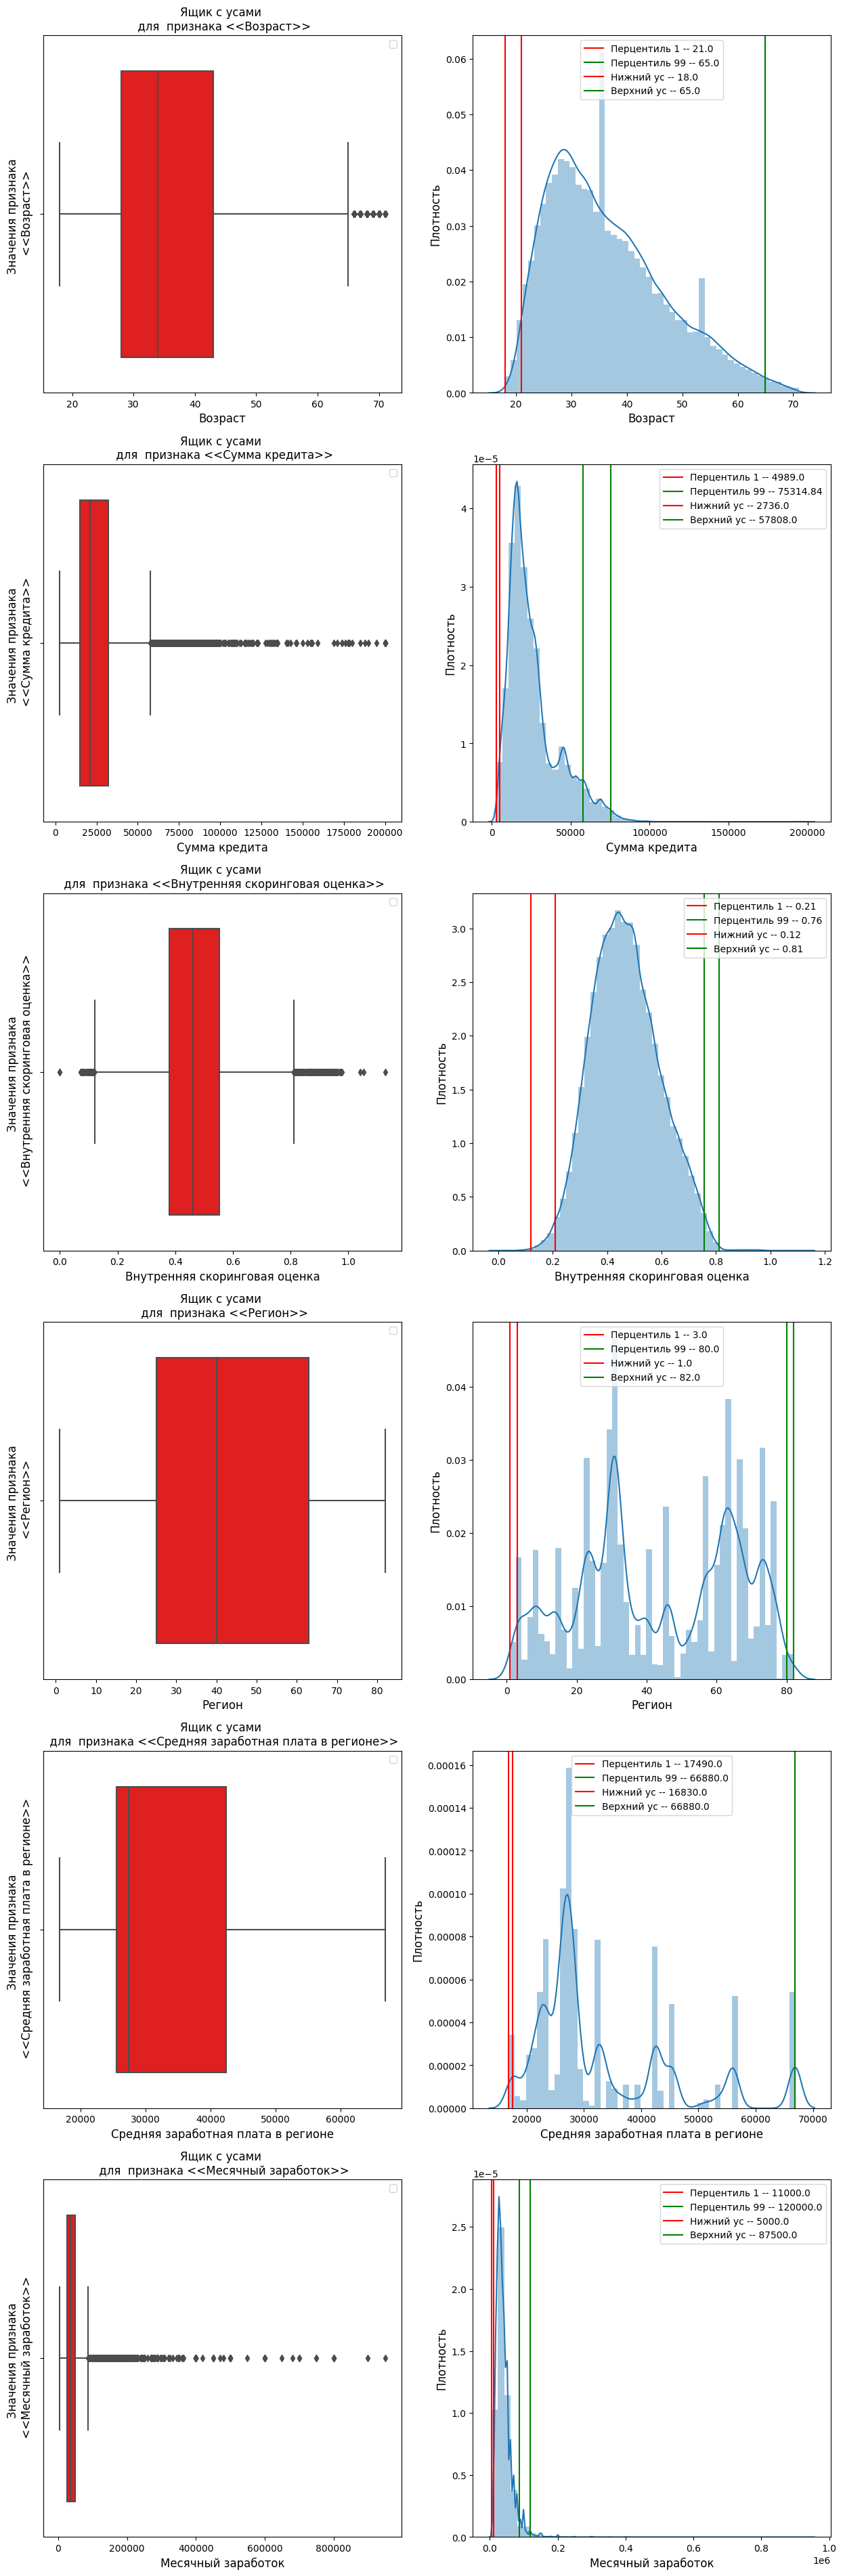

In [ ]:
fig, ax = plt.subplots(6,
                       sharex = True,
                       figsize = (15, 48)
                       )
for index, col in enumerate(var_cont):
    plt.subplot(6, 2, 2*index + 1)
    ax = sns.boxplot(data = df,
                     x = col,
                     color = 'red')
    ax.set_xlabel(dict_to_rus[col], fontsize = 12)
    ax.set_ylabel('Значения признака \n <<{}>>'.format(dict_to_rus[col]), fontsize = 12)

    plt.title('Ящик с усами \n для  признака <<{}>>'.format(dict_to_rus[col]))
    plt.legend()
    plt.subplot(6, 2, 2*index + 2)
    ax = sns.distplot(df[col], kde = True)
    ax.axvline(np.percentile(df[col].dropna(), 1),
           color = 'red',
           label = 'Перцентиль 1 -- {}'.format(np.round(np.percentile(df[col].dropna(), 1), 2)))
    ax.axvline(np.percentile(df[col].dropna(), 99),
           color = 'green',
           label = 'Перцентиль 99 -- {}'.format(np.round(np.percentile(df[col].dropna(), 99), 2)))
    ax.axvline(calc_boxplot(df[col])[0],
           color = 'red',
           label = 'Нижний ус -- {}'.format(np.round(calc_boxplot(df[col])[0], 2))
           )
    ax.axvline(calc_boxplot(df[col])[1],
           color ='green',
           label = 'Верхний ус -- {}'.format(np.round(calc_boxplot(df[col])[1], 2))
           )

    ax.set_xlabel(dict_to_rus[col], fontsize = 12)
    ax.set_ylabel('Плотность', fontsize = 12);
    plt.legend()
plt.show()

Удаление аномалий по непрерывным признакам

In [ ]:
# 'age'
df_copy = df[df.age.between(18, 65) | df.age.isnull()] # фильтр по вернему усу

# 'credit_sum' - без изменений

# 'score_shk'
df_copy = df_copy[df_copy.score_shk.between(0.12, 0.81) |
             df_copy.score_shk.isnull()] # фильтр по вернему и нижжнему усам

# 'living_region' и 'avregzarplata' без аномалий

# 'monthly_income' без изменений

In [ ]:
df_copy.shape[0]

169163

In [ ]:
df.shape[0]

170746

Поиск аномалий по категориальным признакам.
Построение гистограмм.

In [ ]:
var_cat

['gender',
 'marital_status',
 'job_position',
 'credit_month',
 'education',
 'tariff_id',
 'okrug',
 'credit_count',
 'overdue_credit_count',
 'open_account_flg']

In [ ]:
for value in var_cat:
  print(f'''{value}:
{df_copy[value].value_counts()}''')
  print('--'*20)

gender:
1    87641
2    81522
Name: gender, dtype: int64
----------------------------------------
marital_status:
3.0    93262
4.0    51817
2.0    16811
1.0     4173
5.0     3095
Name: marital_status, dtype: int64
----------------------------------------
job_position:
14    133941
15     17579
2       5568
4       3726
10      3458
1       2769
17       653
8        532
16       352
6        239
3        126
18        99
11        63
13        36
5          8
12         8
7          5
9          1
Name: job_position, dtype: int64
----------------------------------------
credit_month:
10    94975
12    44903
6     10071
24     6012
18     2919
14     2557
4      1373
3      1293
8      1010
13      829
9       625
36      490
11      479
5       393
16      390
7       385
15      226
20      114
17       35
19       16
22       11
23       11
30       11
28        8
26        8
21        7
32        4
25        4
27        2
31        1
29        1
Name: credit_month, dtype: int64
----

Построение гистограмм категориальных признаков

<ipython-input-27-cb7b351ac5f7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df_copy[col])


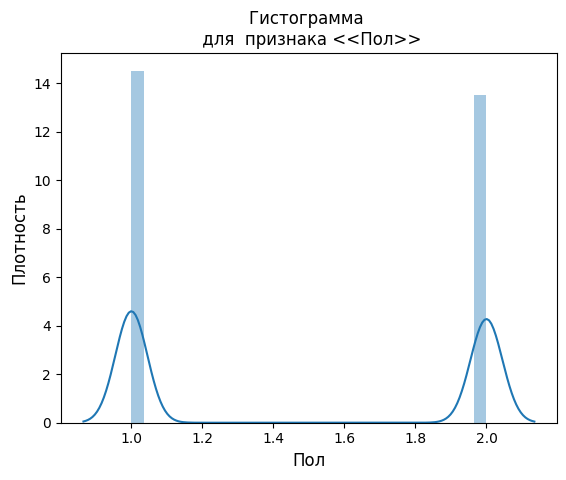

<ipython-input-27-cb7b351ac5f7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df_copy[col])


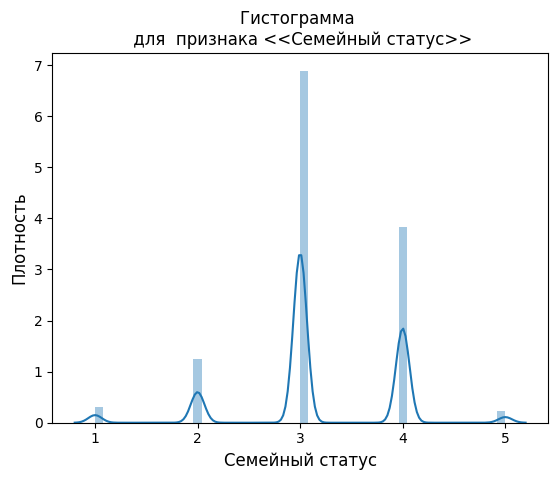

<ipython-input-27-cb7b351ac5f7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df_copy[col])


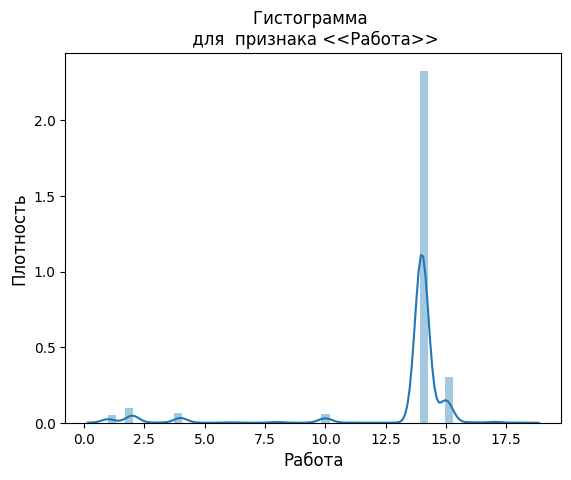

<ipython-input-27-cb7b351ac5f7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df_copy[col])


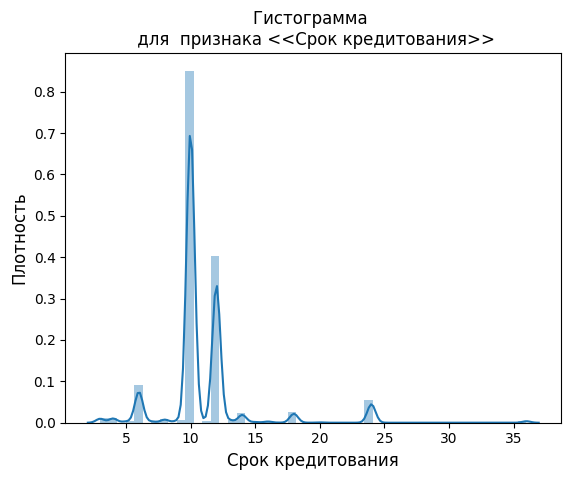

<ipython-input-27-cb7b351ac5f7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df_copy[col])


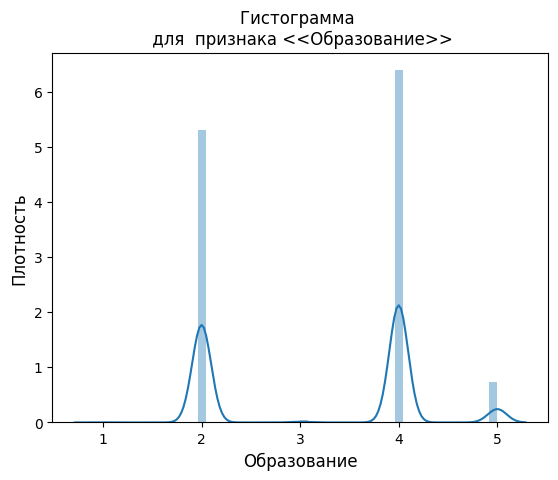

<ipython-input-27-cb7b351ac5f7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df_copy[col])


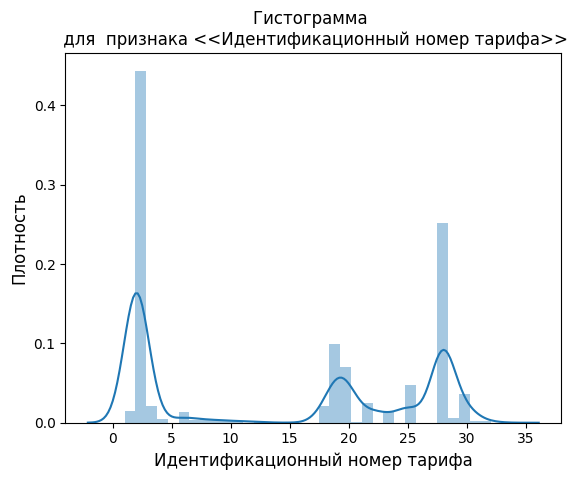

<ipython-input-27-cb7b351ac5f7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df_copy[col])


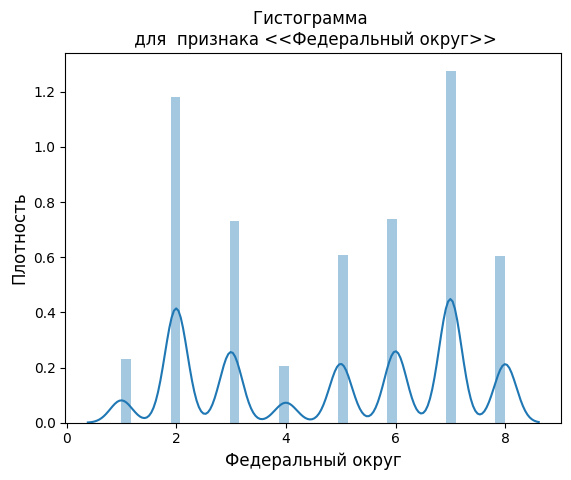

<ipython-input-27-cb7b351ac5f7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df_copy[col])


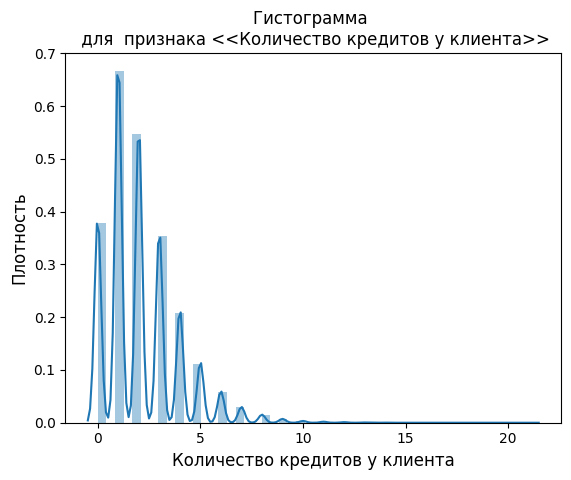

<ipython-input-27-cb7b351ac5f7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df_copy[col])


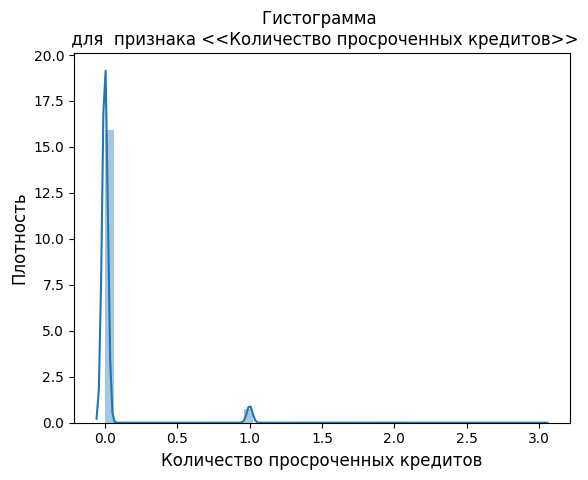

<ipython-input-27-cb7b351ac5f7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df_copy[col])


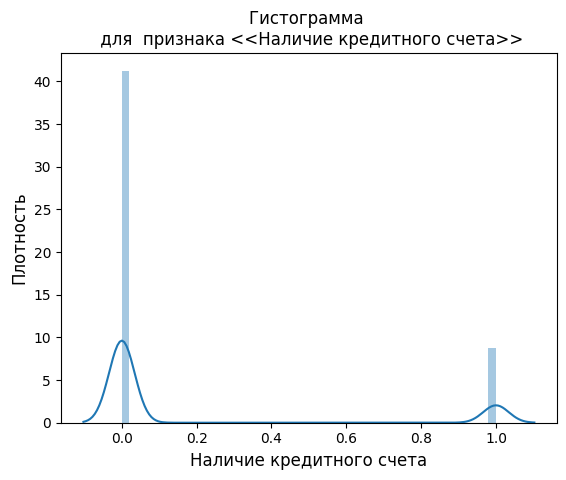

In [ ]:
for index, col in enumerate(var_cat):
    ax = sns.distplot(df_copy[col])
    ax.set_xlabel(dict_to_rus[col], fontsize = 12)
    ax.set_ylabel('Плотность', fontsize = 12);
    plt.title('Гистограмма \n для  признака <<{}>>'.format(dict_to_rus[col]))
    plt.show();

Удаление аномалий по категориальным признакам

In [ ]:
var_cat

['gender',
 'marital_status',
 'job_position',
 'credit_month',
 'education',
 'tariff_id',
 'okrug',
 'credit_count',
 'overdue_credit_count',
 'open_account_flg']

In [ ]:
# 'gender' - без изменений
# 'marital_status' - без изменений
# 'job_position' - без изменений
# 'education' - без изменений
# 'tariff_id' - без изменений
# 'okrug' - без изменений
# 'overdue_credit_count' - без изменений
# 'open_account_flg' - без изменений

# 'credit_month'
df_copy = df_copy[~df_copy['credit_month'].isin([29, 31])]

# 'credit_count'
df_copy = df_copy[df_copy['credit_count'] <= 15]# | df_copy['credit_count'].isnull()

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159995 entries, 0 to 170745
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   client_id             159995 non-null  int64         
 1   gender                159995 non-null  int64         
 2   age                   159993 non-null  float64       
 3   marital_status        159990 non-null  float64       
 4   job_position          159995 non-null  int64         
 5   credit_sum            159994 non-null  float64       
 6   credit_month          159995 non-null  int64         
 7   score_shk             159992 non-null  float64       
 8   education             159992 non-null  float64       
 9   tariff_id             159995 non-null  int64         
 10  living_region         159822 non-null  float64       
 11  okrug                 159822 non-null  float64       
 12  avg_income            159822 non-null  float64       
 13 

Анализ распределения по признаку 'date_bank'. Гистограмма

In [ ]:
df_copy.date_bank.agg(['min', 'max'])

min   2015-01-01 10:36:12
max   2021-12-31 18:45:26
Name: date_bank, dtype: datetime64[ns]

Выборка взята за 7 лет. Посторим функцию распределения в разрезе лет и кварталов.

In [ ]:
df_copy['year'] = df_copy['date_bank'].dt.year
df_copy['month'] = df_copy['date_bank'].dt.month

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159995 entries, 0 to 170745
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   client_id             159995 non-null  int64         
 1   gender                159995 non-null  int64         
 2   age                   159993 non-null  float64       
 3   marital_status        159990 non-null  float64       
 4   job_position          159995 non-null  int64         
 5   credit_sum            159994 non-null  float64       
 6   credit_month          159995 non-null  int64         
 7   score_shk             159992 non-null  float64       
 8   education             159992 non-null  float64       
 9   tariff_id             159995 non-null  int64         
 10  living_region         159822 non-null  float64       
 11  okrug                 159822 non-null  float64       
 12  avg_income            159822 non-null  float64       
 13 

In [ ]:
df_copy['quarter'] = np.nan

In [ ]:
for i in df_copy.index:
    if df_copy.month[i] in [1, 2, 3]:
        df_copy['quarter'][i] = df_copy['year'][i].astype(str) + '-' + '1'
    elif df_copy.month[i] in [4, 5, 6]:
        df_copy['quarter'][i] = df_copy['year'][i].astype(str) + '-' + '2'
    elif df_copy.month[i] in [7, 8, 9]:
        df_copy['quarter'][i] = df_copy['year'][i].astype(str) + '-' + '3'
    else:
        df_copy['quarter'][i] = df_copy['year'][i].astype(str) + '-' + '4'

<ipython-input-35-373024d11f64>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['quarter'][i] = df_copy['year'][i].astype(str) + '-' + '1'


In [ ]:
df_copy.head(5)

client_id  gender   age  marital_status  job_position  credit_sum  \
0          1       2  48.0             3.0            15    59998.00   
1          2       1  28.0             NaN            15    10889.00   
2          3       2  32.0             3.0            14    10728.00   
3          4       1  27.0             2.0            14    12009.09   
4          5       2  45.0             3.0            14    16908.89   

   credit_month  score_shk  education  tariff_id  ...  okrug  avg_income  \
0            10   0.770249        2.0         28  ...    8.0     25850.0   
1             6   0.248514        2.0          2  ...    7.0     66880.0   
2            12   0.459589        4.0          2  ...    2.0     23430.0   
3            12   0.362536        2.0          2  ...    8.0     23650.0   
4            10   0.421385        4.0          2  ...    6.0     26620.0   

   monthly_income  credit_count  overdue_credit_count  open_account_flg  \
0         30000.0           1.0                   1.0                 0   
1         43000.0           2.0                   0.0                 0   
2         23000.0           5.0                   0.0                 0   
3         17000.0           2.0                   0.0                 0   
4             NaN           1.0                   0.0                 0   

            date_bank  year  month  quarter  
0 2016-02-16 18:54:34  2016      2   2016-1  
1 2016-02-15 12:39:04  2016      2   2016-1  
2 2015-01-27 18:57:19  2015      1   2015-1  
3 2019-05-02 17:57:10  2019      5   2019-2  
4 2015-09-22 16:28:33  2015      9   2015-3  

[5 rows x 21 columns]

In [ ]:
# Сформируем pd.Series, где подсчитаем количество значений по признаку 'quarter'
# Сгруппируем в порядке возрастания
ser_q = df_copy.groupby(['quarter']).agg(count = ('quarter','count')).\
reset_index()
ser_q

quarter  count
0   2015-1   5592
1   2015-2   5713
2   2015-3   5598
3   2015-4   5776
4   2016-1   5858
5   2016-2   5753
6   2016-3   5618
7   2016-4   5596
8   2017-1   5704
9   2017-2   5725
10  2017-3   5858
11  2017-4   5640
12  2018-1   5867
13  2018-2   5741
14  2018-3   5769
15  2018-4   5744
16  2019-1   5697
17  2019-2   5661
18  2019-3   5718
19  2019-4   5582
20  2020-1   5840
21  2020-2   5606
22  2020-3   5834
23  2020-4   5708
24  2021-1   5654
25  2021-2   5663
26  2021-3   5747
27  2021-4   5733

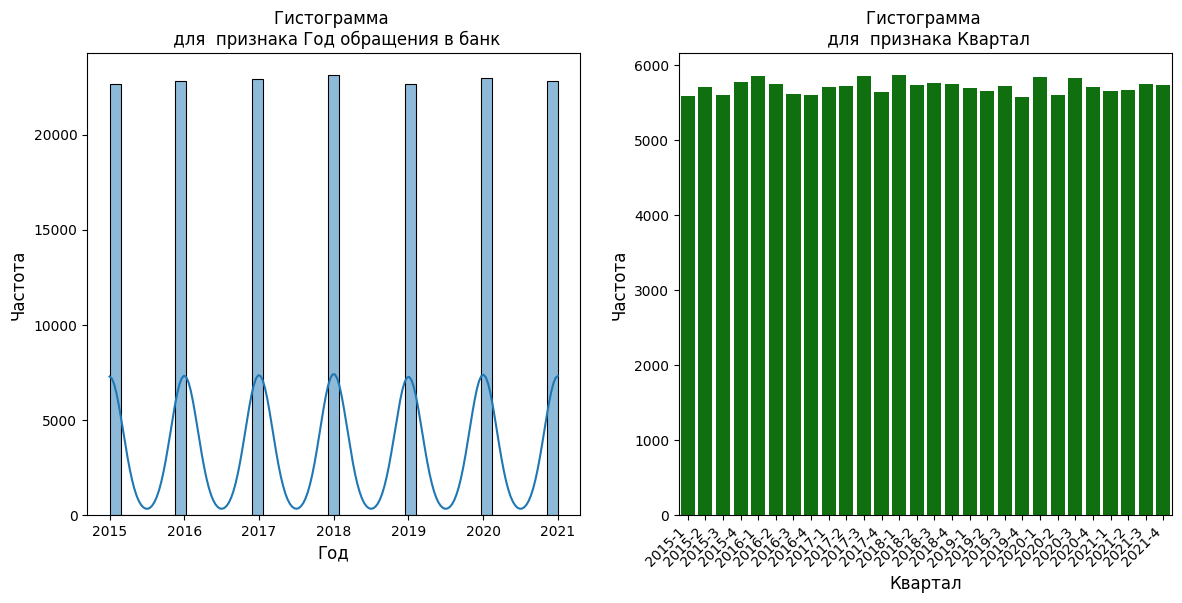

In [ ]:
fig, axis = plt.subplots(1,2, figsize = (14,6))

plt.subplot(1,2,2)
ax = sns.barplot(ser_q,
                 x = ser_q['quarter'],
                 y = ser_q['count'],
                 color = 'green')
ax.set_xlabel('Квартал', fontsize = 12)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right')
ax.set_ylabel('Частота', fontsize = 12);
plt.title('Гистограмма \n для  признака Квартал')

plt.subplot(1,2,1)
ax = sns.histplot(df_copy['year'], kde = True)
ax.set_xlabel('Год', fontsize = 12)
ax.set_ylabel('Частота', fontsize = 12);
plt.title('Гистограмма \n для  признака Год обращения в банк')
plt.show();

Согласно графикам обращение клиентов в банк по годам и в разрезе кварталов происходило равномерно. Выбросов не выявлено.

5. Обработка пропущенных значений

In [ ]:
df_copy.isna().sum()

client_id                 0
gender                    0
age                       2
marital_status            5
job_position              0
credit_sum                1
credit_month              0
score_shk                 3
education                 3
tariff_id                 0
living_region           173
okrug                   173
avg_income              173
monthly_income            2
credit_count              0
overdue_credit_count      0
open_account_flg          0
date_bank                 0
year                      0
month                     0
quarter                   0
dtype: int64

In [ ]:
df_copy.dropna(inplace = True)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159807 entries, 0 to 170745
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   client_id             159807 non-null  int64         
 1   gender                159807 non-null  int64         
 2   age                   159807 non-null  float64       
 3   marital_status        159807 non-null  float64       
 4   job_position          159807 non-null  int64         
 5   credit_sum            159807 non-null  float64       
 6   credit_month          159807 non-null  int64         
 7   score_shk             159807 non-null  float64       
 8   education             159807 non-null  float64       
 9   tariff_id             159807 non-null  int64         
 10  living_region         159807 non-null  float64       
 11  okrug                 159807 non-null  float64       
 12  avg_income            159807 non-null  float64       
 13 

Процент потерь после удаления аномалий и пропусков

In [ ]:
print('''
Процент потерь после удадения аномалий и пропусков составил {:.2f}%
      '''.format((1 - (df_copy.shape[0]/df.shape[0]))*100))


Процент потерь после удадения аномалий и пропусков составил 6.41%
      


Вывод по предобработке данных.

На этапе предобработки данных:



*   проверены типы данных;
*   установлено, что они являются корректными;
*   исходя из описательных статистик, описана имеющаяся совокупность данных;
*   установлено отсутствие дублирующихся записей;
*   удалены пропущенные значения;
*   подсчитан процент потерь - допустимый.







# Исследовательский анализ данных

1. Распределение признаков

Целевой признак - 'open_account_flg'. Принимает значения 0 - нет кредитного счета в данном банке, 1 - есть кредитный счет.

In [ ]:
open_account_percent = df_copy.open_account_flg.value_counts(1)*100
print('''
Процентное соотношение клиентов, открывших кредитный счет в банке:
Счет открыт - {}
Счет отсутствует - {}
      '''.format(round(open_account_percent[1], 2),
                 round(open_account_percent[0], 2)))


Процентное соотношение клиентов, открывших кредитный счет в банке:
Счет открыт - 16.37
Счет отсутствует - 83.63
      


Посторим диаграммы рассеяния для непрерывных признаков с целью визуальной оценки зависимости.

In [ ]:
var_cont

['age',
 'credit_sum',
 'score_shk',
 'living_region',
 'avg_income',
 'monthly_income']

Text(0.5, 1, 'Диаграмма рассеяния')

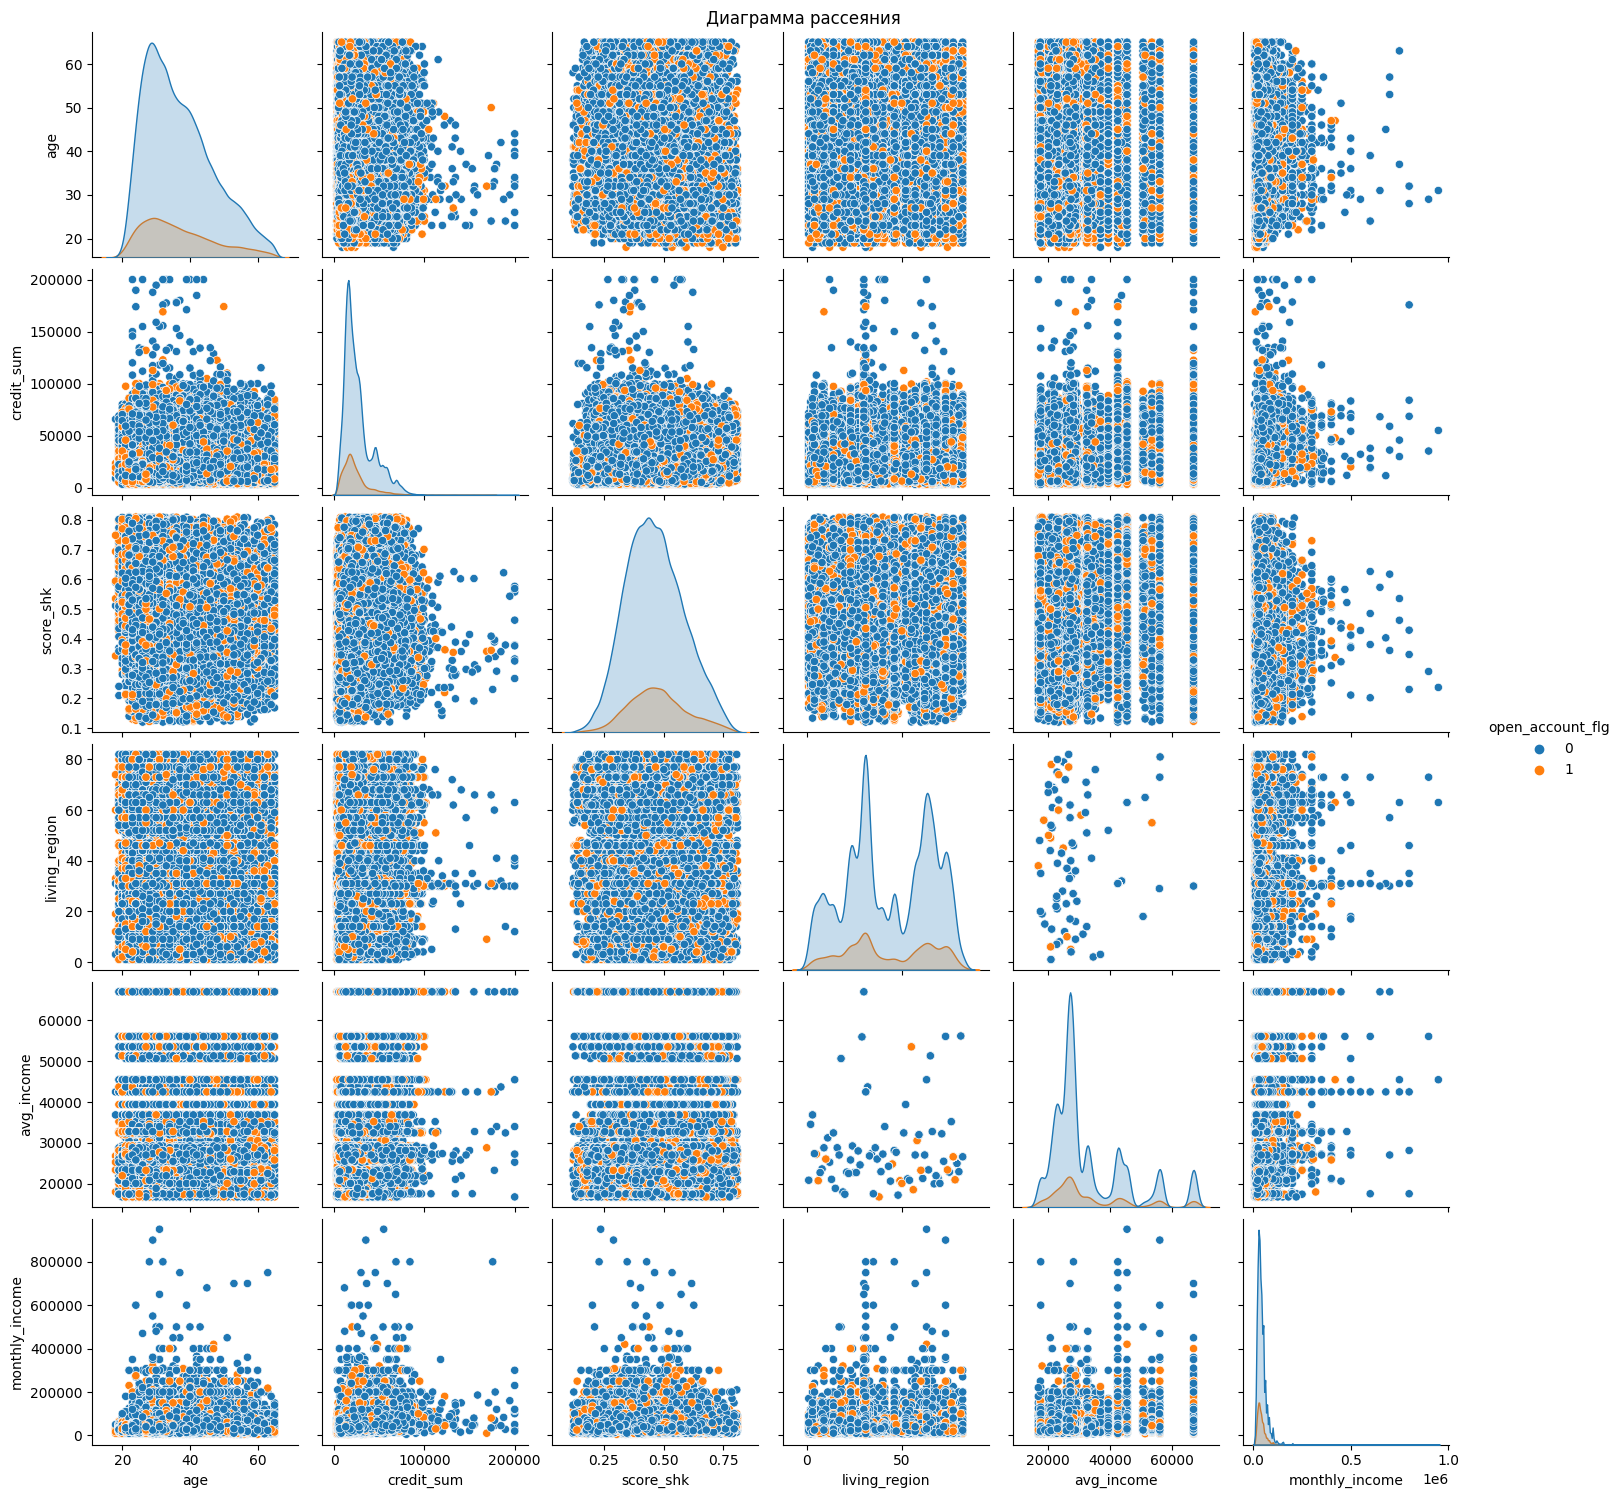

In [ ]:
ax = sns.pairplot(data = df_copy,
                  vars = var_cont,
                  hue = 'open_account_flg')
ax.fig.suptitle('Диаграмма рассеяния', y=1, fontsize = 12)

Ни на одном из парных графиков нет явной зависимости между непрерывными признаками.

Построим гистограммы и функции распределения для непрерывных признаков в разрезе целевой пременной

In [ ]:
var_cont

['age',
 'credit_sum',
 'score_shk',
 'living_region',
 'avg_income',
 'monthly_income']

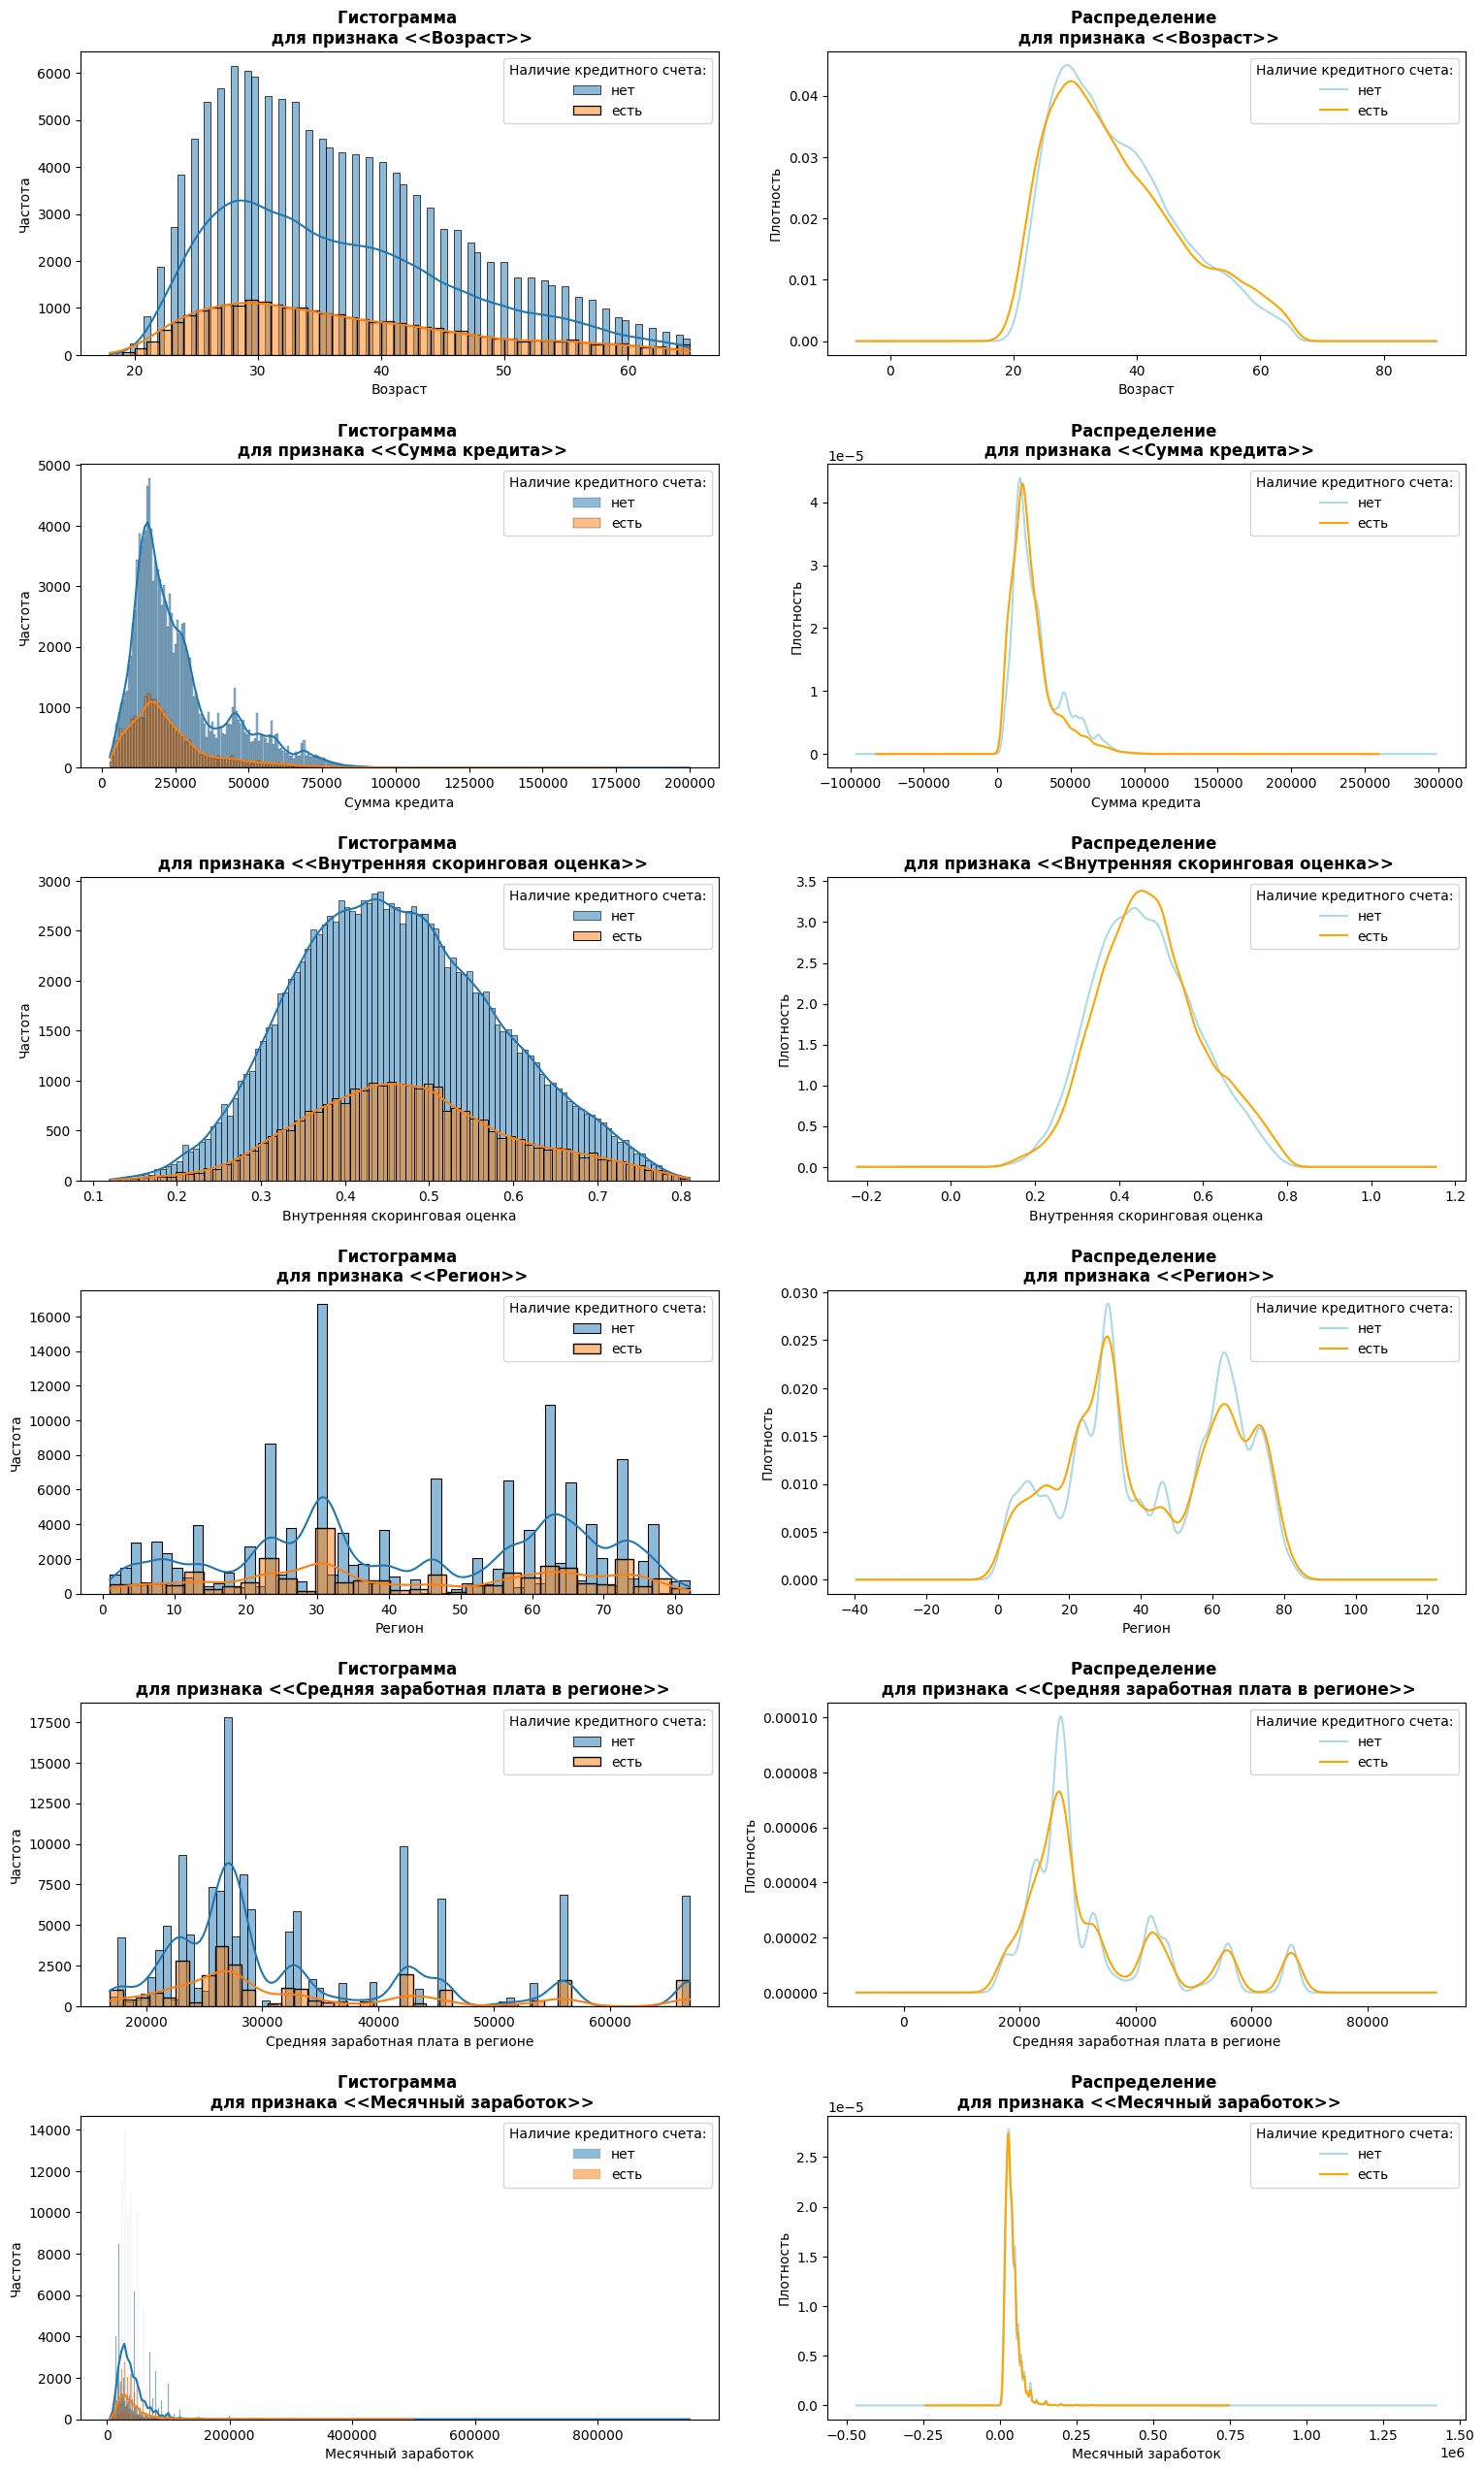

In [ ]:
fig, axes = plt.subplots(6, 2, figsize=(15,25))
fig.tight_layout(h_pad= 6, w_pad= 5)
i=0
for i, col in enumerate(var_cont):
    plt.subplot(6,2,2*i+1)
    ax = sns.histplot(df_copy[df_copy.open_account_flg == 0][col],
                      label = 'нет', kde = True)
    ax = sns.histplot(df_copy[df_copy.open_account_flg == 1][col],
                      label = 'есть', kde = True)
    plt.legend(title = 'Наличие кредитного счета:')
    plt.title("Гистограмма \n для признака <<{}>>".format(dict_to_rus[col]),
              fontweight = 'bold')
    plt.xlabel(dict_to_rus[col])
    plt.ylabel('Частота')

    plt.subplot(6,2,2*i+2)
    ax = df_copy[df_copy.open_account_flg == 0][col].plot(kind = 'density',
                                                          color = 'lightblue',
                                                          label = 'нет')
    ax = df_copy[df_copy.open_account_flg == 1][col].plot(kind = 'density',
                                                          color = 'orange',
                                                          label = 'есть')
    plt.legend(title = 'Наличие кредитного счета:')
    plt.title("Распределение \n для признака <<{}>>".format(dict_to_rus[col]),
              fontweight = 'bold')
    plt.xlabel(dict_to_rus[col])
    plt.ylabel('Плотность')

Опираясь на графики плотности, можно установить, что количественные признаки не влияют на окрытие крединых счетов в банке

Построим графики для категориальных признаков в разрезе целевой пременной

In [ ]:
var_cat

['gender',
 'marital_status',
 'job_position',
 'credit_month',
 'education',
 'tariff_id',
 'okrug',
 'credit_count',
 'overdue_credit_count',
 'open_account_flg']

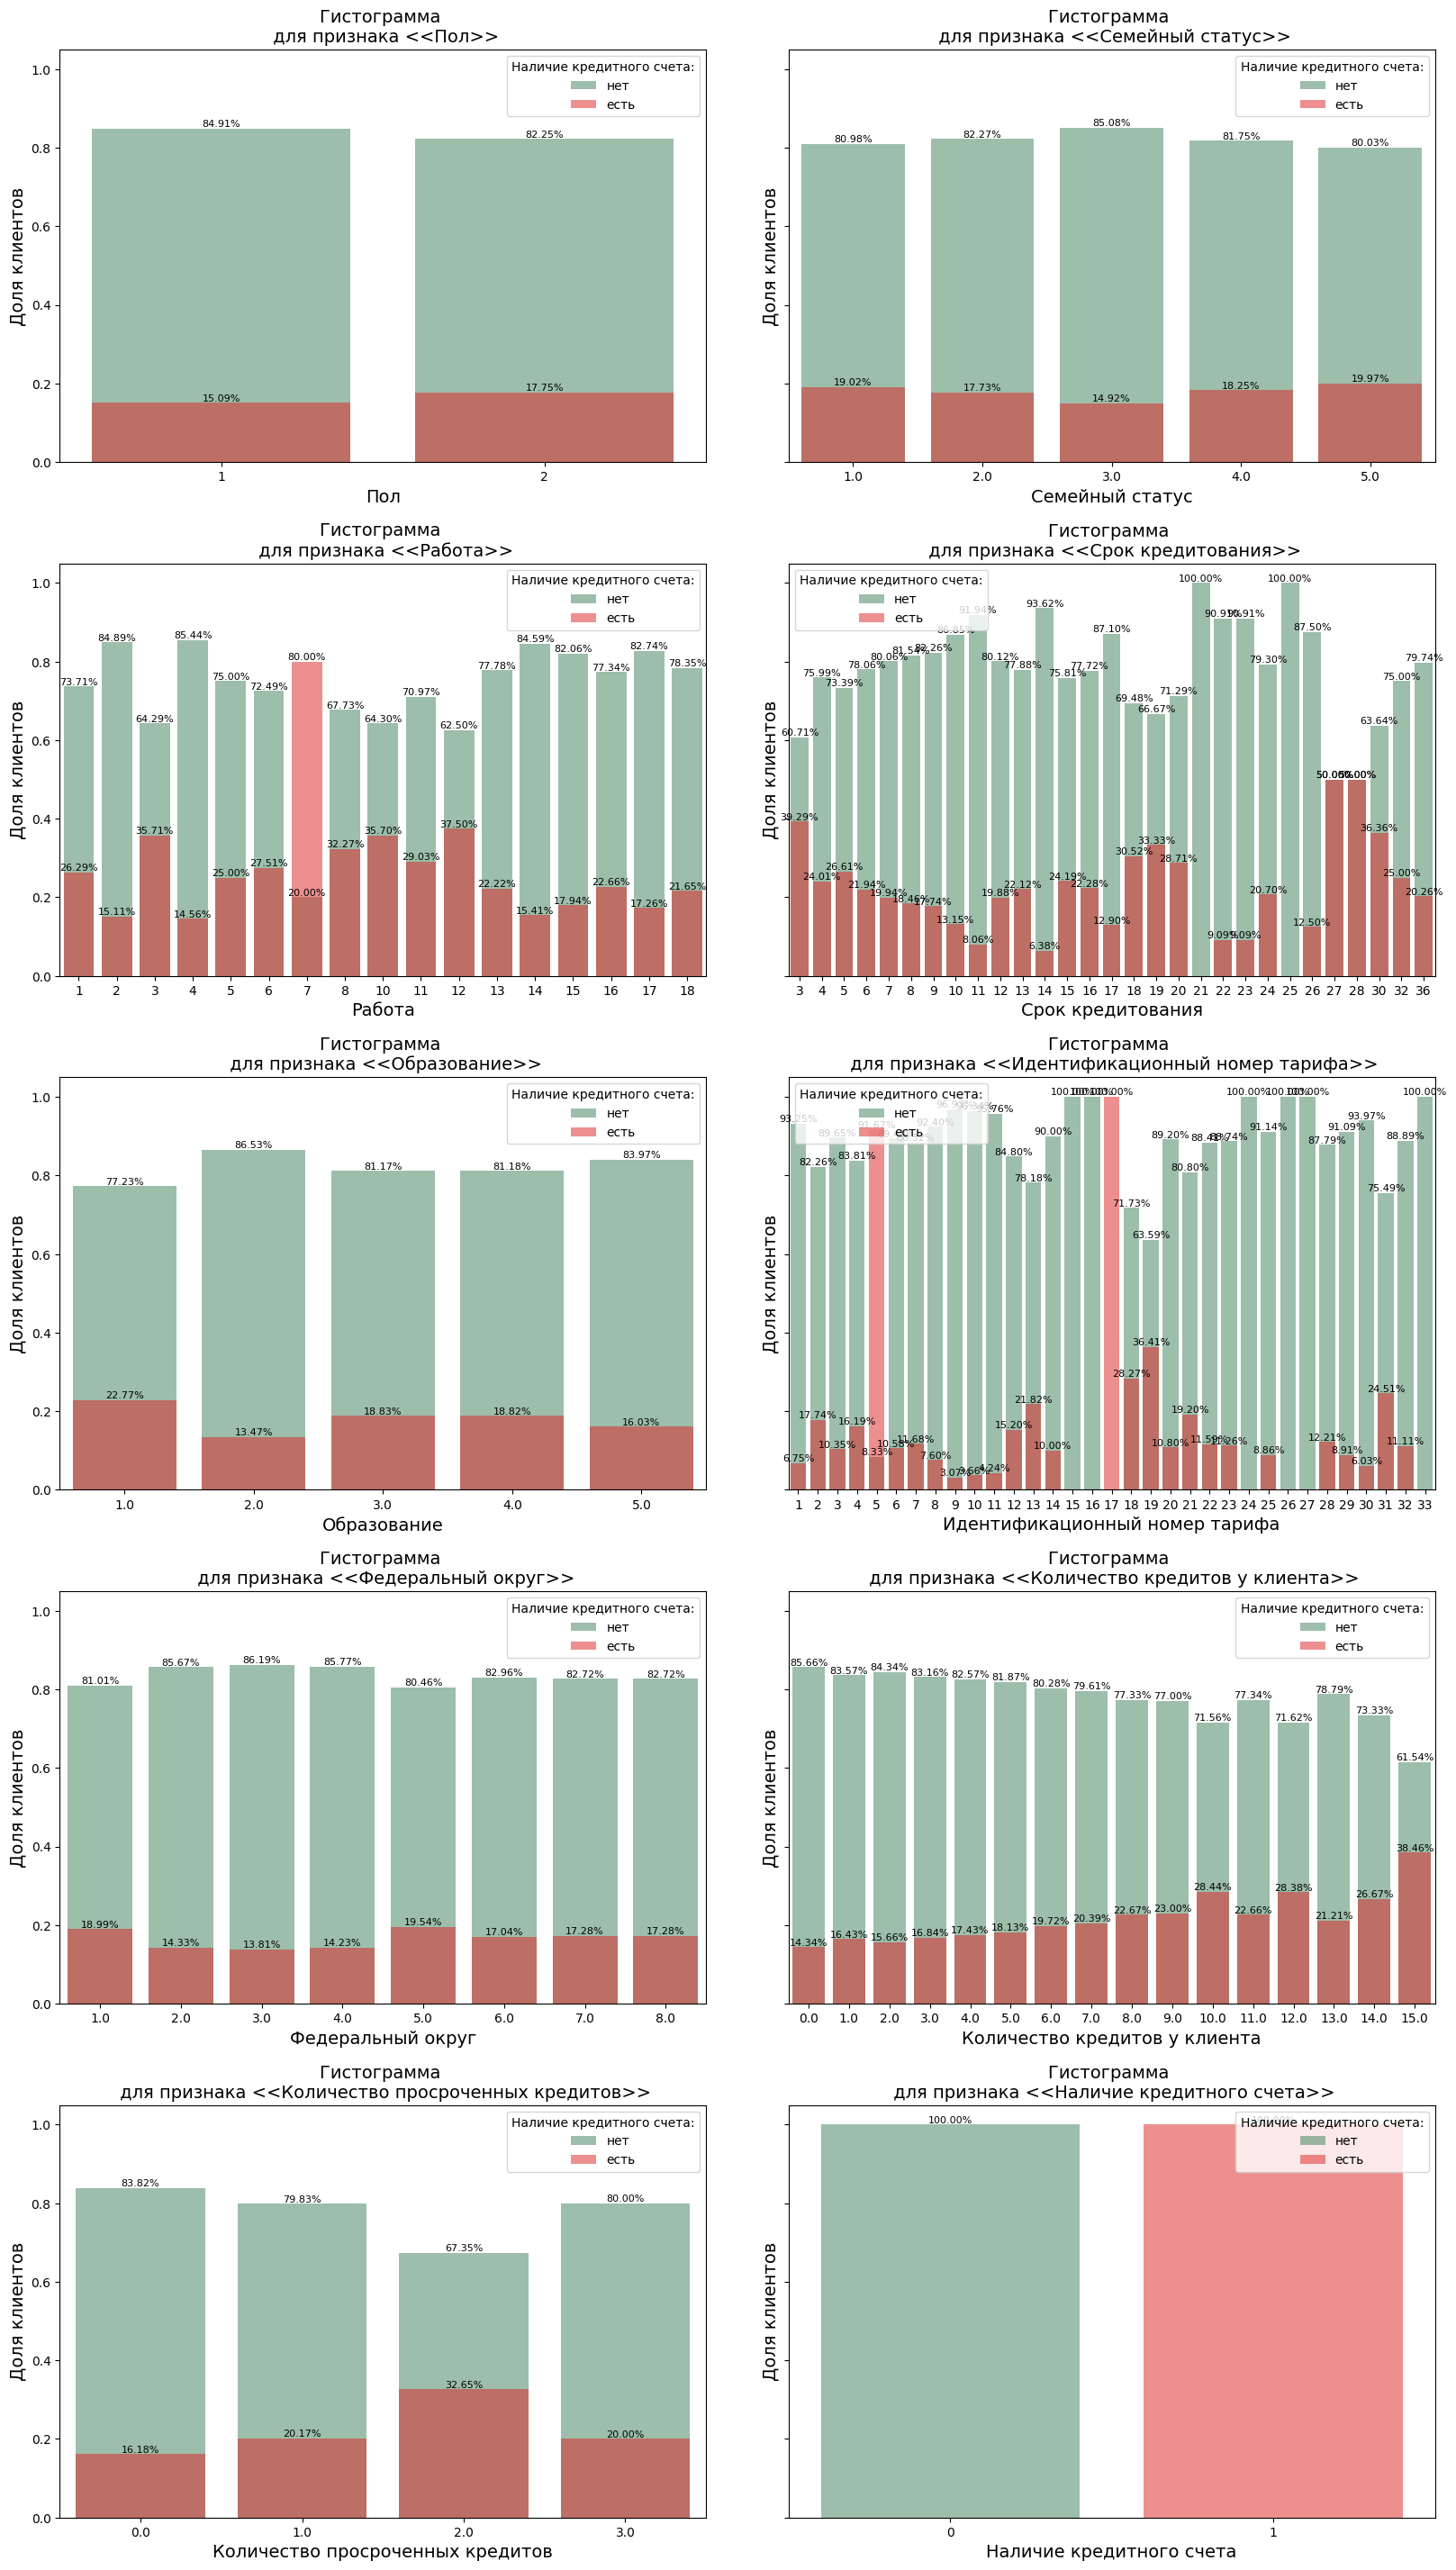

In [ ]:
fig, axes = plt.subplots(5, 2, sharey=True, figsize=(16,28))
fig.tight_layout(h_pad= 6, w_pad= 5)
i=0
for i, col in enumerate(var_cat):
    plt.subplot(5,2,i+1)
    data_all = df_copy[col].value_counts()
    r = (pd.DataFrame([df_copy[df_copy.open_account_flg == 0][col].value_counts()/data_all,
              df_copy[df_copy.open_account_flg == 1][col].value_counts()/data_all]).T)
    r.columns = ['0','1']
    ax1 = sns.barplot(x = r.index, y = r['0'], data = r, color='seagreen',
                      alpha = 0.5, label = 'нет')
    ax2 = sns.barplot(x = r.index, y = r['1'], data = r, color='red',
                      alpha = 0.5, label = 'есть')
    plt.legend(title = 'Наличие кредитного счета:')
    plt.title("Гистограмма \n для признака <<{}>>".format(dict_to_rus[col]), fontsize = 14)
    plt.xlabel(dict_to_rus[col], fontsize = 14)
    plt.ylabel('Доля клиентов', fontsize = 14)
    for p in ax1.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax1.annotate('{:.2f}%'.format(100*y),
            (x.mean(), y),ha='center', va='bottom', fontsize = 8)


На основе диаграмм выдвигается предположение о склонности клиентов открывать кредитные счета (open_account_flg) при увеличении числа кредитов (credit_count).

# Отбор признаков и портреты клиентов

Исследование распределения признаков в разрезе групп. Проверка гипотез.

## Непрерывные признаки.

Расчет статистических показателей непрерывных признаков в разрезе целевой переменной (open_account_flg).

In [ ]:
df_copy.groupby('open_account_flg')[var_cont].agg(['mean', 'median']).reset_index()

open_account_flg        age           credit_sum          score_shk  \
                         mean median          mean   median      mean   
0                0  36.805483   35.0  26518.151326  21529.4  0.462771   
1                1  36.751463   35.0  23196.955481  19479.0  0.474876   

            living_region           avg_income          monthly_income  \
     median          mean median          mean   median           mean   
0  0.455488     43.167762   41.0  32789.926826  27390.0   40669.672782   
1  0.466883     42.511911   38.0  33373.768975  27720.0   39626.148817   

            
    median  
0  35000.0  
1  35000.0

Проверка гипотез о нормальности распределения для каждого признака (v in var_cont) для клиентов, имеющих кредитных счет (open_account_flg = 1) и неимеющих (open_account_flg = 0).

Гипотеза Н_0: признак 'v' подчиняется нормальному закону распределения.
Критерии для проверки:
- тест Колмогорова-Смирнова;
- тест Андерсона-Дарлинга;
- тест Харке-Бера.

In [ ]:
df_copy.isna().sum() # в исследуемой выборке пропуски отсутствуют

client_id               0
gender                  0
age                     0
marital_status          0
job_position            0
credit_sum              0
credit_month            0
score_shk               0
education               0
tariff_id               0
living_region           0
okrug                   0
avg_income              0
monthly_income          0
credit_count            0
overdue_credit_count    0
open_account_flg        0
date_bank               0
year                    0
month                   0
quarter                 0
dtype: int64

In [ ]:
var_cont

['age',
 'credit_sum',
 'score_shk',
 'living_region',
 'avg_income',
 'monthly_income']

In [ ]:
for v in var_cont:
    print('Признак -- {}'.format(v))
    print(kstest(df_copy[df_copy['open_account_flg'] == 0][v], 'norm',
       args = (df_copy[df_copy['open_account_flg'] == 0][v].mean(),
               df_copy[df_copy['open_account_flg'] == 0][v].std())
       ))
    print(anderson(df_copy[df_copy['open_account_flg'] == 0][v]))
    print(jarque_bera(df_copy[df_copy['open_account_flg'] == 0][v]))
    print()


Признак -- age
KstestResult(statistic=0.0957046120428876, pvalue=0.0, statistic_location=33.0, statistic_sign=1)
AndersonResult(statistic=1797.9454177648004, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=36.80548281383273, scale=9.950597723469302)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
SignificanceResult(statistic=10061.773445247334, pvalue=0.0)

Признак -- credit_sum
KstestResult(statistic=0.13260772544873178, pvalue=0.0, statistic_location=27089.0, statistic_sign=1)
AndersonResult(statistic=5238.076523119409, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=26518.151326260348, scale=16410.0914005364)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
SignificanceResult(statistic=93693.28762796217

In [ ]:
for v in var_cont:
    print('Признак -- {}'.format(v))
    print(kstest(df_copy[df_copy['open_account_flg'] == 1][v], 'norm',
       args = (df_copy[df_copy['open_account_flg'] == 1][v].mean(),
               df_copy[df_copy['open_account_flg'] == 1][v].std())
       ))
    print(anderson(df_copy[df_copy['open_account_flg'] == 1][v]))
    print(jarque_bera(df_copy[df_copy['open_account_flg'] == 1][v]))
    print()

Признак -- age
KstestResult(statistic=0.09860190761620474, pvalue=8.710153365891283e-222, statistic_location=34.0, statistic_sign=1)
AndersonResult(statistic=408.40596780229316, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=36.75146254731771, scale=10.648425998112977)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
SignificanceResult(statistic=2129.296737002544, pvalue=0.0)

Признак -- credit_sum
KstestResult(statistic=0.13192336904312563, pvalue=0.0, statistic_location=24191.0, statistic_sign=1)
AndersonResult(statistic=957.3104064326944, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=23196.95548082438, scale=14777.505062824952)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
SignificanceResult(statis

Во всех случаях значения p_value < 0.05, гипотеза Н_0 отвергается. Поведение непрерывных признаков не подчиняется нормальному закону распределения.

Результаты проверки представим в таблице, где 0 - распределение отлично от нормального

In [ ]:
test_norm = pd.DataFrame({'open_account_flg_0_NORM' : {'age' : 0,
                                                  'credit_sum' : 0,
                                                  'score_shk' : 0,
                                                  'living_region' : 0,
                                                  'avg_income' : 0,
                                                  'monthly_income' : 0},
                          'open_account_flg_1_NORM' : {'age' : 0,
                                                  'credit_sum' : 0,
                                                  'score_shk' : 0,
                                                  'living_region' : 0,
                                                  'avg_income' : 0,
                                                  'monthly_income' : 0}})
test_norm

open_account_flg_0_NORM  open_account_flg_1_NORM
age                                   0                        0
credit_sum                            0                        0
score_shk                             0                        0
living_region                         0                        0
avg_income                            0                        0
monthly_income                        0                        0

Проведенные исследования показали, что распределения непрерывных признаков в разрезе целевой переменной отличаются от нормального.

Проверка гипотез о значениях параметров распределений.



Гипотеза Н_0: выборочные средние признака 'v' по целевой переменной (open_account_flg = 0) и (open_account_flg = 1) равны. Критерии для проверки:
- критерий Манна-Уитни;
- тест Краскела-Уоллиса.

In [ ]:
for v in var_cont:
    print('Признак -- {}'.format(v))
    print(mannwhitneyu(df_copy[df_copy.open_account_flg == 0][v],
                       df_copy[df_copy.open_account_flg == 1][v]))
    print(kruskal(df_copy[df_copy.open_account_flg == 0][v],
                  df_copy[df_copy.open_account_flg == 1][v]))
    print()

Признак -- age
MannwhitneyuResult(statistic=1776607174.0, pvalue=2.2834916507304506e-05)
KruskalResult(statistic=17.936913082808623, pvalue=2.283490905566888e-05)

Признак -- credit_sum
MannwhitneyuResult(statistic=1953065628.0, pvalue=5.43686620164768e-199)
KruskalResult(statistic=905.7798847600797, pvalue=5.436854196897367e-199)

Признак -- score_shk
MannwhitneyuResult(statistic=1653291312.0, pvalue=1.437938498335659e-43)
KruskalResult(statistic=191.5787108798997, pvalue=1.4379370321983339e-43)

Признак -- living_region
MannwhitneyuResult(statistic=1778643156.5, pvalue=5.776982555040403e-06)
KruskalResult(statistic=20.56070572142782, pvalue=5.776980547739342e-06)

Признак -- avg_income
MannwhitneyuResult(statistic=1737503186.0, pvalue=0.13366945860840646)
KruskalResult(statistic=2.249362738463946, pvalue=0.13366943959033534)

Признак -- monthly_income
MannwhitneyuResult(statistic=1791787808.5, pvalue=9.852199769928273e-11)
KruskalResult(statistic=41.85057193350656, pvalue=9.852194983

По признакам ['age',
 'credit_sum',
 'score_shk',
 'living_region',
 'monthly_income'] значения p_value < 0.05, гипотеза Н_0 отвергается. Данные признаки оказывают статистически значимое влияние на открытие клиентами кредитных карт в банке.

 По признаку 'avg_income' p_value > 0.05, гипотеза Н_0 принимается. Нет оснований считать, что средняя заработная плата в регионе оказывает влияние на открытие клиентами кредитных карт в банке.

Корреляционный анализ

In [ ]:
var_cont

['age',
 'credit_sum',
 'score_shk',
 'living_region',
 'avg_income',
 'monthly_income']

In [ ]:
x_corr = df_copy[['age',
         'credit_sum',
         'score_shk',
         'living_region',
         'avg_income',
         'monthly_income',
         'open_account_flg' ]].corr()
x_corr

age  credit_sum  score_shk  living_region  avg_income  \
age               1.000000   -0.081116  -0.146851       0.000919   -0.009044   
credit_sum       -0.081116    1.000000   0.049167       0.012492    0.199883   
score_shk        -0.146851    0.049167   1.000000      -0.013979   -0.053588   
living_region     0.000919    0.012492  -0.013979       1.000000    0.084812   
avg_income       -0.009044    0.199883  -0.053588       0.084812    1.000000   
monthly_income   -0.019583    0.356328  -0.102231      -0.006488    0.339316   
open_account_flg -0.001985   -0.075843   0.036890      -0.010903    0.017250   

                  monthly_income  open_account_flg  
age                    -0.019583         -0.001985  
credit_sum              0.356328         -0.075843  
score_shk              -0.102231          0.036890  
living_region          -0.006488         -0.010903  
avg_income              0.339316          0.017250  
monthly_income          1.000000         -0.015233  
open_account_flg       -0.015233          1.000000

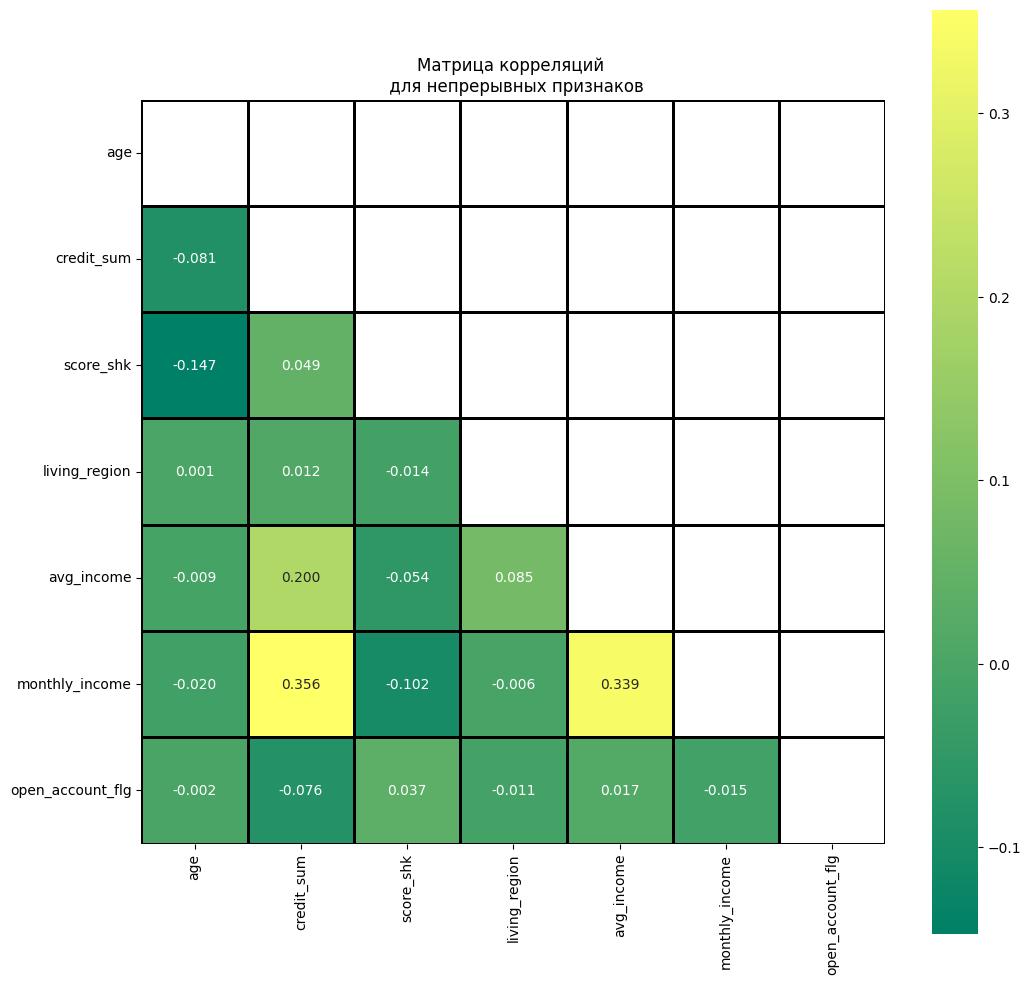

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(data = x_corr, annot=True, square=True,
                 cmap='summer', fmt='.3f', linewidths=1,
                 linecolor='black', mask=np.triu(x_corr))
plt.title('Матрица корреляций \n для непрерывных признаков')
plt.show()

In [ ]:
for var in var_cont:
    print(f'{var} -------------------')
    print(pointbiserialr(df_copy[var], df_copy.open_account_flg))
    print()

age -------------------
SignificanceResult(statistic=-0.0019850282047316164, pvalue=0.427470947369113)

credit_sum -------------------
SignificanceResult(statistic=-0.07584284664375165, pvalue=1.7270854567417026e-202)

score_shk -------------------
SignificanceResult(statistic=0.036889901575305084, pvalue=2.9884088945300802e-49)

living_region -------------------
SignificanceResult(statistic=-0.010903150845566072, pvalue=1.3082261019939676e-05)

avg_income -------------------
SignificanceResult(statistic=0.017249589084523044, pvalue=5.343754329331352e-12)

monthly_income -------------------
SignificanceResult(statistic=-0.01523324383879948, pvalue=1.1296211943913877e-09)



Для корреляционного анализа использовались коэффициент Пирсона (в общем случае) и точечный коэффициент корреляции, т.к. целевой признак является биноминальным. Их абсолютные значения совпали.

Результат корреляционного анализа: статистически значимое влияние на целевую переменную (open_account_flg) оказывают признаки:
- credit_sum;
- score_shk;
- living_region;
- avg_income;
- monthly_income.


Таким образом, учитывая графики распределения, разультаты проверки гипотез и коэффициенты корреляции, установлено, что на решение клиентов открывать кредитную карту оказывают влияние следующие непрерывные признаки:
- credit_sum;
- score_shk


## Категориальные признаки.

In [ ]:
var_cat

['gender',
 'marital_status',
 'job_position',
 'credit_month',
 'education',
 'tariff_id',
 'okrug',
 'credit_count',
 'overdue_credit_count',
 'open_account_flg']

In [ ]:
for var in var_cat:
    print(f'{var} ---------------------')
    print(df_copy[var].unique())
    print()

gender ---------------------
[2 1]

marital_status ---------------------
[3. 2. 4. 5. 1.]

job_position ---------------------
[15 14  6  4  1  2 10 16  8 17 18 13  3 11  5 12  7]

credit_month ---------------------
[10 12  6 14 13 18 15  4 24  8 16  9  3 20  7 36 11  5 19 28 26 17 32 23
 30 25 22 21 27]

education ---------------------
[2. 4. 5. 3. 1.]

tariff_id ---------------------
[28  2 19 25  1 29 20 18 30 11 22  3 23  6  8  9 10 12  7 31 21  4 32 13
 24 26  5 14 15 16 33 27 17]

okrug ---------------------
[8. 2. 4. 7. 6. 3. 5. 1.]

credit_count ---------------------
[ 1.  5.  2.  0.  3.  7.  6.  4.  8. 10.  9. 12. 11. 14. 15. 13.]

overdue_credit_count ---------------------
[1. 0. 2. 3.]

open_account_flg ---------------------
[0 1]



## gender - Пол клиента

In [ ]:
def test_z_criterion(col, goal, alpha):
    import scipy.stats as st
    import math
    gen_group_shape = df_copy[col].value_counts()
    goal_group_shape = df_copy.groupby(col)[goal].sum()
    p = goal_group_shape / gen_group_shape
    p_combined = goal_group_shape.sum() / gen_group_shape.sum()
    difference = p.iloc[0] - p.iloc[1]
    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/gen_group_shape.iloc[0] + 1/gen_group_shape.iloc[1]))
    distr = st.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    print('Результаты проверки гипотезы H_0 по z-критерию:')
    print('Уровень значимости alpha={:.2f}'.format(alpha))
    print('P-value: {:.2f}'.format(p_value))
    if p_value < alpha:
        print(f"""Отвергаем нулевую гипотезу: разница в долях
по признаку <<{col}>> статистически значима.""")
    else:
        print(f"""Не получилось отвергнуть нулевую гипотезу: разница в долях по
признаку <<{col}>> статистически незначима.""")
    print('------------------------------------------------------------')

In [ ]:
test_z_criterion('gender', 'open_account_flg', 0.05)

Результаты проверки гипотезы H_0 по z-критерию:
Уровень значимости alpha=0.05
P-value: 0.00
Отвергаем нулевую гипотезу: разница в долях
по признаку <<gender>> статистически значима.
------------------------------------------------------------


Рассчитаем для признака 'gender' коэффициенты корреляции (Кенделла и Гудмена-Краскела).

In [ ]:
kendalltau(df_copy.gender, df_copy.open_account_flg)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:5278: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


SignificanceResult(statistic=0.03594288848039912, pvalue=8.139090471325202e-47)

In [ ]:
kruskal(df_copy.gender, df_copy.open_account_flg)

KruskalResult(statistic=229814.03875809393, pvalue=0.0)

Значения p_value у обоих коэффициентов < 0.05. Гипотеза Н_0 о стремлении коэффициета корреляции к 0 отвергается. Признак 'gender' статистически значим для целевой переменной.

Для определения характера зависимости между 'gender' и целевым признаком 'open_account_flg' рассчитаем моду по каждому из занчений (open_account_flg = 0 и open_account_flg = 1).

In [ ]:
df_copy.groupby(['open_account_flg'])['gender'].agg(pd.Series.mode)

open_account_flg
0    1
1    2
Name: gender, dtype: int64

Чаще открывают крединые карты клиенты, относящиеся к половому признаку 2. Соответственно клиенты, у которых такие карты не оформлены, - к 1.

## marital_status - Семейный статус

Так как категориальные признаки принимают несколько значений, то для применения z-теста следует привести данные по этим признака к биноминальным. Создадим датафремы для каждого категориального признака. Затем добавим столбцы с заголовками, соответствующими уникальным значениям категориального признака. Заполнил кажды такой столбец 1 и 0 (биноминальными значениями) для каждого из значений.

In [ ]:
df_marital_status = df_copy[['marital_status', 'open_account_flg']]
df_marital_status

marital_status  open_account_flg
0                  3.0                 0
2                  3.0                 0
3                  2.0                 0
5                  3.0                 0
7                  4.0                 0
...                ...               ...
170741             4.0                 0
170742             3.0                 0
170743             4.0                 0
170744             2.0                 0
170745             3.0                 0

[159807 rows x 2 columns]

In [ ]:
# список уникальных значений категориального признака 'marital_status'
marital_status_var = list(df_copy['marital_status'].unique())
marital_status_var.sort()
marital_status_var

[1.0, 2.0, 3.0, 4.0, 5.0]

In [ ]:
# добавление пустых столбцов в DF df_marital_status.
# Заголовки столбцов соответствуют уникальным начениям признака marital_status

for name in marital_status_var:
    df_marital_status.loc[:, (name)] = np.nan

In [ ]:
df_marital_status.head(2)

marital_status  open_account_flg  1.0  2.0  3.0  4.0  5.0
0             3.0                 0  NaN  NaN  NaN  NaN  NaN
2             3.0                 0  NaN  NaN  NaN  NaN  NaN

In [ ]:
# заполняем новые столбцы
for i in marital_status_var:
    df_marital_status.loc[:, (i)] = np.nan # присвоим новому столбцу заголовок из списка уникальных значений
    for ind in df_marital_status.index:
        if df_marital_status['marital_status'][ind] == i: # если значение marital_status совпадает с заголовком столбца
            df_marital_status.loc[ind, (i)] = 1 # ставим 1
        else:
            df_marital_status.loc[ind, (i)] = 0  # в противном случае 0

df_marital_status.head(10)

<ipython-input-77-0a161e496a6e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_marital_status.loc[:, (i)] = np.nan # присвоим новому столбцу заголовок из списка уникальных значений


marital_status  open_account_flg  1.0  2.0  3.0  4.0  5.0
0              3.0                 0  0.0  0.0  1.0  0.0  0.0
2              3.0                 0  0.0  0.0  1.0  0.0  0.0
3              2.0                 0  0.0  1.0  0.0  0.0  0.0
5              3.0                 0  0.0  0.0  1.0  0.0  0.0
7              4.0                 0  0.0  0.0  0.0  1.0  0.0
9              4.0                 0  0.0  0.0  0.0  1.0  0.0
11             4.0                 0  0.0  0.0  0.0  1.0  0.0
13             3.0                 0  0.0  0.0  1.0  0.0  0.0
17             4.0                 1  0.0  0.0  0.0  1.0  0.0
18             4.0                 0  0.0  0.0  0.0  1.0  0.0

In [ ]:
def test_z_criterion(col, goal, alpha):
    import scipy.stats as st
    import math
    gen_group_shape = df_marital_status[col].value_counts()
    goal_group_shape = df_marital_status.groupby(col)[goal].sum()
    p = goal_group_shape / gen_group_shape
    p_combined = goal_group_shape.sum() / gen_group_shape.sum()
    difference = p.iloc[0] - p.iloc[1]
    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/gen_group_shape.iloc[0] + 1/gen_group_shape.iloc[1]))
    distr = st.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    print('Результаты проверки гипотезы H_0 по z-критерию:')
    print('Уровень значимости alpha={:.2f}'.format(alpha))
    print('P-value: {:.2f}'.format(p_value))
    if p_value < alpha:
        print(f"""Отвергаем нулевую гипотезу: разница в долях
по признаку <<{col}>> статистически значима.""")
    else:
        print(f"""Не получилось отвергнуть нулевую гипотезу: разница в долях по
признаку <<{col}>> статистически незначима.""")
    print('------------------------------------------------------------')

In [ ]:
for col in marital_status_var:
    test_z_criterion(col, 'open_account_flg', 0.05)

Результаты проверки гипотезы H_0 по z-критерию:
Уровень значимости alpha=0.05
P-value: 0.00
Отвергаем нулевую гипотезу: разница в долях
по признаку <<1.0>> статистически значима.
------------------------------------------------------------
Результаты проверки гипотезы H_0 по z-критерию:
Уровень значимости alpha=0.05
P-value: 0.00
Отвергаем нулевую гипотезу: разница в долях
по признаку <<2.0>> статистически значима.
------------------------------------------------------------
Результаты проверки гипотезы H_0 по z-критерию:
Уровень значимости alpha=0.05
P-value: 0.00
Отвергаем нулевую гипотезу: разница в долях
по признаку <<3.0>> статистически значима.
------------------------------------------------------------
Результаты проверки гипотезы H_0 по z-критерию:
Уровень значимости alpha=0.05
P-value: 0.00
Отвергаем нулевую гипотезу: разница в долях
по признаку <<4.0>> статистически значима.
------------------------------------------------------------
Результаты проверки гипотезы H_0 по z-кр

Так, проверка по z-критерию показала, что все значения признака 'marital_status' оказывают влияние на целевую переменную.

In [ ]:
df_marital_status.corr()

marital_status  open_account_flg       1.0       2.0  \
marital_status          1.000000          0.015101 -0.473201 -0.542393   
open_account_flg        0.015101          1.000000  0.011424  0.012489   
1.0                    -0.473201          0.011424  1.000000 -0.053864   
2.0                    -0.542393          0.012489 -0.053864  1.000000   
3.0                    -0.270728         -0.044579 -0.182004 -0.386417   
4.0                     0.717411          0.032421 -0.101119 -0.214688   
5.0                     0.348305          0.013580 -0.022218 -0.047171   

                       3.0       4.0       5.0  
marital_status   -0.270728  0.717411  0.348305  
open_account_flg -0.044579  0.032421  0.013580  
1.0              -0.182004 -0.101119 -0.022218  
2.0              -0.386417 -0.214688 -0.047171  
3.0               1.000000 -0.725421 -0.159388  
4.0              -0.725421  1.000000 -0.088554  
5.0              -0.159388 -0.088554  1.000000

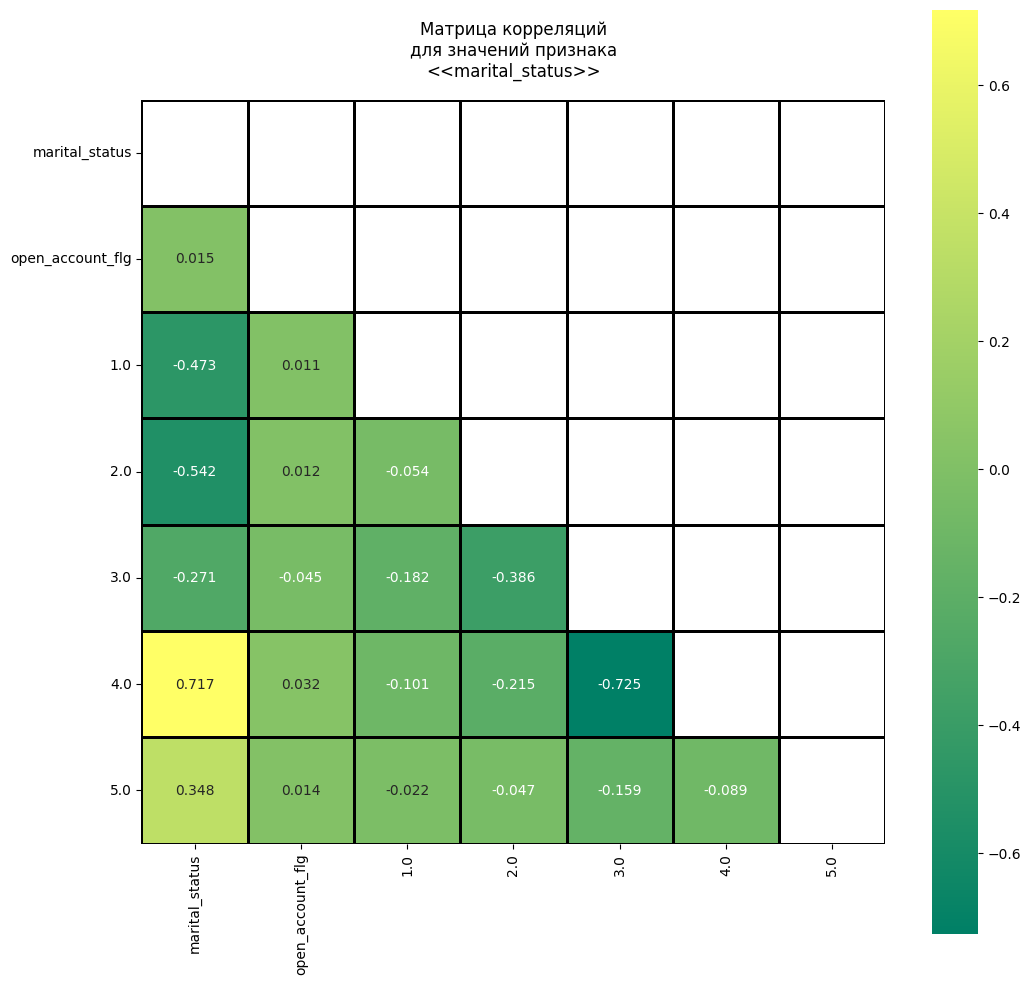

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(data = df_marital_status.corr(), annot=True, square=True,
                 cmap='summer', fmt='.3f', linewidths=1,
                 linecolor='black', mask=np.triu(df_marital_status.corr()))
plt.title('Матрица корреляций\nдля значений признака\n<<marital_status>>', y = 1.02)
plt.show()

Для определения характера зависимости между 'marital_status' и целевым признаком 'open_account_flg' рассчитаем моду по каждому из занчений (open_account_flg = 0 и open_account_flg = 1).

In [ ]:
df_marital_status_count = df_marital_status.groupby(['open_account_flg', \
                                                     'marital_status']).\
                                      agg(count = ('marital_status', 'count')).\
                                      reset_index()

df_marital_status_count

open_account_flg  marital_status  count
0                 0             1.0   3202
1                 0             2.0  13492
2                 0             3.0  76993
3                 0             4.0  37526
4                 0             5.0   2441
5                 1             1.0    752
6                 1             2.0   2908
7                 1             3.0  13504
8                 1             4.0   8380
9                 1             5.0    609

In [ ]:
df_marital_status_count['percent'] = np.nan
for i in df_marital_status_count.index:
    if df_marital_status_count.loc[i, ('open_account_flg')] == 0:
        df_marital_status_count.loc[i, ('percent')] = (df_marital_status_count['count'][i]/\
        df_marital_status_count[df_marital_status_count.open_account_flg == 0]\
         ['count'].sum()*100)
    else:
        df_marital_status_count.loc[i, ('percent')] = df_marital_status_count['count'][i]/\
        df_marital_status_count[df_marital_status_count.open_account_flg == 1]\
         ['count'].sum()*100
df_marital_status_count['percent'] = round(df_marital_status_count['percent'],2)
df_marital_status_count

open_account_flg  marital_status  count  percent
0                 0             1.0   3202     2.40
1                 0             2.0  13492    10.09
2                 0             3.0  76993    57.61
3                 0             4.0  37526    28.08
4                 0             5.0   2441     1.83
5                 1             1.0    752     2.88
6                 1             2.0   2908    11.12
7                 1             3.0  13504    51.63
8                 1             4.0   8380    32.04
9                 1             5.0    609     2.33

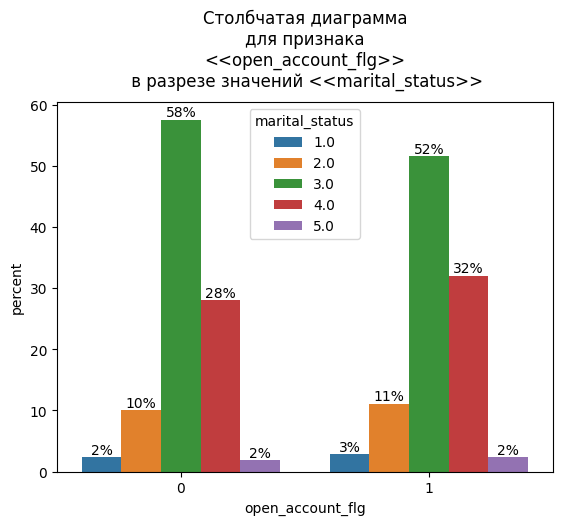

In [ ]:
ax = sns.barplot(data = df_marital_status_count,
              x = df_marital_status_count['open_account_flg'],
              y = df_marital_status_count['percent'],
              hue = df_marital_status_count['marital_status']);
for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.0f}%'.format(p.get_height()),
            (x.mean(), y), ha = 'center', va = 'bottom', fontsize = 10)
plt.title('Столбчатая диаграмма\nдля признака\n<<open_account_flg>>\n в разрезе значений <<marital_status>>', y = 1.02)
plt.show()

Таким образом, учитывая показатели моды признака 'marital_status', можно установить, что клиенты с семейным статусом 4 более склонны открывать кредитные карты нежели клиенты, у которых семейный статус равен 3. Остальные варианты 'marital_status' не оказывают существенного влияния на целевую переменную, т.к. их доли в разрезе целевых групп клиентов приблизительно равны, а удельный вес в общей совокупности показателя 'marital_status' невелик.

## job_position - Работа

In [ ]:
df_job_position = df_copy[['job_position', 'open_account_flg']]
df_job_position

job_position  open_account_flg
0                 15                 0
2                 14                 0
3                 14                 0
5                 14                 0
7                 14                 0
...              ...               ...
170741            14                 0
170742            14                 0
170743            14                 0
170744            10                 0
170745            14                 0

[159807 rows x 2 columns]

In [ ]:
# список уникальных значений категориального признака 'job_position'
job_position_var = list(df_copy['job_position'].unique())
job_position_var.sort()
job_position_var

[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18]

In [ ]:
# добавление пустых столбцов в DF df_job_position.
# Заголовки столбцов соответствуют уникальным начениям признака job_position

for name in job_position_var:
    df_job_position.loc[:, (name)] = np.nan
df_job_position.head(2)

In [ ]:
# добавляем новые столбцы
for i in job_position_var:
    for ind in df_job_position.index:
        if df_job_position['job_position'][ind] == i: # если значение job_position совпадает с заголовком столбца
            df_job_position.loc[ind, (i)] = 1 # ставим 1
        else:
            df_job_position.loc[ind, (i)] = 0  # в противном случае 0

df_job_position.head(10)

job_position  open_account_flg    1    2    3    4    5    6    7    8  \
0             15                 0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2             14                 0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3             14                 0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
5             14                 0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
7             14                 0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
9             14                 0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
11            14                 0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
13             6                 0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
17            15                 1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
18            14                 0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

     10   11   12   13   14   15   16   17   18  
0   0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  
2   0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
3   0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
5   0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
7   0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
9   0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
11  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
13  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
17  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  
18  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0

In [ ]:
def test_z_criterion(col, goal, alpha):
    import scipy.stats as st
    import math
    gen_group_shape = df_job_position[col].value_counts()
    goal_group_shape = df_job_position.groupby(col)[goal].sum()
    p = goal_group_shape / gen_group_shape
    p_combined = goal_group_shape.sum() / gen_group_shape.sum()
    difference = p.iloc[0] - p.iloc[1]
    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/gen_group_shape.iloc[0] + 1/gen_group_shape.iloc[1]))
    distr = st.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    print('Результаты проверки гипотезы H_0 по z-критерию:')
    print('Уровень значимости alpha={:.2f}'.format(alpha))
    print('P-value: {:.2f}'.format(p_value))
    if p_value < alpha:
        print(f"""Отвергаем нулевую гипотезу: разница в долях
по признаку <<{col}>> статистически значима.""")
    else:
        print(f"""Не получилось отвергнуть нулевую гипотезу: разница в долях по
признаку <<{col}>> статистически незначима.""")
    print('------------------------------------------------------------')

In [ ]:
for col in job_position_var:
    test_z_criterion(col, 'open_account_flg', 0.05)

Результаты проверки гипотезы H_0 по z-критерию:
Уровень значимости alpha=0.05
P-value: 0.00
Отвергаем нулевую гипотезу: разница в долях
по признаку <<1>> статистически значима.
------------------------------------------------------------
Результаты проверки гипотезы H_0 по z-критерию:
Уровень значимости alpha=0.05
P-value: 0.01
Отвергаем нулевую гипотезу: разница в долях
по признаку <<2>> статистически значима.
------------------------------------------------------------
Результаты проверки гипотезы H_0 по z-критерию:
Уровень значимости alpha=0.05
P-value: 0.00
Отвергаем нулевую гипотезу: разница в долях
по признаку <<3>> статистически значима.
------------------------------------------------------------
Результаты проверки гипотезы H_0 по z-критерию:
Уровень значимости alpha=0.05
P-value: 0.00
Отвергаем нулевую гипотезу: разница в долях
по признаку <<4>> статистически значима.
------------------------------------------------------------
Результаты проверки гипотезы H_0 по z-критерию:


Так, проверка по z-критерию показала, что признак 'job_position' оказывают влияние на целевую переменную ,если принимает значения [1, 2, 3, 4, 6, 7, 8, 10, 11, 14, 15, 16]

In [ ]:
df_job_position.columns

Index([    'job_position', 'open_account_flg',                  1,
                        2,                  3,                  4,
                        5,                  6,                  7,
                        8,                 10,                 11,
                       12,                 13,                 14,
                       15,                 16,                 17,
                       18],
      dtype='object')

In [ ]:
# Отсеем "незначимые" столбцы
df_job_position2 = df_job_position[['job_position', 'open_account_flg', 1, 2, 3, 4, 6, 7, 8, 10, 11, 14, 15, 16]]
df_job_position2

job_position  open_account_flg    1    2    3    4    6    7    8  \
0                 15                 0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2                 14                 0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3                 14                 0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
5                 14                 0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
7                 14                 0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...              ...               ...  ...  ...  ...  ...  ...  ...  ...   
170741            14                 0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
170742            14                 0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
170743            14                 0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
170744            10                 0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
170745            14                 0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

         10   11   14   15   16  
0       0.0  0.0  0.0  1.0  0.0  
2       0.0  0.0  1.0  0.0  0.0  
3       0.0  0.0  1.0  0.0  0.0  
5       0.0  0.0  1.0  0.0  0.0  
7       0.0  0.0  1.0  0.0  0.0  
...     ...  ...  ...  ...  ...  
170741  0.0  0.0  1.0  0.0  0.0  
170742  0.0  0.0  1.0  0.0  0.0  
170743  0.0  0.0  1.0  0.0  0.0  
170744  1.0  0.0  0.0  0.0  0.0  
170745  0.0  0.0  1.0  0.0  0.0  

[159807 rows x 14 columns]

In [ ]:
df_job_position2.corr()

job_position  open_account_flg         1         2  \
job_position          1.000000         -0.027018 -0.491600 -0.662371   
open_account_flg     -0.027018          1.000000  0.033924 -0.006298   
1                    -0.491600          0.033924  1.000000 -0.023463   
2                    -0.662371         -0.006298 -0.023463  1.000000   
3                    -0.086056          0.013850 -0.003348 -0.004915   
4                    -0.444366         -0.007417 -0.019173 -0.028146   
6                    -0.086789          0.011412 -0.004789 -0.007030   
7                    -0.011028          0.009621 -0.000707 -0.001038   
8                    -0.086806          0.022593 -0.006643 -0.009752   
10                   -0.149318          0.077020 -0.018634 -0.027355   
11                   -0.013664          0.006745 -0.002491 -0.003656   
14                    0.514746         -0.049924 -0.245635 -0.360590   
15                    0.199638          0.014495 -0.043186 -0.063397   
16                    0.041181          0.007750 -0.005760 -0.008455   

                         3         4         6         7         8        10  \
job_position     -0.086056 -0.444366 -0.086789 -0.011028 -0.086806 -0.149318   
open_account_flg  0.013850 -0.007417  0.011412  0.009621  0.022593  0.077020   
1                -0.003348 -0.019173 -0.004789 -0.000707 -0.006643 -0.018634   
2                -0.004915 -0.028146 -0.007030 -0.001038 -0.009752 -0.027355   
3                 1.000000 -0.004016 -0.001003 -0.000148 -0.001392 -0.003903   
4                -0.004016  1.000000 -0.005745 -0.000848 -0.007969 -0.022354   
6                -0.001003 -0.005745  1.000000 -0.000212 -0.001990 -0.005584   
7                -0.000148 -0.000848 -0.000212  1.000000 -0.000294 -0.000824   
8                -0.001392 -0.007969 -0.001990 -0.000294  1.000000 -0.007745   
10               -0.003903 -0.022354 -0.005584 -0.000824 -0.007745  1.000000   
11               -0.000522 -0.002988 -0.000746 -0.000110 -0.001035 -0.002904   
14               -0.051455 -0.294666 -0.073603 -0.010868 -0.102091 -0.286380   
15               -0.009046 -0.051806 -0.012940 -0.001911 -0.017949 -0.050349   
16               -0.001207 -0.006909 -0.001726 -0.000255 -0.002394 -0.006715   

                        11        14        15        16  
job_position     -0.013664  0.514746  0.199638  0.041181  
open_account_flg  0.006745 -0.049924  0.014495  0.007750  
1                -0.002491 -0.245635 -0.043186 -0.005760  
2                -0.003656 -0.360590 -0.063397 -0.008455  
3                -0.000522 -0.051455 -0.009046 -0.001207  
4                -0.002988 -0.294666 -0.051806 -0.006909  
6                -0.000746 -0.073603 -0.012940 -0.001726  
7                -0.000110 -0.010868 -0.001911 -0.000255  
8                -0.001035 -0.102091 -0.017949 -0.002394  
10               -0.002904 -0.286380 -0.050349 -0.006715  
11                1.000000 -0.038278 -0.006730 -0.000898  
14               -0.038278  1.000000 -0.663705 -0.088517  
15               -0.006730 -0.663705  1.000000 -0.015563  
16               -0.000898 -0.088517 -0.015563  1.000000

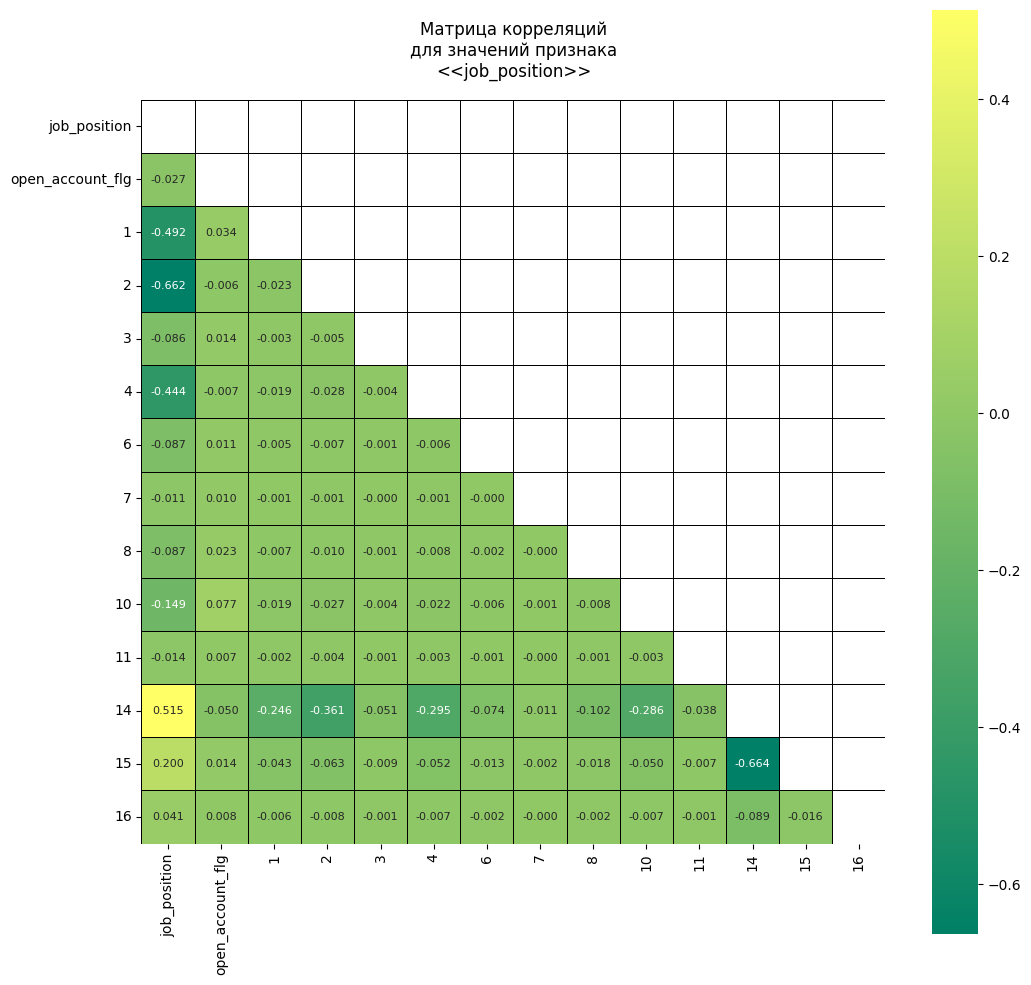

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(data = df_job_position2.corr(), annot=True,
                 square=True, annot_kws={"size":8},
                 cmap='summer', fmt='.3f', linewidths=0.5,
                 linecolor='black', mask=np.triu(df_job_position2.corr()))
plt.title('Матрица корреляций\nдля значений признака\n<<job_position>>', y = 1.02)
plt.show()

Для определения характера зависимости между 'job_position' и целевым признаком 'open_account_flg' рассчитаем моду по каждому из занчений (open_account_flg = 0 и open_account_flg = 1).

In [ ]:
df_job_position_count = df_job_position.groupby(['open_account_flg', \
                                                     'job_position']).\
                                      agg(count = ('job_position', 'count')).\
                                      reset_index()

df_job_position_count

open_account_flg  job_position   count
0                  0             1    1853
1                  0             2    4517
2                  0             3      72
3                  0             4    3070
4                  0             5       6
5                  0             6     166
6                  0             7       1
7                  0             8     298
8                  0            10    2185
9                  0            11      44
10                 0            12       5
11                 0            13      28
12                 0            14  106865
13                 0            15   13704
14                 0            16     256
15                 0            17     508
16                 0            18      76
17                 1             1     661
18                 1             2     804
19                 1             3      40
20                 1             4     523
21                 1             5       2
22                 1             6      63
23                 1             7       4
24                 1             8     142
25                 1            10    1213
26                 1            11      18
27                 1            12       3
28                 1            13       8
29                 1            14   19475
30                 1            15    2995
31                 1            16      75
32                 1            17     106
33                 1            18      21

In [ ]:
df_job_position_count['percent'] = np.nan
for i in df_job_position_count.index:
    if df_job_position_count.loc[i, ('open_account_flg')] == 0:
        df_job_position_count.loc[i, ('percent')] = (df_job_position_count['count'][i]/\
        df_job_position_count[df_job_position_count.open_account_flg == 0]\
         ['count'].sum()*100)
    else:
        df_job_position_count.loc[i, ('percent')] = df_job_position_count['count'][i]/\
        df_job_position_count[df_job_position_count.open_account_flg == 1]\
         ['count'].sum()*100
df_job_position_count['percent'] = round(df_job_position_count['percent'],2)
df_job_position_count

open_account_flg  job_position   count  percent
0                  0             1    1853     1.39
1                  0             2    4517     3.38
2                  0             3      72     0.05
3                  0             4    3070     2.30
4                  0             5       6     0.00
5                  0             6     166     0.12
6                  0             7       1     0.00
7                  0             8     298     0.22
8                  0            10    2185     1.63
9                  0            11      44     0.03
10                 0            12       5     0.00
11                 0            13      28     0.02
12                 0            14  106865    79.96
13                 0            15   13704    10.25
14                 0            16     256     0.19
15                 0            17     508     0.38
16                 0            18      76     0.06
17                 1             1     661     2.53
18                 1             2     804     3.07
19                 1             3      40     0.15
20                 1             4     523     2.00
21                 1             5       2     0.01
22                 1             6      63     0.24
23                 1             7       4     0.02
24                 1             8     142     0.54
25                 1            10    1213     4.64
26                 1            11      18     0.07
27                 1            12       3     0.01
28                 1            13       8     0.03
29                 1            14   19475    74.47
30                 1            15    2995    11.45
31                 1            16      75     0.29
32                 1            17     106     0.41
33                 1            18      21     0.08

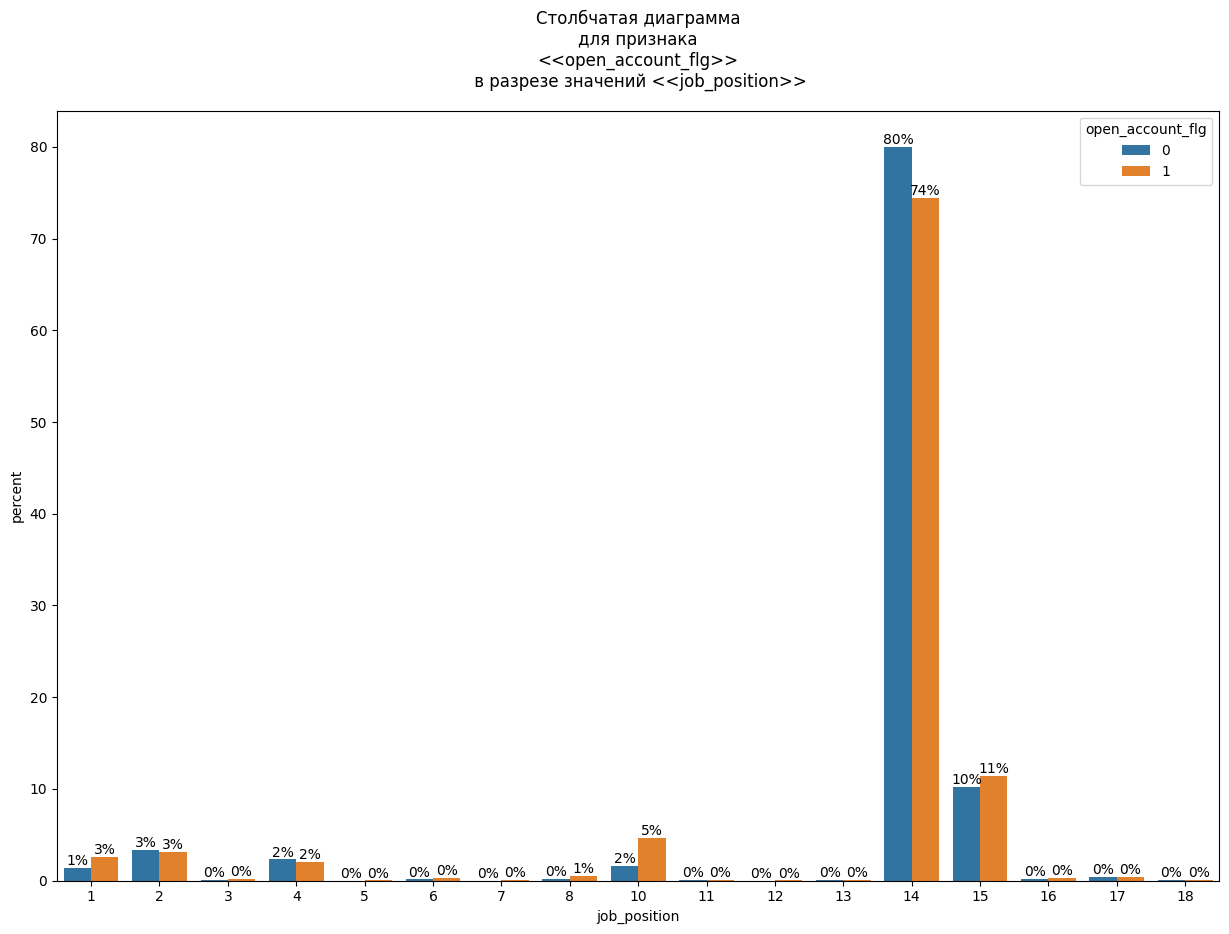

In [ ]:
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.barplot(data = df_job_position_count,
              x = df_job_position_count['job_position'],
              y = df_job_position_count['percent'],
              hue = df_job_position_count['open_account_flg']);
for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.0f}%'.format(p.get_height()),
            (x.mean(), y), ha = 'center', va = 'bottom', fontsize = 10)
plt.title('Столбчатая диаграмма\nдля признака\n<<open_account_flg>>\n в разрезе значений <<job_position>>', y = 1.02)
plt.show()

Таким образом, учитывая показатели моды признака 'job_position' и коэффициенты корреляции, можно установить, что клиенты со значением job_position = 14 скорее откажутся открывать кредитные карты. Напротив, клиенты со значением job_position = 10, склонны звести такую карту. Остальные варианты 'job_position' не оказывают существенного влияния на целевую переменную, т.к. их доли в разрезе целевых групп клиентов приблизительно равны, а удельный вес в общей совокупности показателя 'job_position' сопоставимо мал.

## credit_month - Срок кредитования

In [ ]:
df_credit_month = df_copy[['credit_month', 'open_account_flg']]
df_credit_month

credit_month  open_account_flg
0                 10                 0
2                 12                 0
3                 12                 0
5                 10                 0
7                 10                 0
...              ...               ...
170741            12                 0
170742             6                 0
170743            10                 0
170744            12                 0
170745            10                 0

[159807 rows x 2 columns]

In [ ]:
# список уникальных значений категориального признака 'credit_month'
credit_month_var = list(df_copy['credit_month'].unique())
credit_month_var.sort()
credit_month_var

[3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 30,
 32,
 36]

In [ ]:
# добавление пустых столбцов в DF df_credit_month.
# Заголовки столбцов соответствуют уникальным начениям признака credit_month

for name in credit_month_var:
    df_credit_month.loc[:, (name)] = np.nan


In [ ]:
df_credit_month.head(2)

credit_month  open_account_flg   3   4   5   6   7   8   9  10  ...  22  \
0            10                 0 NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN   
2            12                 0 NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN   

   23  24  25  26  27  28  30  32  36  
0 NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2 NaN NaN NaN NaN NaN NaN NaN NaN NaN  

[2 rows x 31 columns]

In [ ]:
# заполняем новые столбцы
for i in credit_month_var:
    for ind in df_credit_month.index:
        if df_credit_month['credit_month'][ind] == i: # если значение credit_month совпадает с заголовком столбца
            df_credit_month.loc[ind, (i)] = 1 # ставим 1
        else:
            df_credit_month.loc[ind, (i)] = 0  # в противном случае 0

df_credit_month.head(10)

credit_month  open_account_flg    3    4    5    6    7    8    9   10  \
0             10                 0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
2             12                 0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3             12                 0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
5             10                 0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
7             10                 0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
9             10                 0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
11            10                 0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
13            10                 0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
17            12                 1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
18            10                 0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   

    ...   22   23   24   25   26   27   28   30   32   36  
0   ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2   ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3   ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
5   ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
7   ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
9   ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
11  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
13  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
17  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
18  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[10 rows x 31 columns]

In [ ]:
def test_z_criterion(col, goal, alpha):
    import scipy.stats as st
    import math
    gen_group_shape = df_credit_month[col].value_counts()
    goal_group_shape = df_credit_month.groupby(col)[goal].sum()
    p = goal_group_shape / gen_group_shape
    p_combined = goal_group_shape.sum() / gen_group_shape.sum()
    difference = p.iloc[0] - p.iloc[1]
    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/gen_group_shape.iloc[0] + 1/gen_group_shape.iloc[1]))
    distr = st.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    print('Результаты проверки гипотезы H_0 по z-критерию:')
    print('Уровень значимости alpha={:.2f}'.format(alpha))
    print('P-value: {:.2f}'.format(p_value))
    if p_value < alpha:
        print(f"""Отвергаем нулевую гипотезу: разница в долях
по признаку <<{col}>> статистически значима.""")
    else:
        print(f"""Не получилось отвергнуть нулевую гипотезу: разница в долях по
признаку <<{col}>> статистически незначима.""")
    print('------------------------------------------------------------')

In [ ]:
for col in credit_month_var:
    test_z_criterion(col, 'open_account_flg', 0.05)

Результаты проверки гипотезы H_0 по z-критерию:
Уровень значимости alpha=0.05
P-value: 0.00
Отвергаем нулевую гипотезу: разница в долях
по признаку <<3>> статистически значима.
------------------------------------------------------------
Результаты проверки гипотезы H_0 по z-критерию:
Уровень значимости alpha=0.05
P-value: 0.00
Отвергаем нулевую гипотезу: разница в долях
по признаку <<4>> статистически значима.
------------------------------------------------------------
Результаты проверки гипотезы H_0 по z-критерию:
Уровень значимости alpha=0.05
P-value: 0.00
Отвергаем нулевую гипотезу: разница в долях
по признаку <<5>> статистически значима.
------------------------------------------------------------
Результаты проверки гипотезы H_0 по z-критерию:
Уровень значимости alpha=0.05
P-value: 0.00
Отвергаем нулевую гипотезу: разница в долях
по признаку <<6>> статистически значима.
------------------------------------------------------------
Результаты проверки гипотезы H_0 по z-критерию:


Так, проверка по z-критерию показала, что признак 'credit_month' оказывает влияние на целевую переменную ,если принимает значения [3, 4, 5, 6, 10, 11, 12, 13, 14, 15, 16, 18, 20, 24, 28, 36]

In [ ]:
df_credit_month.columns

Index([    'credit_month', 'open_account_flg',                  3,
                        4,                  5,                  6,
                        7,                  8,                  9,
                       10,                 11,                 12,
                       13,                 14,                 15,
                       16,                 17,                 18,
                       19,                 20,                 21,
                       22,                 23,                 24,
                       25,                 26,                 27,
                       28,                 30,                 32,
                       36],
      dtype='object')

In [ ]:
# Отсеем "незначимые" столбцы

df_credit_month2 = df_credit_month[['credit_month', 'open_account_flg', 3, 4, 5, 6, 10, 11, 12, 13, 14, 15, 16, 18, 20, 24, 28, 36]]
df_credit_month2

credit_month  open_account_flg    3    4    5    6   10   11   12  \
0                 10                 0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
2                 12                 0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
3                 12                 0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
5                 10                 0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
7                 10                 0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
...              ...               ...  ...  ...  ...  ...  ...  ...  ...   
170741            12                 0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
170742             6                 0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
170743            10                 0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
170744            12                 0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
170745            10                 0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   

         13   14   15   16   18   20   24   28   36  
0       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
5       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
7       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  
170741  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
170742  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
170743  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
170744  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
170745  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[159807 rows x 18 columns]

In [ ]:
df_credit_month2.corr()

credit_month  open_account_flg         3         4  \
credit_month          1.000000          0.022947 -0.188463 -0.176814   
open_account_flg      0.022947          1.000000  0.051640  0.018471   
3                    -0.188463          0.051640  1.000000 -0.007446   
4                    -0.176814          0.018471 -0.007446  1.000000   
5                    -0.078526          0.012822 -0.003859 -0.004138   
6                    -0.355890          0.037988 -0.020994 -0.022513   
10                   -0.319307         -0.098985 -0.094852 -0.101717   
11                    0.000134         -0.012047 -0.004472 -0.004796   
12                    0.170596          0.056816 -0.049787 -0.053391   
13                    0.040099          0.010978 -0.005877 -0.006303   
14                    0.106851         -0.033871 -0.010456 -0.011213   
15                    0.041644          0.007759 -0.003059 -0.003280   
16                    0.067266          0.007591 -0.003954 -0.004240   
18                    0.260537          0.050239 -0.010945 -0.011737   
20                    0.064120          0.008393 -0.002096 -0.002247   
24                    0.712391          0.022691 -0.016123 -0.017290   
28                    0.034061          0.006433 -0.000590 -0.000632   
36                    0.384009          0.005705 -0.004521 -0.004848   

                         5         6        10        11        12        13  \
credit_month     -0.078526 -0.355890 -0.319307  0.000134  0.170596  0.040099   
open_account_flg  0.012822  0.037988 -0.098985 -0.012047  0.056816  0.010978   
3                -0.003859 -0.020994 -0.094852 -0.004472 -0.049787 -0.005877   
4                -0.004138 -0.022513 -0.101717 -0.004796 -0.053391 -0.006303   
5                 1.000000 -0.011667 -0.052714 -0.002485 -0.027669 -0.003266   
6                -0.011667  1.000000 -0.286776 -0.013522 -0.150527 -0.017769   
10               -0.052714 -0.286776  1.000000 -0.061092 -0.680094 -0.080282   
11               -0.002485 -0.013522 -0.061092  1.000000 -0.032067 -0.003785   
12               -0.027669 -0.150527 -0.680094 -0.032067  1.000000 -0.042139   
13               -0.003266 -0.017769 -0.080282 -0.003785 -0.042139  1.000000   
14               -0.005811 -0.031612 -0.142826 -0.006734 -0.074968 -0.008850   
15               -0.001700 -0.009247 -0.041779 -0.001970 -0.021930 -0.002589   
16               -0.002197 -0.011955 -0.054012 -0.002547 -0.028350 -0.003347   
18               -0.006082 -0.033090 -0.149503 -0.007049 -0.078473 -0.009263   
20               -0.001165 -0.006336 -0.028625 -0.001350 -0.015025 -0.001774   
24               -0.008961 -0.048747 -0.220246 -0.010385 -0.115605 -0.013647   
28               -0.000328 -0.001783 -0.008054 -0.000380 -0.004227 -0.000499   
36               -0.002513 -0.013668 -0.061756 -0.002912 -0.032415 -0.003826   

                        14        15        16        18        20        24  \
credit_month      0.106851  0.041644  0.067266  0.260537  0.064120  0.712391   
open_account_flg -0.033871  0.007759  0.007591  0.050239  0.008393  0.022691   
3                -0.010456 -0.003059 -0.003954 -0.010945 -0.002096 -0.016123   
4                -0.011213 -0.003280 -0.004240 -0.011737 -0.002247 -0.017290   
5                -0.005811 -0.001700 -0.002197 -0.006082 -0.001165 -0.008961   
6                -0.031612 -0.009247 -0.011955 -0.033090 -0.006336 -0.048747   
10               -0.142826 -0.041779 -0.054012 -0.149503 -0.028625 -0.220246   
11               -0.006734 -0.001970 -0.002547 -0.007049 -0.001350 -0.010385   
12               -0.074968 -0.021930 -0.028350 -0.078473 -0.015025 -0.115605   
13               -0.008850 -0.002589 -0.003347 -0.009263 -0.001774 -0.013647   
14                1.000000 -0.004605 -0.005954 -0.016480 -0.003155 -0.024278   
15               -0.004605  1.000000 -0.001742 -0.004821 -0.000923 -0.007102   
16               -0.005954 -0.001742  1.000000 -0.006232 -0.001193 -0.009181   
18      

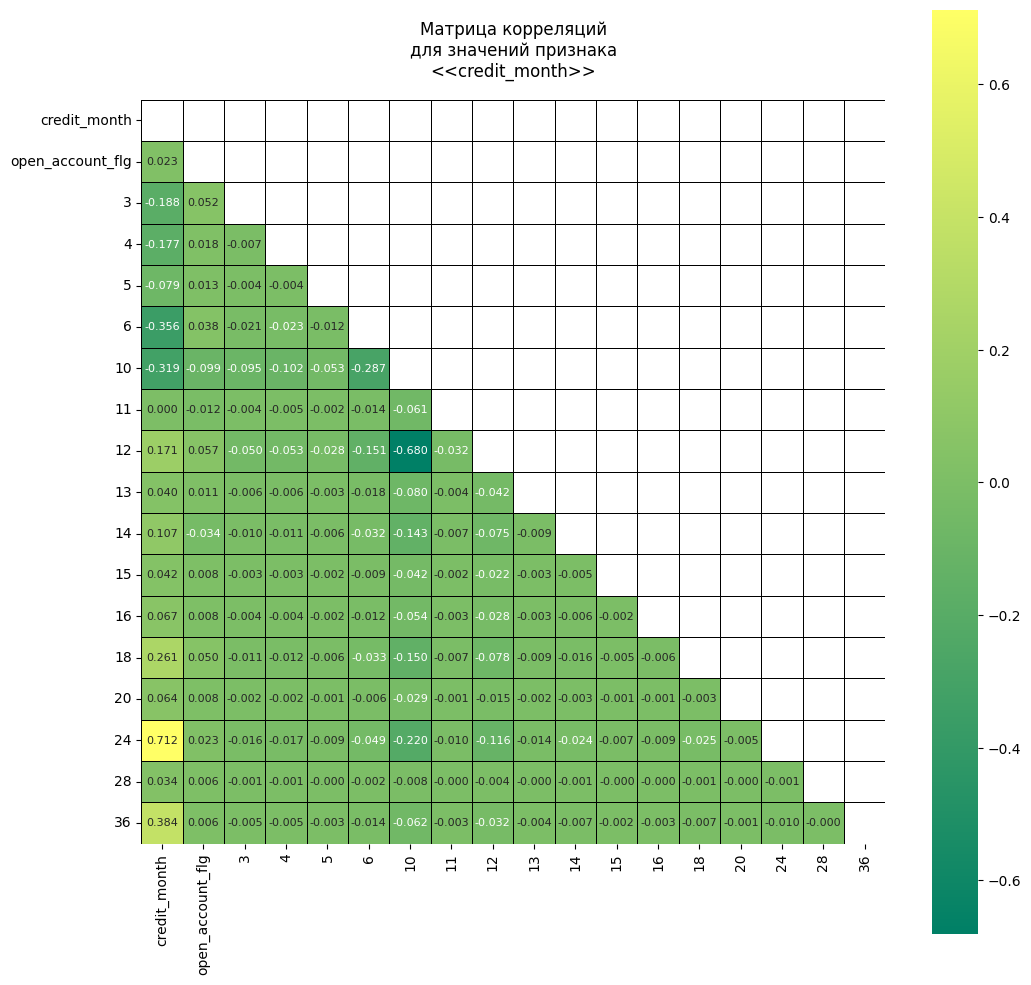

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(data = df_credit_month2.corr(), annot=True,
                 square=True, annot_kws={"size":8},
                 cmap='summer', fmt='.3f', linewidths=0.5,
                 linecolor='black', mask=np.triu(df_credit_month2.corr()))
plt.title('Матрица корреляций\nдля значений признака\n<<credit_month>>', y = 1.02)
plt.show()

Для определения характера зависимости между 'credit_month' и целевым признаком 'open_account_flg' рассчитаем моду по каждому из занчений (open_account_flg = 0 и open_account_flg = 1).

In [ ]:
df_credit_month_count = df_credit_month.groupby(['open_account_flg', \
                                                     'credit_month']).\
                                      agg(count = ('credit_month', 'count')).\
                                      reset_index()

df_credit_month_count

open_account_flg  credit_month  count
0                  0             3    669
1                  0             4    962
2                  0             5    251
3                  0             6   7445
4                  0             7    269
5                  0             8    764
6                  0             9    487
7                  0            10  78336
8                  0            11    422
9                  0            12  33681
10                 0            13    616
11                 0            14   2319
12                 0            15    163
13                 0            16    279
14                 0            17     27
15                 0            18   1883
16                 0            19     10
17                 0            20     72
18                 0            21      6
19                 0            22     10
20                 0            23     10
21                 0            24   4573
22                 0            25      4
23                 0            26      7
24                 0            27      1
25                 0            28      4
26                 0            30      7
27                 0            32      3
28                 0            36    374
29                 1             3    433
30                 1             4    304
31                 1             5     91
32                 1             6   2093
33                 1             7     67
34                 1             8    173
35                 1             9    105
36                 1            10  11859
37                 1            11     37
38                 1            12   8359
39                 1            13    175
40                 1            14    158
41                 1            15     52
42                 1            16     80
43                 1            17      4
44                 1            18    827
45                 1            19      5
46                 1            20     29
47                 1            22      1
48                 1            23      1
49                 1            24   1194
50                 1            26      1
51                 1            27      1
52                 1            28      4
53                 1            30      4
54                 1            32      1
55                 1            36     95

In [ ]:
df_credit_month_count['percent'] = np.nan
for i in df_credit_month_count.index:
    if df_credit_month_count.loc[i, ('open_account_flg')] == 0:
        df_credit_month_count.loc[i, ('percent')] = (df_credit_month_count['count'][i]/\
        df_credit_month_count[df_credit_month_count.open_account_flg == 0]\
         ['count'].sum()*100)
    else:
        df_credit_month_count.loc[i, ('percent')] = df_credit_month_count['count'][i]/\
        df_credit_month_count[df_credit_month_count.open_account_flg == 1]\
         ['count'].sum()*100
df_credit_month_count['percent'] = round(df_credit_month_count['percent'],2)
df_credit_month_count

open_account_flg  credit_month  count  percent
0                  0             3    669     0.50
1                  0             4    962     0.72
2                  0             5    251     0.19
3                  0             6   7445     5.57
4                  0             7    269     0.20
5                  0             8    764     0.57
6                  0             9    487     0.36
7                  0            10  78336    58.61
8                  0            11    422     0.32
9                  0            12  33681    25.20
10                 0            13    616     0.46
11                 0            14   2319     1.74
12                 0            15    163     0.12
13                 0            16    279     0.21
14                 0            17     27     0.02
15                 0            18   1883     1.41
16                 0            19     10     0.01
17                 0            20     72     0.05
18                 0            21      6     0.00
19                 0            22     10     0.01
20                 0            23     10     0.01
21                 0            24   4573     3.42
22                 0            25      4     0.00
23                 0            26      7     0.01
24                 0            27      1     0.00
25                 0            28      4     0.00
26                 0            30      7     0.01
27                 0            32      3     0.00
28                 0            36    374     0.28
29                 1             3    433     1.66
30                 1             4    304     1.16
31                 1             5     91     0.35
32                 1             6   2093     8.00
33                 1             7     67     0.26
34                 1             8    173     0.66
35                 1             9    105     0.40
36                 1            10  11859    45.34
37                 1            11     37     0.14
38                 1            12   8359    31.96
39                 1            13    175     0.67
40                 1            14    158     0.60
41                 1            15     52     0.20
42                 1            16     80     0.31
43                 1            17      4     0.02
44                 1            18    827     3.16
45                 1            19      5     0.02
46                 1            20     29     0.11
47                 1            22      1     0.00
48                 1            23      1     0.00
49                 1            24   1194     4.57
50                 1            26      1     0.00
51                 1            27      1     0.00
52                 1            28      4     0.02
53                 1            30      4     0.02
54                 1            32      1     0.00
55                 1            36     95     0.36

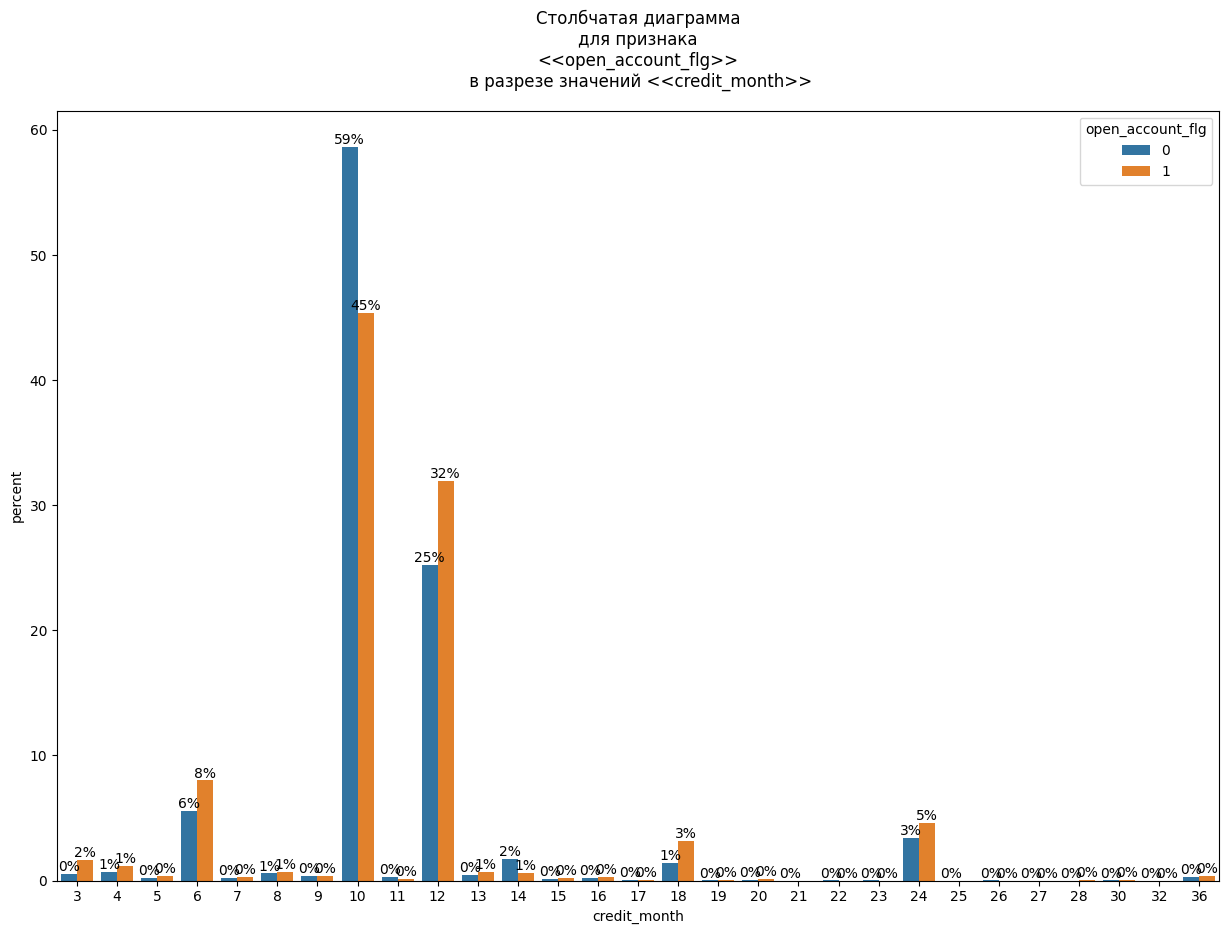

In [ ]:
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.barplot(data = df_credit_month_count,
              x = df_credit_month_count['credit_month'],
              y = df_credit_month_count['percent'],
              hue = df_credit_month_count['open_account_flg'],
              );
for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.0f}%'.format(p.get_height()),
            (x.mean(), y), ha = 'center', va = 'bottom', fontsize = 10)
plt.title('Столбчатая диаграмма\nдля признака\n<<open_account_flg>>\n в разрезе значений <<credit_month>>', y = 1.02)
plt.show()

Таким образом, учитывая показатели моды признака 'credit_month' и коэффициенты корреляции, можно установить, что клиенты, получившие кредит на срок 10 месяцев, скорее откажутся открывать кредитные карты. Напротив, заемщики со стандартными сроками кредитования - 3, 6, 12, 18, 24 месяца(ев) - склонны звести такую карту. Остальные сроки 'credit_month' не оказывают существенного влияния на целевую переменную, т.к. их доли в разрезе целевых групп клиентов приблизительно равны, а удельный вес в общей совокупности показателя 'credit_month' ничтожно мал.

## education - Образование

In [ ]:
df_education = df_copy[['education', 'open_account_flg']]
df_education

education  open_account_flg
0             2.0                 0
2             4.0                 0
3             2.0                 0
5             4.0                 0
7             2.0                 0
...           ...               ...
170741        2.0                 0
170742        4.0                 0
170743        2.0                 0
170744        4.0                 0
170745        2.0                 0

[159807 rows x 2 columns]

In [ ]:
# список уникальных значений категориального признака 'education'
education_var = list(df_copy['education'].unique())
education_var.sort()
education_var

[1.0, 2.0, 3.0, 4.0, 5.0]

In [ ]:
# добавление пустых столбцов в DF df_education.
# Заголовки столбцов соответствуют уникальным начениям признака education

for name in education_var:
    df_education.loc[:, (name)] = np.nan

In [ ]:
df_education.head(2)

education  open_account_flg  1.0  2.0  3.0  4.0  5.0
0        2.0                 0  NaN  NaN  NaN  NaN  NaN
2        4.0                 0  NaN  NaN  NaN  NaN  NaN

In [ ]:
# добавляем новые столбцы
for i in education_var:
    for ind in df_education.index:
        if df_education['education'][ind] == i: # если значение education совпадает с заголовком столбца
            df_education.loc[ind, (i)] = 1 # ставим 1
        else:
            df_education.loc[ind, (i)] = 0  # в противном случае 0

df_education.head(10)

education  open_account_flg  1.0  2.0  3.0  4.0  5.0
0         2.0                 0  0.0  1.0  0.0  0.0  0.0
2         4.0                 0  0.0  0.0  0.0  1.0  0.0
3         2.0                 0  0.0  1.0  0.0  0.0  0.0
5         4.0                 0  0.0  0.0  0.0  1.0  0.0
7         2.0                 0  0.0  1.0  0.0  0.0  0.0
9         2.0                 0  0.0  1.0  0.0  0.0  0.0
11        2.0                 0  0.0  1.0  0.0  0.0  0.0
13        2.0                 0  0.0  1.0  0.0  0.0  0.0
17        2.0                 1  0.0  1.0  0.0  0.0  0.0
18        4.0                 0  0.0  0.0  0.0  1.0  0.0

In [ ]:
def test_z_criterion(col, goal, alpha):
    import scipy.stats as st
    import math
    gen_group_shape = df_education[col].value_counts()
    goal_group_shape = df_education.groupby(col)[goal].sum()
    p = goal_group_shape / gen_group_shape
    p_combined = goal_group_shape.sum() / gen_group_shape.sum()
    difference = p.iloc[0] - p.iloc[1]
    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/gen_group_shape.iloc[0] + 1/gen_group_shape.iloc[1]))
    distr = st.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    print('Результаты проверки гипотезы H_0 по z-критерию:')
    print('Уровень значимости alpha={:.2f}'.format(alpha))
    print('P-value: {:.2f}'.format(p_value))
    if p_value < alpha:
        print(f"""Отвергаем нулевую гипотезу: разница в долях
по признаку <<{col}>> статистически значима.""")
    else:
        print(f"""Не получилось отвергнуть нулевую гипотезу: разница в долях по
признаку <<{col}>> статистически незначима.""")
    print('------------------------------------------------------------')

In [ ]:
for col in education_var:
    test_z_criterion(col, 'open_account_flg', 0.05)

Результаты проверки гипотезы H_0 по z-критерию:
Уровень значимости alpha=0.05
P-value: 0.08
Не получилось отвергнуть нулевую гипотезу: разница в долях по
признаку <<1.0>> статистически незначима.
------------------------------------------------------------
Результаты проверки гипотезы H_0 по z-критерию:
Уровень значимости alpha=0.05
P-value: 0.00
Отвергаем нулевую гипотезу: разница в долях
по признаку <<2.0>> статистически значима.
------------------------------------------------------------
Результаты проверки гипотезы H_0 по z-критерию:
Уровень значимости alpha=0.05
P-value: 0.12
Не получилось отвергнуть нулевую гипотезу: разница в долях по
признаку <<3.0>> статистически незначима.
------------------------------------------------------------
Результаты проверки гипотезы H_0 по z-критерию:
Уровень значимости alpha=0.05
P-value: 0.00
Отвергаем нулевую гипотезу: разница в долях
по признаку <<4.0>> статистически значима.
------------------------------------------------------------
Резуль

Так, проверка по z-критерию показала, что признак 'education' оказывает влияние на целевую переменную ,если принимает значения [2, 4]

In [ ]:
df_education.columns

Index(['education', 'open_account_flg', 1.0, 2.0, 3.0, 4.0, 5.0], dtype='object')

In [ ]:
# Отсеем "незначимые" столбцы

df_education2 = df_education[['education', 'open_account_flg', 2.0, 4.0]]
df_education2

education  open_account_flg  2.0  4.0
0             2.0                 0  1.0  0.0
2             4.0                 0  0.0  1.0
3             2.0                 0  1.0  0.0
5             4.0                 0  0.0  1.0
7             2.0                 0  1.0  0.0
...           ...               ...  ...  ...
170741        2.0                 0  1.0  0.0
170742        4.0                 0  0.0  1.0
170743        2.0                 0  1.0  0.0
170744        4.0                 0  0.0  1.0
170745        2.0                 0  1.0  0.0

[159807 rows x 4 columns]

In [ ]:
df_education2.corr()

education  open_account_flg       2.0       4.0
education          1.000000          0.062588 -0.973399  0.782293
open_account_flg   0.062588          1.000000 -0.068129  0.067815
2.0               -0.973399         -0.068129  1.000000 -0.889096
4.0                0.782293          0.067815 -0.889096  1.000000

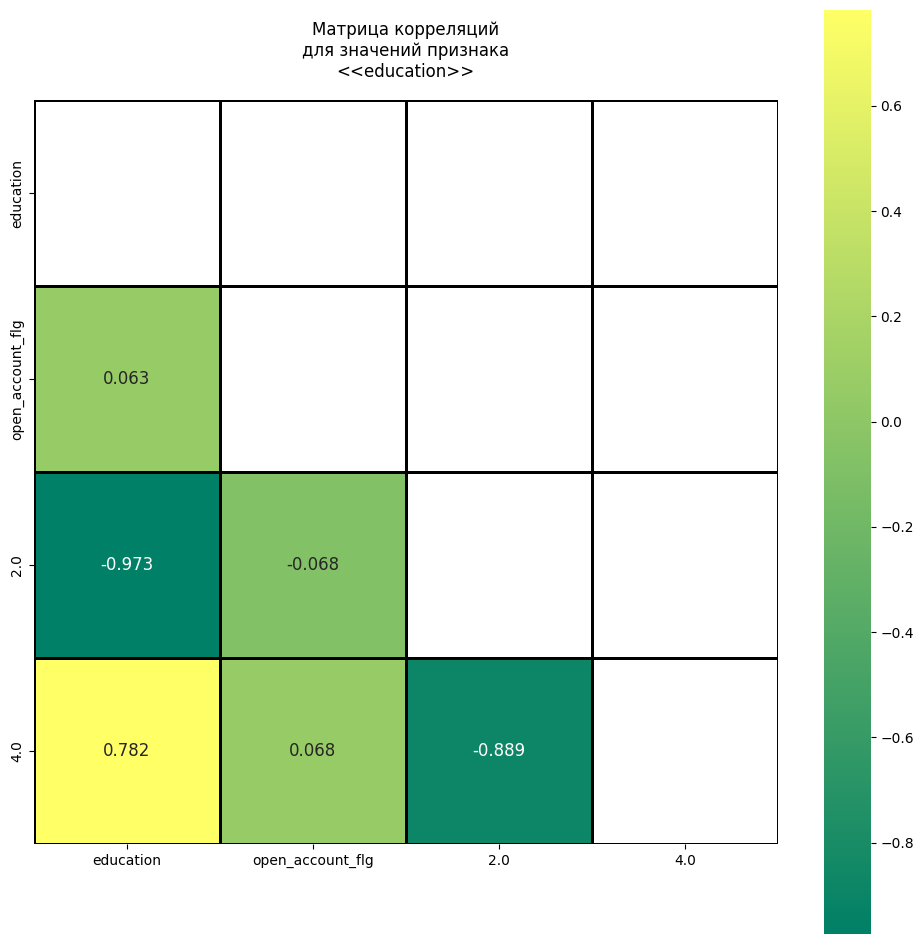

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(data = df_education2.corr(), annot=True,
                 square=True, annot_kws={"size":12},
                 cmap='summer', fmt='.3f', linewidths=1,
                 linecolor='black', mask=np.triu(df_education2.corr()))
plt.title('Матрица корреляций\nдля значений признака\n<<education>>', y = 1.02)
plt.show()

Для определения характера зависимости между 'education' и целевым признаком 'open_account_flg' рассчитаем моду по каждому из занчений (open_account_flg = 0 и open_account_flg = 1).

In [ ]:
df_education_count = df_education.groupby(['open_account_flg', \
                                                     'education']).\
                                      agg(count = ('education', 'count')).\
                                      reset_index()

df_education_count

open_account_flg  education  count
0                 0        1.0     78
1                 0        2.0  59593
2                 0        3.0    431
3                 0        4.0  66255
4                 0        5.0   7297
5                 1        1.0     23
6                 1        2.0   9276
7                 1        3.0    100
8                 1        4.0  15361
9                 1        5.0   1393

In [ ]:
df_education_count['percent'] = np.nan
for i in df_education_count.index:
    if df_education_count.loc[i, ('open_account_flg')] == 0:
        df_education_count.loc[i, ('percent')] = (df_education_count['count'][i]/\
        df_education_count[df_education_count.open_account_flg == 0]\
         ['count'].sum()*100)
    else:
        df_education_count.loc[i, ('percent')] = df_education_count['count'][i]/\
        df_education_count[df_education_count.open_account_flg == 1]\
         ['count'].sum()*100
df_education_count['percent'] = round(df_education_count['percent'],2)
df_education_count

open_account_flg  education  count  percent
0                 0        1.0     78     0.06
1                 0        2.0  59593    44.59
2                 0        3.0    431     0.32
3                 0        4.0  66255    49.57
4                 0        5.0   7297     5.46
5                 1        1.0     23     0.09
6                 1        2.0   9276    35.47
7                 1        3.0    100     0.38
8                 1        4.0  15361    58.74
9                 1        5.0   1393     5.33

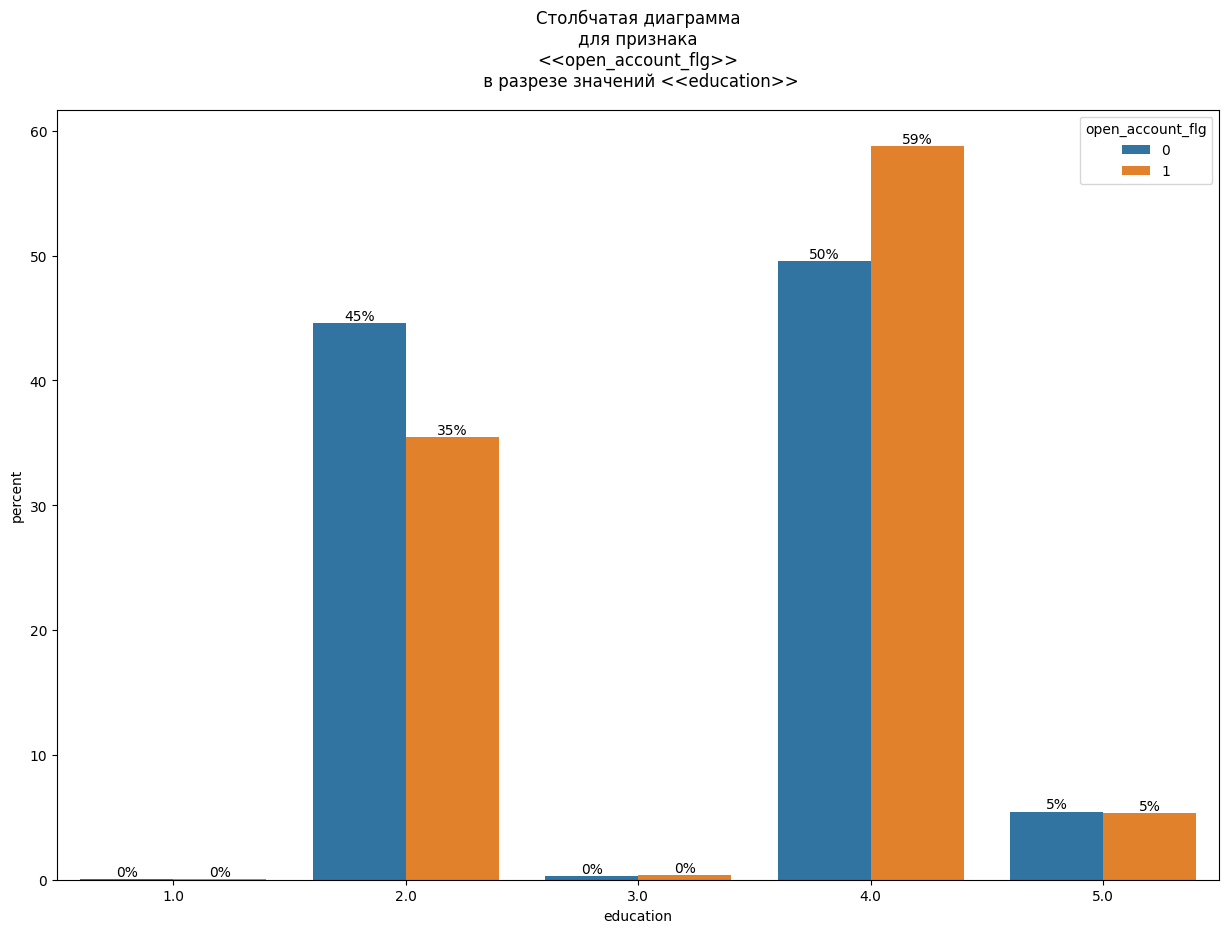

In [ ]:
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.barplot(data = df_education_count,
              x = df_education_count['education'],
              y = df_education_count['percent'],
              hue = df_education_count['open_account_flg'],
                );
for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.0f}%'.format(p.get_height()),
            (x.mean(), y), ha = 'center', va = 'bottom', fontsize = 10)
plt.title('Столбчатая диаграмма\nдля признака\n<<open_account_flg>>\n в разрезе значений <<education>>', y = 1.02)
plt.show()

Таким образом, учитывая показатели моды признака 'education' и коэффициенты корреляции, можно установить, что клиенты с кодом образования 2 скорее откажутся открывать кредитные карты, нежели клиенты, у которых код образования =  4. Остальные значения 'education' не оказывают существенного влияния на целевую переменную, т.к. их доли в разрезе целевых групп клиентов приблизительно равны, а удельный вес в общей совокупности показателя 'education' ничтожно мал.

## tariff_id - 	Идентификационный номер тарифа

In [ ]:
df_tariff_id = df_copy[['tariff_id', 'open_account_flg']]
df_tariff_id

tariff_id  open_account_flg
0              28                 0
2               2                 0
3               2                 0
5               2                 0
7               2                 0
...           ...               ...
170741          2                 0
170742         28                 0
170743         19                 0
170744          2                 0
170745          2                 0

[159807 rows x 2 columns]

In [ ]:
# список уникальных значений категориального признака 'tariff_id'
tariff_id_var = list(df_copy['tariff_id'].unique())
tariff_id_var.sort()
tariff_id_var

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33]

In [ ]:
# добавление пустых столбцов в DF df_tariff_id.
# Заголовки столбцов соответствуют уникальным начениям признака tariff_id

for name in tariff_id_var:
    df_tariff_id.loc[:, (name)] = np.nan

In [ ]:
df_tariff_id.head(2)

tariff_id  open_account_flg   1   2   3   4   5   6   7   8  ...  24  25  \
0         28                 0 NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN   
2          2                 0 NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN   

   26  27  28  29  30  31  32  33  
0 NaN NaN NaN NaN NaN NaN NaN NaN  
2 NaN NaN NaN NaN NaN NaN NaN NaN  

[2 rows x 35 columns]

In [ ]:
# добавляем новые столбцы
for i in tariff_id_var:
    for ind in df_tariff_id.index:
        if df_tariff_id['tariff_id'][ind] == i: # если значение tariff_id совпадает с заголовком столбца
            df_tariff_id.loc[ind, (i)] = 1 # ставим 1
        else:
            df_tariff_id.loc[ind, (i)] = 0  # в противном случае 0

df_tariff_id.head(10)

tariff_id  open_account_flg    1    2    3    4    5    6    7    8  ...  \
0          28                 0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2           2                 0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
3           2                 0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
5           2                 0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
7           2                 0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
9           2                 0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
11         19                 0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
13          2                 0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
17          2                 1  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
18         28                 0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   

     24   25   26   27   28   29   30   31   32   33  
0   0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  
2   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
5   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
7   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
9   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
11  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
13  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
17  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
18  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  

[10 rows x 35 columns]

In [ ]:
def test_z_criterion(col, goal, alpha):
    import scipy.stats as st
    import math
    gen_group_shape = df_tariff_id[col].value_counts()
    goal_group_shape = df_tariff_id.groupby(col)[goal].sum()
    p = goal_group_shape / gen_group_shape
    p_combined = goal_group_shape.sum() / gen_group_shape.sum()
    difference = p.iloc[0] - p.iloc[1]
    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/gen_group_shape.iloc[0] + 1/gen_group_shape.iloc[1]))
    distr = st.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    print('Результаты проверки гипотезы H_0 по z-критерию:')
    print('Уровень значимости alpha={:.2f}'.format(alpha))
    print('P-value: {:.2f}'.format(p_value))
    if p_value < alpha:
        print(f"""Отвергаем нулевую гипотезу: разница в долях
по признаку <<{col}>> статистически значима.""")
    else:
        print(f"""Не получилось отвергнуть нулевую гипотезу: разница в долях по
признаку <<{col}>> статистически незначима.""")
    print('------------------------------------------------------------')

In [ ]:
for col in tariff_id_var:
    test_z_criterion(col, 'open_account_flg', 0.05)

Результаты проверки гипотезы H_0 по z-критерию:
Уровень значимости alpha=0.05
P-value: 0.00
Отвергаем нулевую гипотезу: разница в долях
по признаку <<1>> статистически значима.
------------------------------------------------------------
Результаты проверки гипотезы H_0 по z-критерию:
Уровень значимости alpha=0.05
P-value: 0.00
Отвергаем нулевую гипотезу: разница в долях
по признаку <<2>> статистически значима.
------------------------------------------------------------
Результаты проверки гипотезы H_0 по z-критерию:
Уровень значимости alpha=0.05
P-value: 0.00
Отвергаем нулевую гипотезу: разница в долях
по признаку <<3>> статистически значима.
------------------------------------------------------------
Результаты проверки гипотезы H_0 по z-критерию:
Уровень значимости alpha=0.05
P-value: 0.90
Не получилось отвергнуть нулевую гипотезу: разница в долях по
признаку <<4>> статистически незначима.
------------------------------------------------------------
Результаты проверки гипотезы H_

Так, проверка по z-критерию показала, что признак 'tariff_id' оказывает влияние на целевую переменную ,если принимает значения [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 17, 18, 19, 20, 22, 23, 25, 28, 29, 30, 31, 32]

In [ ]:
df_tariff_id.columns

Index([       'tariff_id', 'open_account_flg',                  1,
                        2,                  3,                  4,
                        5,                  6,                  7,
                        8,                  9,                 10,
                       11,                 12,                 13,
                       14,                 15,                 16,
                       17,                 18,                 19,
                       20,                 21,                 22,
                       23,                 24,                 25,
                       26,                 27,                 28,
                       29,                 30,                 31,
                       32,                 33],
      dtype='object')

In [ ]:
# Отсеем "незначимые" столбцы

df_tariff_id2 = df_tariff_id[['tariff_id', 'open_account_flg', 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 17, 18, 19, 20, 22, 23, 25, 28, 29, 30, 31, 32]]
df_tariff_id2

tariff_id  open_account_flg    1    2    3    5    6    7    8    9  \
0              28                 0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2               2                 0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
3               2                 0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
5               2                 0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
7               2                 0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
...           ...               ...  ...  ...  ...  ...  ...  ...  ...  ...   
170741          2                 0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
170742         28                 0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
170743         19                 0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
170744          2                 0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
170745          2                 0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   

        ...   19   20   22   23   25   28   29   30   31   32  
0       ...  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
2       ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3       ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
5       ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
7       ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
170741  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
170742  ...  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
170743  ...  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
170744  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
170745  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[159807 rows x 24 columns]

In [ ]:
df_tariff_id2.corr()

tariff_id  open_account_flg         1         2         3  \
tariff_id          1.000000         -0.043940 -0.131777 -0.865377 -0.134490   
open_account_flg  -0.043940          1.000000 -0.030444  0.031028 -0.022992   
1                 -0.131777         -0.030444  1.000000 -0.097639 -0.016559   
2                 -0.865377          0.031028 -0.097639  1.000000 -0.117835   
3                 -0.134490         -0.022992 -0.016559 -0.117835  1.000000   
5                 -0.011675          0.030553 -0.001758 -0.012512 -0.002122   
6                 -0.078059         -0.017679 -0.013234 -0.094171 -0.015971   
7                 -0.034881         -0.007319 -0.006763 -0.048129 -0.008162   
8                 -0.035212         -0.016130 -0.007973 -0.056738 -0.009622   
9                 -0.025368         -0.021170 -0.006903 -0.049119 -0.008330   
10                -0.016217         -0.016202 -0.005527 -0.039331 -0.006670   
11                -0.012103         -0.015446 -0.005519 -0.039275 -0.006661   
17                 0.000660          0.005655 -0.000293 -0.002085 -0.000354   
18                 0.049277          0.045185 -0.016453 -0.117084 -0.019857   
19                 0.139279          0.172403 -0.037280 -0.265286 -0.044991   
20                 0.139131         -0.039900 -0.031076 -0.221139 -0.037504   
22                 0.105943         -0.019591 -0.017777 -0.126506 -0.021454   
23                 0.089117         -0.015673 -0.013300 -0.094644 -0.016051   
25                 0.207361         -0.043892 -0.025341 -0.180330 -0.030583   
28                 0.646926         -0.059622 -0.062168 -0.442392 -0.075027   
29                 0.101189         -0.015617 -0.009077 -0.064597 -0.010955   
30                 0.258945         -0.051953 -0.021781 -0.154999 -0.026287   
31                 0.064797          0.009642 -0.005131 -0.036510 -0.006192   
32                 0.078945         -0.007159 -0.005904 -0.042016 -0.007126   

                         5         6         7         8         9  ...  \
tariff_id        -0.011675 -0.078059 -0.034881 -0.035212 -0.025368  ...   
open_account_flg  0.030553 -0.017679 -0.007319 -0.016130 -0.021170  ...   
1                -0.001758 -0.013234 -0.006763 -0.007973 -0.006903  ...   
2                -0.012512 -0.094171 -0.048129 -0.056738 -0.049119  ...   
3                -0.002122 -0.015971 -0.008162 -0.009622 -0.008330  ...   
5                 1.000000 -0.001696 -0.000867 -0.001022 -0.000885  ...   
6                -0.001696  1.000000 -0.006523 -0.007690 -0.006657  ...   
7                -0.000867 -0.006523  1.000000 -0.003930 -0.003402  ...   
8                -0.001022 -0.007690 -0.003930  1.000000 -0.004011  ...   
9                -0.000885 -0.006657 -0.003402 -0.004011  1.000000  ...   
10               -0.000708 -0.005331 -0.002724 -0.003212 -0.002780  ...   
11               -0.000707 -0.005323 -0.002721 -0.003207 -0.002777  ...   
17               -0.000038 -0.000283 -0.000144 -0.000170 -0.000147  ...   
18               -0.002108 -0.015869 -0.008110 -0.009561 -0.008277  ...   
19               -0.004777 -0.035956 -0.018376 -0.021663 -0.018754  ...   
20               -0.003982 -0.029972 -0.015318 -0.018058 -0.015633  ...   
22               -0.002278 -0.017146 -0.008763 -0.010330 -0.008943  ...   
23               -0.001704 -0.012828 -0.006556 -0.007729 -0.006691  ...   
25               -0.003247 -0.024441 -0.012491 -0.014726 -0.012748  ...   
28               -0.007967 -0.059960 -0.030644 -0.036126 -0.031275  ...   
29               -0.001163 -0.008755 -0.004475 -0.005275 -0.004567  ...   
30               -0.002791 -0.021008 -0.010737 -0.012657 -0.010958  ...   
31               -0.000657 -0.004948 -0.002529 -0.002981 -0.002581  ...   
32               -0.000757 -0.005695 -0.002910 -0.003431 -0.002970  ...   

                        19        20        22        23        25        28  \
tariff_id         0.139279  0.139131  0.105943  0.089117  0.207361  0.646926   
open_a

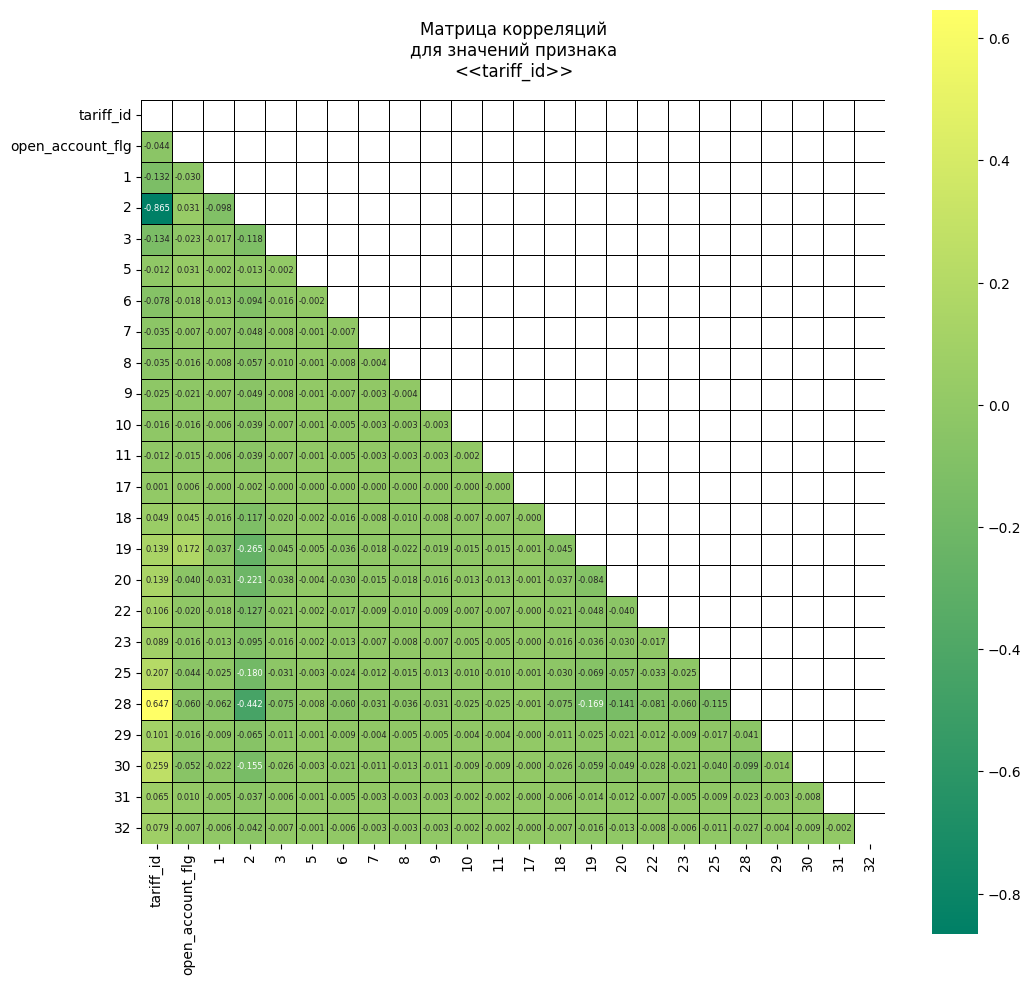

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(data = df_tariff_id2.corr(), annot=True,
                 square=True, annot_kws={"size":6},
                 cmap='summer', fmt='.3f', linewidths=0.5,
                 linecolor='black', mask=np.triu(df_tariff_id2.corr()))
plt.title('Матрица корреляций\nдля значений признака\n<<tariff_id>>', y = 1.02)
plt.show()

Для определения характера зависимости между 'tariff_id' и целевым признаком 'open_account_flg' рассчитаем моду по каждому из занчений (open_account_flg = 0 и open_account_flg = 1).

In [ ]:
df_tariff_id_count = df_tariff_id.groupby(['open_account_flg', \
                                                     'tariff_id']).\
                                      agg(count = ('tariff_id', 'count')).\
                                      reset_index()

df_tariff_id_count

open_account_flg  tariff_id  count
0                  0          1   2017
1                  0          2  53891
2                  0          3   2807
3                  0          4    585
4                  0          5      3
5                  0          6   1801
6                  0          7    469
7                  0          8    681
8                  0          9    536
9                  0         10    342
10                 0         11    339
11                 0         12    251
12                 0         13     43
13                 0         14      9
14                 0         15      6
15                 0         16     10
16                 0         18   2218
17                 0         19   9347
18                 0         20   9373
19                 0         21    101
20                 0         22   3181
21                 0         23   1805
22                 0         24      5
23                 0         25   6512
24                 0         26      7
25                 0         27      2
26                 0         28  30833
27                 0         29    869
28                 0         30   5019
29                 0         31    231
30                 0         32    360
31                 0         33      1
32                 1          1    146
33                 1          2  11624
34                 1          3    324
35                 1          4    113
36                 1          5     33
37                 1          6    213
38                 1          7     62
39                 1          8     56
40                 1          9     17
41                 1         10     13
42                 1         11     15
43                 1         12     45
44                 1         13     12
45                 1         14      1
46                 1         17      1
47                 1         18    874
48                 1         19   5351
49                 1         20   1135
50                 1         21     24
51                 1         22    417
52                 1         23    229
53                 1         25    633
54                 1         28   4288
55                 1         29     85
56                 1         30    322
57                 1         31     75
58                 1         32     45

In [ ]:
df_tariff_id_count['percent'] = np.nan
for i in df_tariff_id_count.index:
    if df_tariff_id_count.loc[i, ('open_account_flg')] == 0:
        df_tariff_id_count.loc[i, ('percent')] = (df_tariff_id_count['count'][i]/\
        df_tariff_id_count[df_tariff_id_count.open_account_flg == 0]\
         ['count'].sum()*100)
    else:
        df_tariff_id_count.loc[i, ('percent')] = df_tariff_id_count['count'][i]/\
        df_tariff_id_count[df_tariff_id_count.open_account_flg == 1]\
         ['count'].sum()*100
df_tariff_id_count['percent'] = round(df_tariff_id_count['percent'],2)
df_tariff_id_count

open_account_flg  tariff_id  count  percent
0                  0          1   2017     1.51
1                  0          2  53891    40.32
2                  0          3   2807     2.10
3                  0          4    585     0.44
4                  0          5      3     0.00
5                  0          6   1801     1.35
6                  0          7    469     0.35
7                  0          8    681     0.51
8                  0          9    536     0.40
9                  0         10    342     0.26
10                 0         11    339     0.25
11                 0         12    251     0.19
12                 0         13     43     0.03
13                 0         14      9     0.01
14                 0         15      6     0.00
15                 0         16     10     0.01
16                 0         18   2218     1.66
17                 0         19   9347     6.99
18                 0         20   9373     7.01
19                 0         21    101     0.08
20                 0         22   3181     2.38
21                 0         23   1805     1.35
22                 0         24      5     0.00
23                 0         25   6512     4.87
24                 0         26      7     0.01
25                 0         27      2     0.00
26                 0         28  30833    23.07
27                 0         29    869     0.65
28                 0         30   5019     3.76
29                 0         31    231     0.17
30                 0         32    360     0.27
31                 0         33      1     0.00
32                 1          1    146     0.56
33                 1          2  11624    44.45
34                 1          3    324     1.24
35                 1          4    113     0.43
36                 1          5     33     0.13
37                 1          6    213     0.81
38                 1          7     62     0.24
39                 1          8     56     0.21
40                 1          9     17     0.07
41                 1         10     13     0.05
42                 1         11     15     0.06
43                 1         12     45     0.17
44                 1         13     12     0.05
45                 1         14      1     0.00
46                 1         17      1     0.00
47                 1         18    874     3.34
48                 1         19   5351    20.46
49                 1         20   1135     4.34
50                 1         21     24     0.09
51                 1         22    417     1.59
52                 1         23    229     0.88
53                 1         25    633     2.42
54                 1         28   4288    16.40
55                 1         29     85     0.33
56                 1         30    322     1.23
57                 1         31     75     0.29
58                 1         32     45     0.17

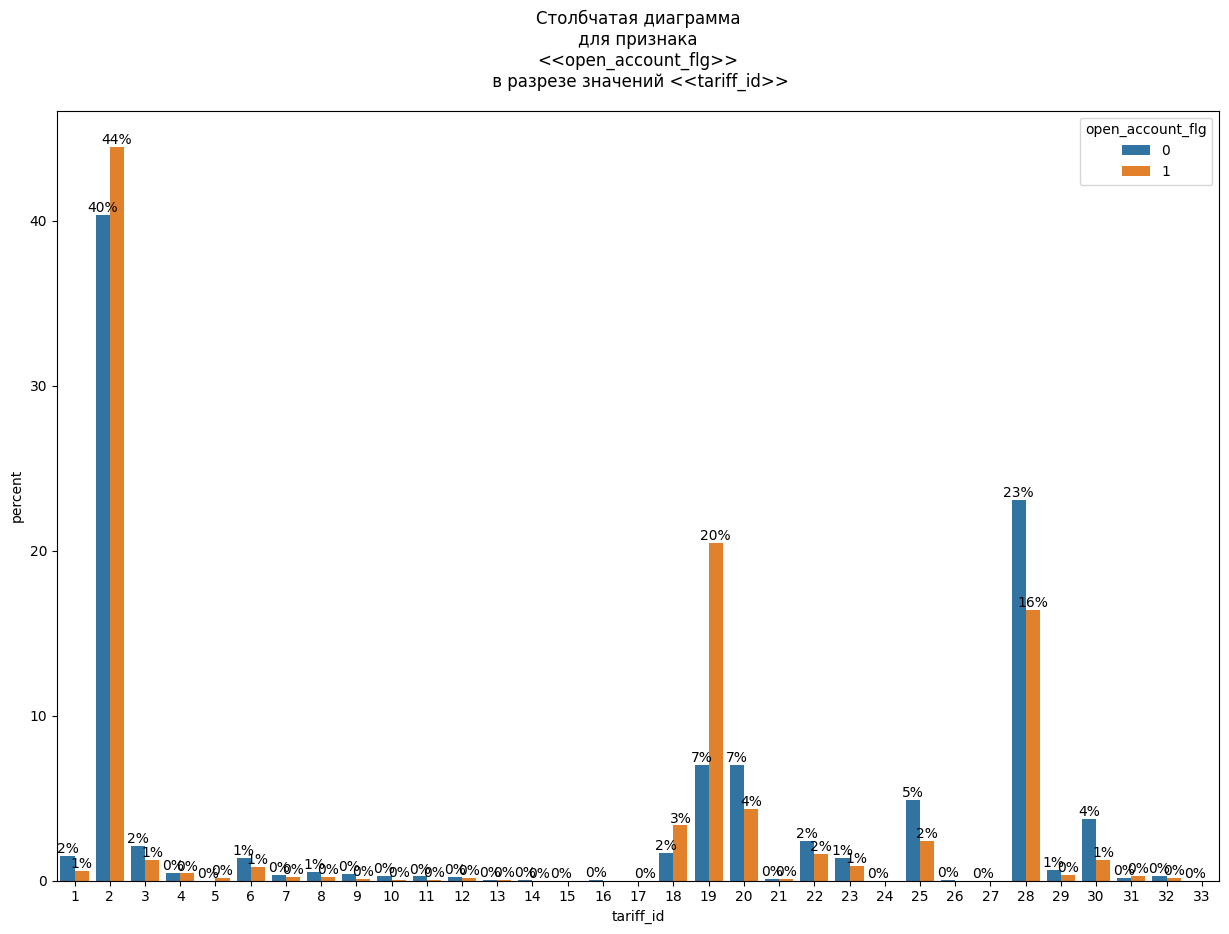

In [ ]:
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.barplot(data = df_tariff_id_count,
              x = df_tariff_id_count['tariff_id'],
              y = df_tariff_id_count['percent'],
              hue = df_tariff_id_count['open_account_flg'],
                );
for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.0f}%'.format(p.get_height()),
            (x.mean(), y), ha = 'center', va = 'bottom', fontsize = 10)
plt.title('Столбчатая диаграмма\nдля признака\n<<open_account_flg>>\n в разрезе значений <<tariff_id>>', y = 1.02)
plt.show()

Таким образом, учитывая показатели моды признака 'tariff_id' и коэффициенты корреляции, можно установить, что клиенты с тарифом 2 и 19 охотнее открывают кредитные карты, нежели клиенты с тарифом 20, 25, 28, 30. Остальные значения 'tariff_id' не оказывают существенного влияния на целевую переменную, т.к. их доли в разрезе целевых групп клиентов приблизительно равны, а удельный вес в общей совокупности показателя 'tariff_id' мал.

## okrug - Федеральный округ

In [ ]:
df_okrug = df_copy[['okrug', 'open_account_flg']]
df_okrug

okrug  open_account_flg
0         8.0                 0
2         2.0                 0
3         8.0                 0
5         4.0                 0
7         7.0                 0
...       ...               ...
170741    2.0                 0
170742    3.0                 0
170743    1.0                 0
170744    2.0                 0
170745    7.0                 0

[159807 rows x 2 columns]

In [ ]:
# список уникальных значений категориального признака 'okrug'
okrug_var = list(df_copy['okrug'].unique())
okrug_var.sort()
okrug_var

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]

In [ ]:
# добавление пустых столбцов в DF df_okrug.
# Заголовки столбцов соответствуют уникальным начениям признака okrug

for name in okrug_var:
    df_okrug.loc[:, (name)] = np.nan

In [ ]:
df_okrug.head(2)

okrug  open_account_flg  1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0
0    8.0                 0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2    2.0                 0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN

In [ ]:
# добавляем новые столбцы
for i in okrug_var:
    for ind in df_okrug.index:
        if df_okrug['okrug'][ind] == i: # если значение okrug совпадает с заголовком столбца
            df_okrug.loc[ind, (i)] = 1 # ставим 1
        else:
            df_okrug.loc[ind, (i)] = 0  # в противном случае 0

df_okrug.head(10)

okrug  open_account_flg  1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0
0     8.0                 0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
2     2.0                 0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
3     8.0                 0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
5     4.0                 0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
7     7.0                 0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
9     4.0                 0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
11    2.0                 0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
13    6.0                 0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
17    6.0                 1  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
18    6.0                 0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0

In [ ]:
def test_z_criterion(col, goal, alpha):
    import scipy.stats as st
    import math
    gen_group_shape = df_okrug[col].value_counts()
    goal_group_shape = df_okrug.groupby(col)[goal].sum()
    p = goal_group_shape / gen_group_shape
    p_combined = goal_group_shape.sum() / gen_group_shape.sum()
    difference = p.iloc[0] - p.iloc[1]
    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/gen_group_shape.iloc[0] + 1/gen_group_shape.iloc[1]))
    distr = st.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    print('Результаты проверки гипотезы H_0 по z-критерию:')
    print('Уровень значимости alpha={:.2f}'.format(alpha))
    print('P-value: {:.2f}'.format(p_value))
    if p_value < alpha:
        print(f"""Отвергаем нулевую гипотезу: разница в долях
по признаку <<{col}>> статистически значима.""")
    else:
        print(f"""Не получилось отвергнуть нулевую гипотезу: разница в долях по
признаку <<{col}>> статистически незначима.""")
    print('------------------------------------------------------------')

In [ ]:
for col in okrug_var:
    test_z_criterion(col, 'open_account_flg', 0.05)

Результаты проверки гипотезы H_0 по z-критерию:
Уровень значимости alpha=0.05
P-value: 0.00
Отвергаем нулевую гипотезу: разница в долях
по признаку <<1.0>> статистически значима.
------------------------------------------------------------
Результаты проверки гипотезы H_0 по z-критерию:
Уровень значимости alpha=0.05
P-value: 0.00
Отвергаем нулевую гипотезу: разница в долях
по признаку <<2.0>> статистически значима.
------------------------------------------------------------
Результаты проверки гипотезы H_0 по z-критерию:
Уровень значимости alpha=0.05
P-value: 0.00
Отвергаем нулевую гипотезу: разница в долях
по признаку <<3.0>> статистически значима.
------------------------------------------------------------
Результаты проверки гипотезы H_0 по z-критерию:
Уровень значимости alpha=0.05
P-value: 0.00
Отвергаем нулевую гипотезу: разница в долях
по признаку <<4.0>> статистически значима.
------------------------------------------------------------
Результаты проверки гипотезы H_0 по z-кр

Так, проверка по z-критерию показала, что все значения признака 'okrug' оказывают влияние на целевую переменную.

In [ ]:
df_okrug.columns

Index(['okrug', 'open_account_flg', 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0], dtype='object')

In [ ]:
df_okrug.corr()

okrug  open_account_flg       1.0       2.0       3.0  \
okrug             1.000000          0.028906 -0.348587 -0.646188 -0.310124   
open_account_flg  0.028906          1.000000  0.014680 -0.028653 -0.026787   
1.0              -0.348587          0.014680  1.000000 -0.107734 -0.080308   
2.0              -0.646188         -0.028653 -0.107734  1.000000 -0.201891   
3.0              -0.310124         -0.026787 -0.080308 -0.201891  1.000000   
4.0              -0.070865         -0.011469 -0.041071 -0.103250 -0.076965   
5.0               0.029772          0.030087 -0.072471 -0.182190 -0.135808   
6.0               0.206784          0.007109 -0.081185 -0.204096 -0.152138   
7.0               0.524323          0.013331 -0.111955 -0.281451 -0.209800   
8.0               0.492106          0.008571 -0.072160 -0.181409 -0.135226   

                       4.0       5.0       6.0       7.0       8.0  
okrug            -0.070865  0.029772  0.206784  0.524323  0.492106  
open_account_flg -0.011469  0.030087  0.007109  0.013331  0.008571  
1.0              -0.041071 -0.072471 -0.081185 -0.111955 -0.072160  
2.0              -0.103250 -0.182190 -0.204096 -0.281451 -0.181409  
3.0              -0.076965 -0.135808 -0.152138 -0.209800 -0.135226  
4.0               1.000000 -0.069455 -0.077806 -0.107295 -0.069157  
5.0              -0.069455  1.000000 -0.137292 -0.189327 -0.122030  
6.0              -0.077806 -0.137292  1.000000 -0.212091 -0.136703  
7.0              -0.107295 -0.189327 -0.212091  1.000000 -0.188516  
8.0              -0.069157 -0.122030 -0.136703 -0.188516  1.000000

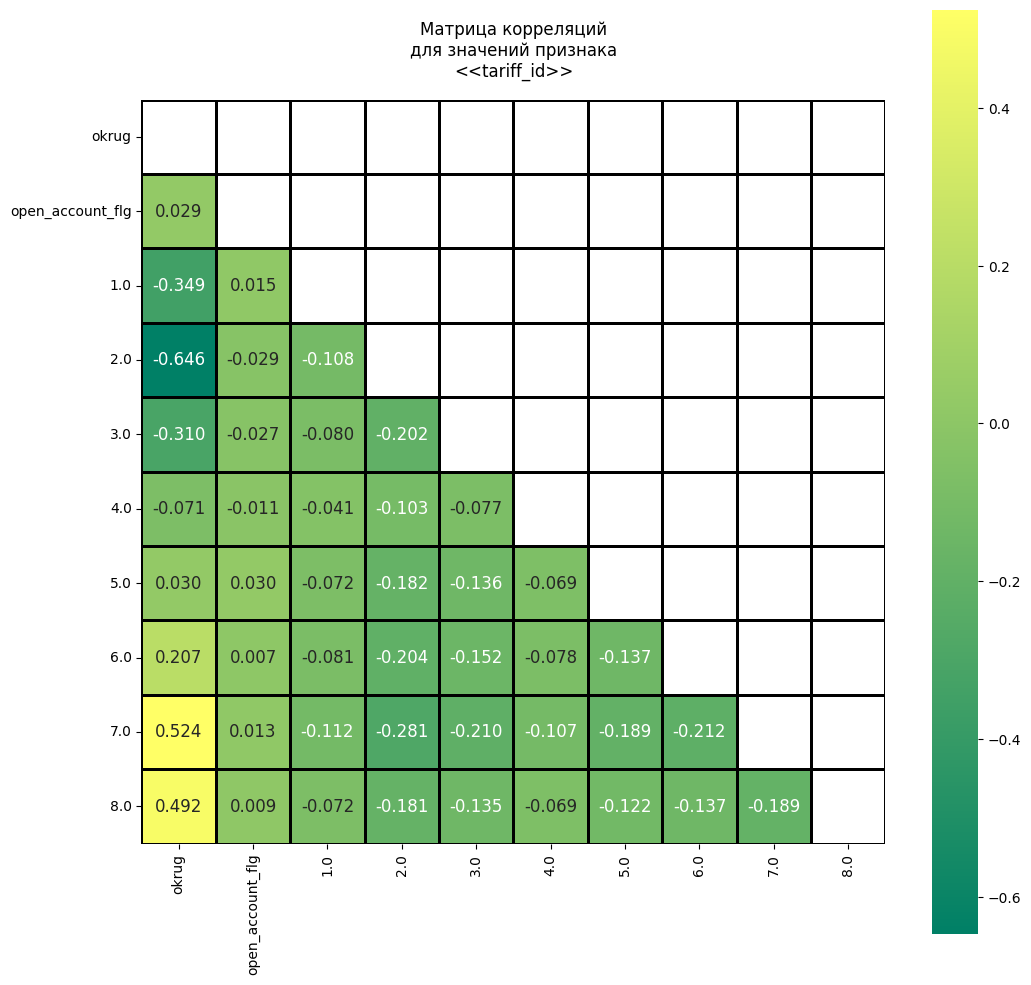

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(data = df_okrug.corr(), annot=True,
                 square=True, annot_kws={"size":12},
                 cmap='summer', fmt='.3f', linewidths=1,
                 linecolor='black', mask=np.triu(df_okrug.corr()))
plt.title('Матрица корреляций\nдля значений признака\n<<tariff_id>>', y = 1.02)
plt.show()

Для определения характера зависимости между 'okrug' и целевым признаком 'open_account_flg' рассчитаем моду по каждому из занчений (open_account_flg = 0 и open_account_flg = 1).

In [ ]:
df_okrug_count = df_okrug.groupby(['open_account_flg', \
                                                     'okrug']).\
                                      agg(count = ('okrug', 'count')).\
                                      reset_index()

df_okrug_count

open_account_flg  okrug  count
0                  0    1.0   5320
1                  0    2.0  29178
2                  0    3.0  18017
3                  0    4.0   5191
4                  0    5.0  14037
5                  0    6.0  17673
6                  0    7.0  29915
7                  0    8.0  14323
8                  1    1.0   1247
9                  1    2.0   4880
10                 1    3.0   2887
11                 1    4.0    861
12                 1    5.0   3410
13                 1    6.0   3629
14                 1    7.0   6248
15                 1    8.0   2991

In [ ]:
df_okrug_count['percent'] = np.nan
for i in df_okrug_count.index:
    if df_okrug_count.loc[i, ('open_account_flg')] == 0:
        df_okrug_count.loc[i, ('percent')] = (df_okrug_count['count'][i]/\
        df_okrug_count[df_okrug_count.open_account_flg == 0]\
         ['count'].sum()*100)
    else:
        df_okrug_count.loc[i, ('percent')] = df_okrug_count['count'][i]/\
        df_okrug_count[df_okrug_count.open_account_flg == 1]\
         ['count'].sum()*100
df_okrug_count['percent'] = round(df_okrug_count['percent'],2)
df_okrug_count

open_account_flg  okrug  count  percent
0                  0    1.0   5320     3.98
1                  0    2.0  29178    21.83
2                  0    3.0  18017    13.48
3                  0    4.0   5191     3.88
4                  0    5.0  14037    10.50
5                  0    6.0  17673    13.22
6                  0    7.0  29915    22.38
7                  0    8.0  14323    10.72
8                  1    1.0   1247     4.77
9                  1    2.0   4880    18.66
10                 1    3.0   2887    11.04
11                 1    4.0    861     3.29
12                 1    5.0   3410    13.04
13                 1    6.0   3629    13.88
14                 1    7.0   6248    23.89
15                 1    8.0   2991    11.44

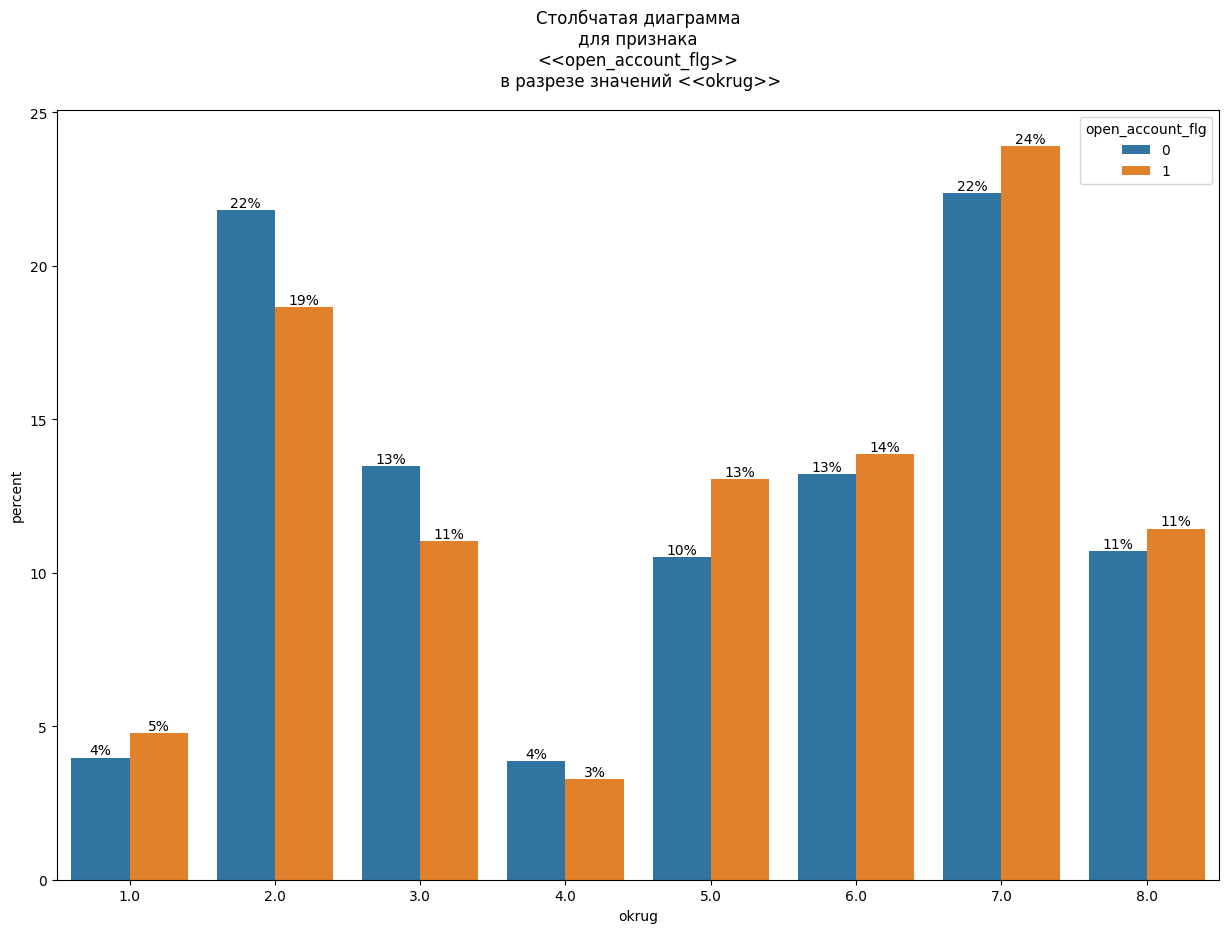

In [ ]:
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.barplot(data = df_okrug_count,
              x = df_okrug_count['okrug'],
              y = df_okrug_count['percent'],
              hue = df_okrug_count['open_account_flg'],
                 );
for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.0f}%'.format(p.get_height()),
            (x.mean(), y), ha = 'center', va = 'bottom', fontsize = 10)
plt.title('Столбчатая диаграмма\nдля признака\n<<open_account_flg>>\n в разрезе значений <<okrug>>', y = 1.02)
plt.show()

Таким образом, учитывая показатели моды признака 'okrug' и коэффициенты корреляции, можно установить, что клиенты из 2 и 3 федеральных округов скорее откажутся открывать кредитные карты, нежели клиенты, проживающие в пятом. Остальные значения 'okrug' не оказывают существенного влияния на целевую переменную, т.к. их доли в разрезе целевых групп клиентов приблизительно равны.

## credit_count - Количество кредитов у клиента

In [ ]:
df_credit_count = df_copy[['credit_count', 'open_account_flg']]
df_credit_count

credit_count  open_account_flg
0                1.0                 0
2                5.0                 0
3                2.0                 0
5                0.0                 0
7                3.0                 0
...              ...               ...
170741           6.0                 0
170742           1.0                 0
170743           1.0                 0
170744           2.0                 0
170745           3.0                 0

[159807 rows x 2 columns]

In [ ]:
# список уникальных значений категориального признака 'credit_count'
credit_count_var = list(df_copy['credit_count'].unique())
credit_count_var.sort()
credit_count_var

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0]

In [ ]:
# добавление пустых столбцов в DF df_credit_count.
# Заголовки столбцов соответствуют уникальным начениям признака credit_count

for name in credit_count_var:
    df_credit_count.loc[:, (name)] = np.nan

In [ ]:
df_credit_count.head(2)

credit_count  open_account_flg  0.0  1.0  2.0  3.0  4.0  5.0  6.0  7.0  \
0           1.0                 0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2           5.0                 0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   8.0  9.0  10.0  11.0  12.0  13.0  14.0  15.0  
0  NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2  NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN

In [ ]:
# добавляем новые столбцы
for i in credit_count_var:
    for ind in df_credit_count.index:
        if df_credit_count['credit_count'][ind] == i: # если значение credit_count совпадает с заголовком столбца
            df_credit_count.loc[ind, (i)] = 1 # ставим 1
        else:
            df_credit_count.loc[ind, (i)] = 0  # в противном случае 0

df_credit_count.head(10)

credit_count  open_account_flg  0.0  1.0  2.0  3.0  4.0  5.0  6.0  7.0  \
0            1.0                 0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
2            5.0                 0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
3            2.0                 0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
5            0.0                 0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
7            3.0                 0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
9            7.0                 0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
11           0.0                 0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
13           7.0                 0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
17           6.0                 1  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
18           2.0                 0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   

    8.0  9.0  10.0  11.0  12.0  13.0  14.0  15.0  
0   0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3   0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0  
5   0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0  
7   0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0  
9   0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0  
11  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0  
13  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0  
17  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0  
18  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0

In [ ]:
def test_z_criterion(col, goal, alpha):
    import scipy.stats as st
    import math
    gen_group_shape = df_credit_count[col].value_counts()
    goal_group_shape = df_credit_count.groupby(col)[goal].sum()
    p = goal_group_shape / gen_group_shape
    p_combined = goal_group_shape.sum() / gen_group_shape.sum()
    difference = p.iloc[0] - p.iloc[1]
    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/gen_group_shape.iloc[0] + 1/gen_group_shape.iloc[1]))
    distr = st.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    print('Результаты проверки гипотезы H_0 по z-критерию:')
    print('Уровень значимости alpha={:.2f}'.format(alpha))
    print('P-value: {:.2f}'.format(p_value))
    if p_value < alpha:
        print(f"""Отвергаем нулевую гипотезу: разница в долях
по признаку <<{col}>> статистически значима.""")
    else:
        print(f"""Не получилось отвергнуть нулевую гипотезу: разница в долях по
признаку <<{col}>> статистически незначима.""")
    print('------------------------------------------------------------')

In [ ]:
for col in credit_count_var:
    test_z_criterion(col, 'open_account_flg', 0.05)

Результаты проверки гипотезы H_0 по z-критерию:
Уровень значимости alpha=0.05
P-value: 0.00
Отвергаем нулевую гипотезу: разница в долях
по признаку <<0.0>> статистически значима.
------------------------------------------------------------
Результаты проверки гипотезы H_0 по z-критерию:
Уровень значимости alpha=0.05
P-value: 0.68
Не получилось отвергнуть нулевую гипотезу: разница в долях по
признаку <<1.0>> статистически незначима.
------------------------------------------------------------
Результаты проверки гипотезы H_0 по z-критерию:
Уровень значимости alpha=0.05
P-value: 0.00
Отвергаем нулевую гипотезу: разница в долях
по признаку <<2.0>> статистически значима.
------------------------------------------------------------
Результаты проверки гипотезы H_0 по z-критерию:
Уровень значимости alpha=0.05
P-value: 0.03
Отвергаем нулевую гипотезу: разница в долях
по признаку <<3.0>> статистически значима.
------------------------------------------------------------
Результаты проверки гип

Так, проверка по z-критерию показала, что признак 'credit_count' оказывает влияние на целевую переменную, если принимает значения [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15]

In [ ]:
df_credit_count.columns

Index([    'credit_count', 'open_account_flg',                0.0,
                      1.0,                2.0,                3.0,
                      4.0,                5.0,                6.0,
                      7.0,                8.0,                9.0,
                     10.0,               11.0,               12.0,
                     13.0,               14.0,               15.0],
      dtype='object')

In [ ]:
# Отсеем "незначимые" столбцы

df_credit_count2 = df_credit_count[['credit_count', 'open_account_flg', 0.0,
                                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0,
                                    10.0, 12.0, 15.0]]
df_credit_count2

credit_count  open_account_flg  0.0  2.0  3.0  4.0  5.0  6.0  7.0  \
0                1.0                 0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2                5.0                 0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
3                2.0                 0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
5                0.0                 0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
7                3.0                 0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
...              ...               ...  ...  ...  ...  ...  ...  ...  ...   
170741           6.0                 0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
170742           1.0                 0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
170743           1.0                 0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
170744           2.0                 0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
170745           3.0                 0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   

        8.0  9.0  10.0  12.0  15.0  
0       0.0  0.0   0.0   0.0   0.0  
2       0.0  0.0   0.0   0.0   0.0  
3       0.0  0.0   0.0   0.0   0.0  
5       0.0  0.0   0.0   0.0   0.0  
7       0.0  0.0   0.0   0.0   0.0  
...     ...  ...   ...   ...   ...  
170741  0.0  0.0   0.0   0.0   0.0  
170742  0.0  0.0   0.0   0.0   0.0  
170743  0.0  0.0   0.0   0.0   0.0  
170744  0.0  0.0   0.0   0.0   0.0  
170745  0.0  0.0   0.0   0.0   0.0  

[159807 rows x 14 columns]

In [ ]:
df_credit_count2.corr()

credit_count  open_account_flg       0.0       2.0  \
credit_count          1.000000          0.035900 -0.517400 -0.034017   
open_account_flg      0.035900          1.000000 -0.023777 -0.010397   
0.0                  -0.517400         -0.023777  1.000000 -0.237018   
2.0                  -0.034017         -0.010397 -0.237018  1.000000   
3.0                   0.209742          0.005328 -0.181362 -0.227935   
4.0                   0.330519          0.008875 -0.134550 -0.169101   
5.0                   0.361774          0.010568 -0.096306 -0.121037   
6.0                   0.346616          0.014300 -0.068549 -0.086152   
7.0                   0.306565          0.012082 -0.048229 -0.060614   
8.0                   0.263449          0.013498 -0.034409 -0.043245   
9.0                   0.212145          0.009775 -0.023686 -0.029769   
10.0                  0.164621          0.012063 -0.016050 -0.020172   
12.0                  0.120171          0.006989 -0.009347 -0.011747   
15.0                  0.065635          0.005387 -0.003917 -0.004923   

                       3.0       4.0       5.0       6.0       7.0       8.0  \
credit_count      0.209742  0.330519  0.361774  0.346616  0.306565  0.263449   
open_account_flg  0.005328  0.008875  0.010568  0.014300  0.012082  0.013498   
0.0              -0.181362 -0.134550 -0.096306 -0.068549 -0.048229 -0.034409   
2.0              -0.227935 -0.169101 -0.121037 -0.086152 -0.060614 -0.043245   
3.0               1.000000 -0.129394 -0.092616 -0.065922 -0.046381 -0.033090   
4.0              -0.129394  1.000000 -0.068710 -0.048906 -0.034409 -0.024549   
5.0              -0.092616 -0.068710  1.000000 -0.035006 -0.024629 -0.017571   
6.0              -0.065922 -0.048906 -0.035006  1.000000 -0.017530 -0.012507   
7.0              -0.046381 -0.034409 -0.024629 -0.017530  1.000000 -0.008799   
8.0              -0.033090 -0.024549 -0.017571 -0.012507 -0.008799  1.000000   
9.0              -0.022778 -0.016899 -0.012096 -0.008610 -0.006057 -0.004322   
10.0             -0.015435 -0.011451 -0.008196 -0.005834 -0.004105 -0.002928   
12.0             -0.008989 -0.006669 -0.004773 -0.003398 -0.002390 -0.001705   
15.0             -0.003767 -0.002795 -0.002000 -0.001424 -0.001002 -0.000715   

                       9.0      10.0      12.0      15.0  
credit_count      0.212145  0.164621  0.120171  0.065635  
open_account_flg  0.009775  0.012063  0.006989  0.005387  
0.0              -0.023686 -0.016050 -0.009347 -0.003917  
2.0              -0.029769 -0.020172 -0.011747 -0.004923  
3.0              -0.022778 -0.015435 -0.008989 -0.003767  
4.0              -0.016899 -0.011451 -0.006669 -0.002795  
5.0              -0.012096 -0.008196 -0.004773 -0.002000  
6.0              -0.008610 -0.005834 -0.003398 -0.001424  
7.0              -0.006057 -0.004105 -0.002390 -0.001002  
8.0              -0.004322 -0.002928 -0.001705 -0.000715  
9.0               1.000000 -0.002016 -0.001174 -0.000492  
10.0             -0.002016  1.000000 -0.000796 -0.000333  
12.0             -0.001174 -0.000796  1.000000 -0.000194  
15.0             -0.000492 -0.000333 -0.000194  1.000000

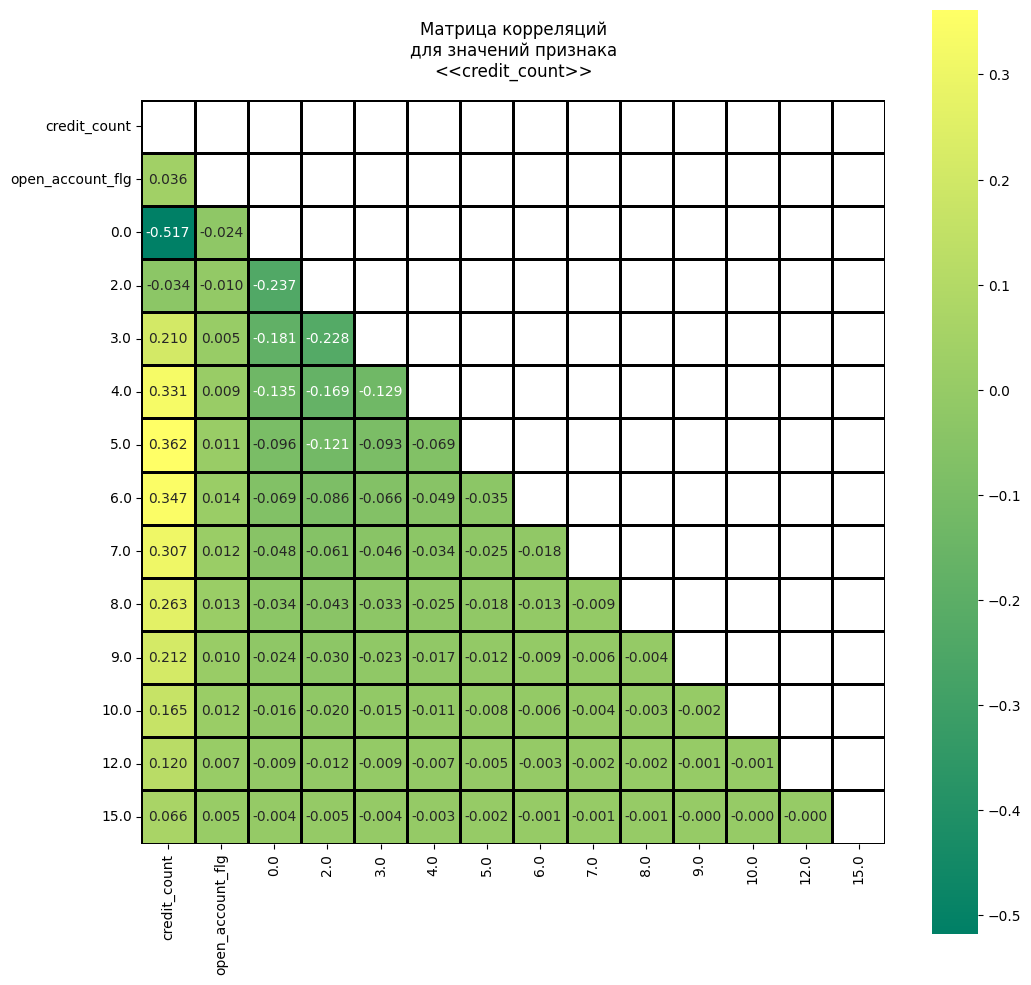

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(data = df_credit_count2.corr(), annot=True,
                 square=True, annot_kws={"size":10},
                 cmap='summer', fmt='.3f', linewidths=1,
                 linecolor='black', mask=np.triu(df_credit_count2.corr()))
plt.title('Матрица корреляций\nдля значений признака\n<<credit_count>>', y = 1.02)
plt.show()

Для определения характера зависимости между 'credit_count' и целевым признаком 'open_account_flg' рассчитаем моду по каждому из занчений (open_account_flg = 0 и open_account_flg = 1).

In [ ]:
df_credit_count_count = df_credit_count.groupby(['open_account_flg', \
                                                     'credit_count']).\
                                      agg(count = ('credit_count', 'count')).\
                                      reset_index()

df_credit_count_count

open_account_flg  credit_count  count
0                  0           0.0  21720
1                  0           1.0  37414
2                  0           2.0  30934
3                  0           3.0  19737
4                  0           4.0  11558
5                  0           5.0   6133
6                  0           6.0   3119
7                  0           7.0   1550
8                  0           8.0    771
9                  0           9.0    365
10                 0          10.0    156
11                 0          11.0     99
12                 0          12.0     53
13                 0          13.0     26
14                 0          14.0     11
15                 0          15.0      8
16                 1           0.0   3636
17                 1           1.0   7354
18                 1           2.0   5744
19                 1           3.0   3996
20                 1           4.0   2439
21                 1           5.0   1358
22                 1           6.0    766
23                 1           7.0    397
24                 1           8.0    226
25                 1           9.0    109
26                 1          10.0     62
27                 1          11.0     29
28                 1          12.0     21
29                 1          13.0      7
30                 1          14.0      4
31                 1          15.0      5

In [ ]:
df_credit_count_count['percent'] = np.nan
for i in df_credit_count_count.index:
    if df_credit_count_count.loc[i, ('open_account_flg')] == 0:
        df_credit_count_count.loc[i, ('percent')] = (df_credit_count_count['count'][i]/\
        df_credit_count_count[df_credit_count_count.open_account_flg == 0]\
         ['count'].sum()*100)
    else:
        df_credit_count_count.loc[i, ('percent')] = df_credit_count_count['count'][i]/\
        df_credit_count_count[df_credit_count_count.open_account_flg == 1]\
         ['count'].sum()*100
df_credit_count_count['percent'] = round(df_credit_count_count['percent'],2)
df_credit_count_count

open_account_flg  credit_count  count  percent
0                  0           0.0  21720    16.25
1                  0           1.0  37414    27.99
2                  0           2.0  30934    23.14
3                  0           3.0  19737    14.77
4                  0           4.0  11558     8.65
5                  0           5.0   6133     4.59
6                  0           6.0   3119     2.33
7                  0           7.0   1550     1.16
8                  0           8.0    771     0.58
9                  0           9.0    365     0.27
10                 0          10.0    156     0.12
11                 0          11.0     99     0.07
12                 0          12.0     53     0.04
13                 0          13.0     26     0.02
14                 0          14.0     11     0.01
15                 0          15.0      8     0.01
16                 1           0.0   3636    13.90
17                 1           1.0   7354    28.12
18                 1           2.0   5744    21.96
19                 1           3.0   3996    15.28
20                 1           4.0   2439     9.33
21                 1           5.0   1358     5.19
22                 1           6.0    766     2.93
23                 1           7.0    397     1.52
24                 1           8.0    226     0.86
25                 1           9.0    109     0.42
26                 1          10.0     62     0.24
27                 1          11.0     29     0.11
28                 1          12.0     21     0.08
29                 1          13.0      7     0.03
30                 1          14.0      4     0.02
31                 1          15.0      5     0.02

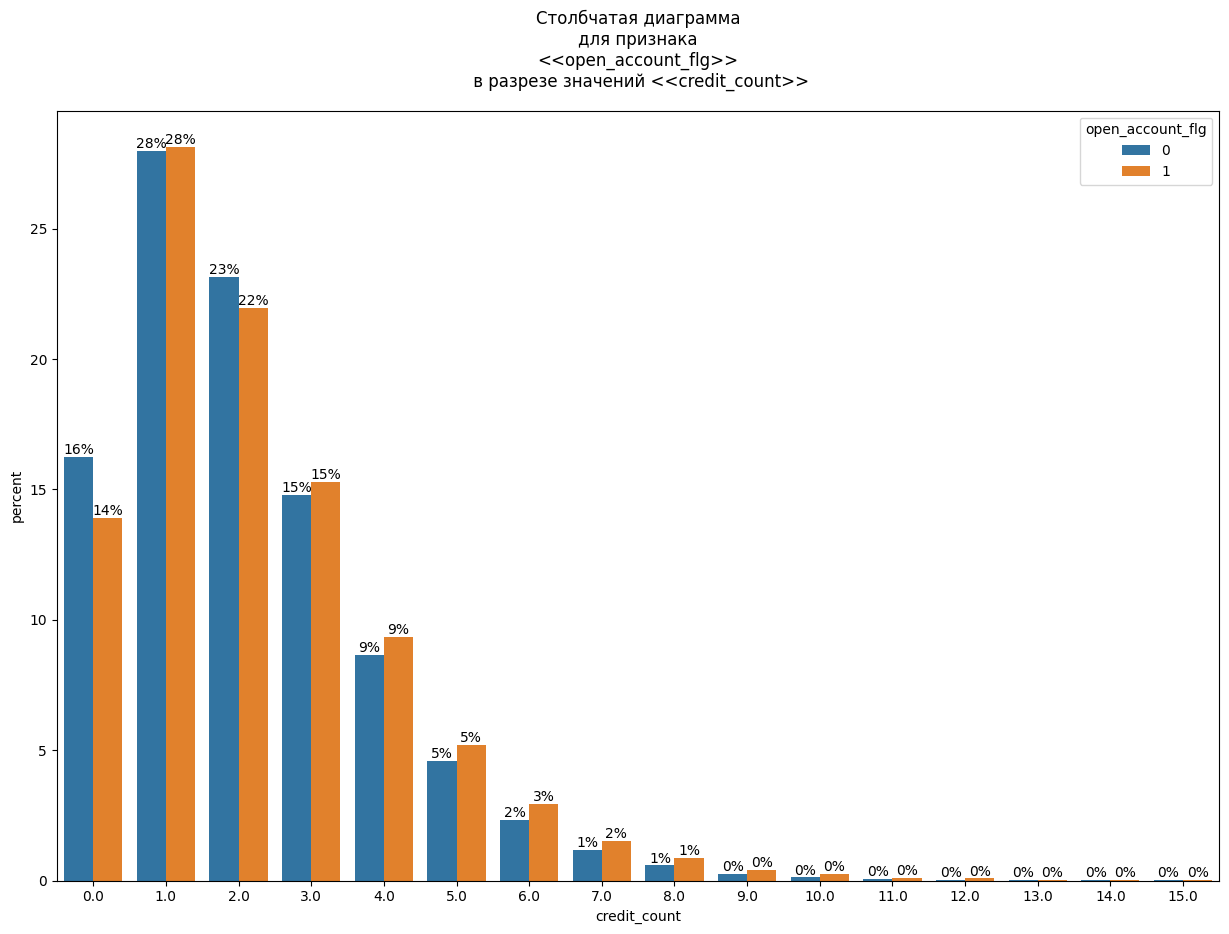

In [ ]:
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.barplot(data = df_credit_count_count,
              x = df_credit_count_count['credit_count'],
              y = df_credit_count_count['percent'],
              hue = df_credit_count_count['open_account_flg'],
                 );
for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.0f}%'.format(p.get_height()),
            (x.mean(), y), ha = 'center', va = 'bottom', fontsize = 10)
plt.title('Столбчатая диаграмма\nдля признака\n<<open_account_flg>>\n в разрезе значений <<credit_count>>', y = 1.02)
plt.show()

Таким образом, учитывая показатели моды признака 'credit_count' и коэффициенты корреляции, можно установить, что статистически значимого влияния количество кредитов на решения клиентов об открытии кредитных карт не оказывает. Из всех значений исследуемого признака 'credit_count' можно отметить - "0": Клиенты неохотно оформляют кредитные карты не будучу заемщиками.

## overdue_credit_count - Количество просроченных кредитов у клиента

In [ ]:
df_overdue_credit_count = df_copy[['overdue_credit_count', 'open_account_flg']]
df_overdue_credit_count

overdue_credit_count  open_account_flg
0                        1.0                 0
2                        0.0                 0
3                        0.0                 0
5                        0.0                 0
7                        0.0                 0
...                      ...               ...
170741                   0.0                 0
170742                   0.0                 0
170743                   0.0                 0
170744                   0.0                 0
170745                   0.0                 0

[159807 rows x 2 columns]

In [ ]:
# список уникальных значений категориального признака 'overdue_credit_count'
overdue_credit_count_var = list(df_copy['overdue_credit_count'].unique())
overdue_credit_count_var.sort()
overdue_credit_count_var

[0.0, 1.0, 2.0, 3.0]

In [ ]:
# добавление пустых столбцов в DF df_overdue_credit_count.
# Заголовки столбцов соответствуют уникальным начениям признака overdue_credit_count

for name in overdue_credit_count_var:
    df_overdue_credit_count.loc[:, (name)] = np.nan

In [ ]:
df_overdue_credit_count.head(2)

overdue_credit_count  open_account_flg  0.0  1.0  2.0  3.0
0                   1.0                 0  NaN  NaN  NaN  NaN
2                   0.0                 0  NaN  NaN  NaN  NaN

In [ ]:
# добавляем новые столбцы
for i in overdue_credit_count_var:
    for ind in df_overdue_credit_count.index:
        if df_overdue_credit_count['overdue_credit_count'][ind] == i: # если значение overdue_credit_count совпадает с заголовком столбца
            df_overdue_credit_count.loc[ind, (i)] = 1 # ставим 1
        else:
            df_overdue_credit_count.loc[ind, (i)] = 0  # в противном случае 0

df_overdue_credit_count.head(10)

overdue_credit_count  open_account_flg  0.0  1.0  2.0  3.0
0                    1.0                 0  0.0  1.0  0.0  0.0
2                    0.0                 0  1.0  0.0  0.0  0.0
3                    0.0                 0  1.0  0.0  0.0  0.0
5                    0.0                 0  1.0  0.0  0.0  0.0
7                    0.0                 0  1.0  0.0  0.0  0.0
9                    0.0                 0  1.0  0.0  0.0  0.0
11                   0.0                 0  1.0  0.0  0.0  0.0
13                   0.0                 0  1.0  0.0  0.0  0.0
17                   0.0                 1  1.0  0.0  0.0  0.0
18                   0.0                 0  1.0  0.0  0.0  0.0

In [ ]:
def test_z_criterion(col, goal, alpha):
    import scipy.stats as st
    import math
    gen_group_shape = df_overdue_credit_count[col].value_counts()
    goal_group_shape = df_overdue_credit_count.groupby(col)[goal].sum()
    p = goal_group_shape / gen_group_shape
    p_combined = goal_group_shape.sum() / gen_group_shape.sum()
    difference = p.iloc[0] - p.iloc[1]
    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/gen_group_shape.iloc[0] + 1/gen_group_shape.iloc[1]))
    distr = st.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    print('Результаты проверки гипотезы H_0 по z-критерию:')
    print('Уровень значимости alpha={:.2f}'.format(alpha))
    print('P-value: {:.2f}'.format(p_value))
    if p_value < alpha:
        print(f"""Отвергаем нулевую гипотезу: разница в долях
по признаку <<{col}>> статистически значима.""")
    else:
        print(f"""Не получилось отвергнуть нулевую гипотезу: разница в долях по
признаку <<{col}>> статистически незначима.""")
    print('------------------------------------------------------------')

In [ ]:
for col in overdue_credit_count_var:
    test_z_criterion(col, 'open_account_flg', 0.05)

Результаты проверки гипотезы H_0 по z-критерию:
Уровень значимости alpha=0.05
P-value: 0.00
Отвергаем нулевую гипотезу: разница в долях
по признаку <<0.0>> статистически значима.
------------------------------------------------------------
Результаты проверки гипотезы H_0 по z-критерию:
Уровень значимости alpha=0.05
P-value: 0.00
Отвергаем нулевую гипотезу: разница в долях
по признаку <<1.0>> статистически значима.
------------------------------------------------------------
Результаты проверки гипотезы H_0 по z-критерию:
Уровень значимости alpha=0.05
P-value: 0.00
Отвергаем нулевую гипотезу: разница в долях
по признаку <<2.0>> статистически значима.
------------------------------------------------------------
Результаты проверки гипотезы H_0 по z-критерию:
Уровень значимости alpha=0.05
P-value: 0.83
Не получилось отвергнуть нулевую гипотезу: разница в долях по
признаку <<3.0>> статистически незначима.
------------------------------------------------------------


Так, проверка по z-критерию показала, что признак 'overdue_credit_count' не оказывает влияние на целевую переменную только, если равен 3. В остальных случаях влияние статистически значимо.

In [ ]:
df_overdue_credit_count.columns

Index(['overdue_credit_count', 'open_account_flg', 0.0, 1.0, 2.0, 3.0], dtype='object')

In [ ]:
# Отсеем "незначимые" столбцы

df_overdue_credit_count2 = df_overdue_credit_count[['overdue_credit_count', 'open_account_flg', 0.0, 1.0, 2.0]]
df_overdue_credit_count2

overdue_credit_count  open_account_flg  0.0  1.0  2.0
0                        1.0                 0  0.0  1.0  0.0
2                        0.0                 0  1.0  0.0  0.0
3                        0.0                 0  1.0  0.0  0.0
5                        0.0                 0  1.0  0.0  0.0
7                        0.0                 0  1.0  0.0  0.0
...                      ...               ...  ...  ...  ...
170741                   0.0                 0  1.0  0.0  0.0
170742                   0.0                 0  1.0  0.0  0.0
170743                   0.0                 0  1.0  0.0  0.0
170744                   0.0                 0  1.0  0.0  0.0
170745                   0.0                 0  1.0  0.0  0.0

[159807 rows x 5 columns]

In [ ]:
df_overdue_credit_count2.corr()

overdue_credit_count  open_account_flg       0.0  \
overdue_credit_count              1.000000          0.023384 -0.995206   
open_account_flg                  0.023384          1.000000 -0.023011   
0.0                              -0.995206         -0.023011  1.000000   
1.0                               0.983043          0.022429 -0.996127   
2.0                               0.161607          0.007710 -0.079945   

                           1.0       2.0  
overdue_credit_count  0.983043  0.161607  
open_account_flg      0.022429  0.007710  
0.0                  -0.996127 -0.079945  
1.0                   1.000000 -0.003822  
2.0                  -0.003822  1.000000

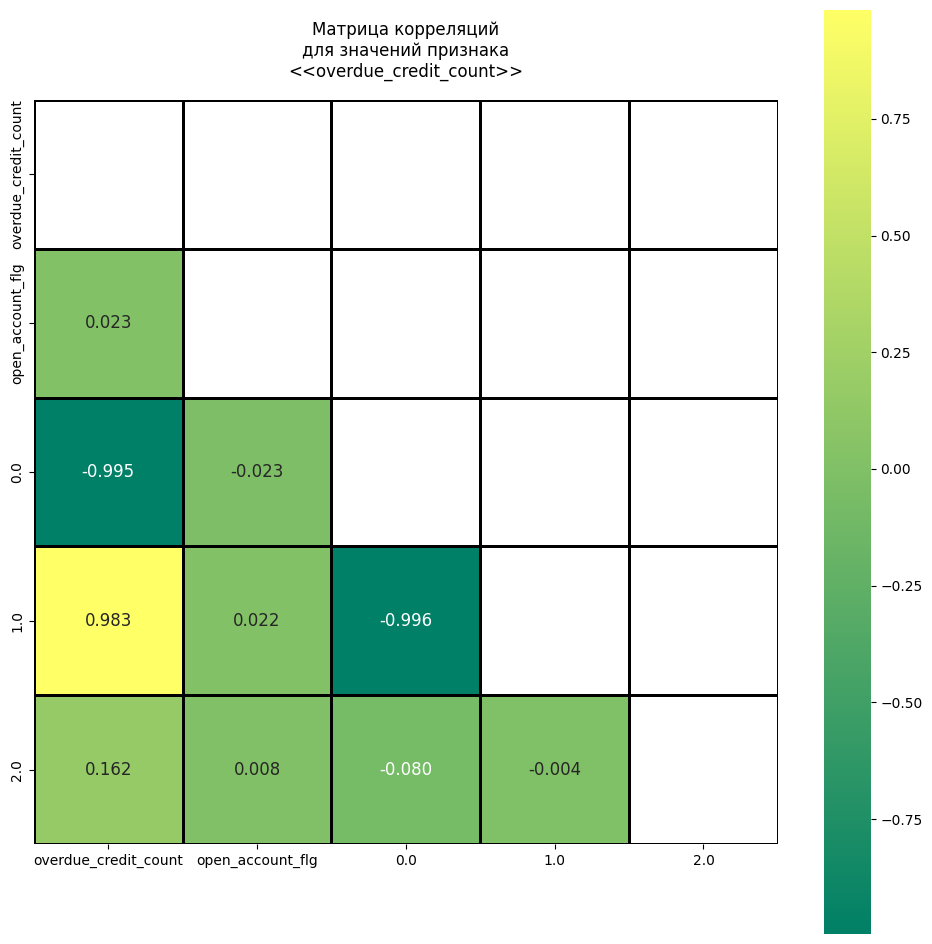

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(data = df_overdue_credit_count2.corr(), annot=True,
                 square=True, annot_kws={"size":12},
                 cmap='summer', fmt='.3f', linewidths=1,
                 linecolor='black', mask=np.triu(df_overdue_credit_count2.corr()))
plt.title('Матрица корреляций\nдля значений признака\n<<overdue_credit_count>>', y = 1.02)
plt.show()

Для определения характера зависимости между 'overdue_credit_count' и целевым признаком 'open_account_flg' рассчитаем моду по каждому из занчений (open_account_flg = 0 и open_account_flg = 1).

In [ ]:
df_overdue_credit_count_count = df_overdue_credit_count.groupby(['open_account_flg', \
                                                     'overdue_credit_count']).\
                                      agg(count = ('overdue_credit_count', 'count')).\
                                      reset_index()

df_overdue_credit_count_count

open_account_flg  overdue_credit_count   count
0                 0                   0.0  127818
1                 0                   1.0    5799
2                 0                   2.0      33
3                 0                   3.0       4
4                 1                   0.0   24671
5                 1                   1.0    1465
6                 1                   2.0      16
7                 1                   3.0       1

In [ ]:
df_overdue_credit_count_count['percent'] = np.nan
for i in df_overdue_credit_count_count.index:
    if df_overdue_credit_count_count.loc[i, ('open_account_flg')] == 0:
        df_overdue_credit_count_count.loc[i, ('percent')] = (df_overdue_credit_count_count['count'][i]/\
        df_overdue_credit_count_count[df_overdue_credit_count_count.open_account_flg == 0]\
         ['count'].sum()*100)
    else:
        df_overdue_credit_count_count.loc[i, ('percent')] = df_overdue_credit_count_count['count'][i]/\
        df_overdue_credit_count_count[df_overdue_credit_count_count.open_account_flg == 1]\
         ['count'].sum()*100
df_overdue_credit_count_count['percent'] = round(df_overdue_credit_count_count['percent'],2)
df_overdue_credit_count_count

open_account_flg  overdue_credit_count   count  percent
0                 0                   0.0  127818    95.63
1                 0                   1.0    5799     4.34
2                 0                   2.0      33     0.02
3                 0                   3.0       4     0.00
4                 1                   0.0   24671    94.33
5                 1                   1.0    1465     5.60
6                 1                   2.0      16     0.06
7                 1                   3.0       1     0.00

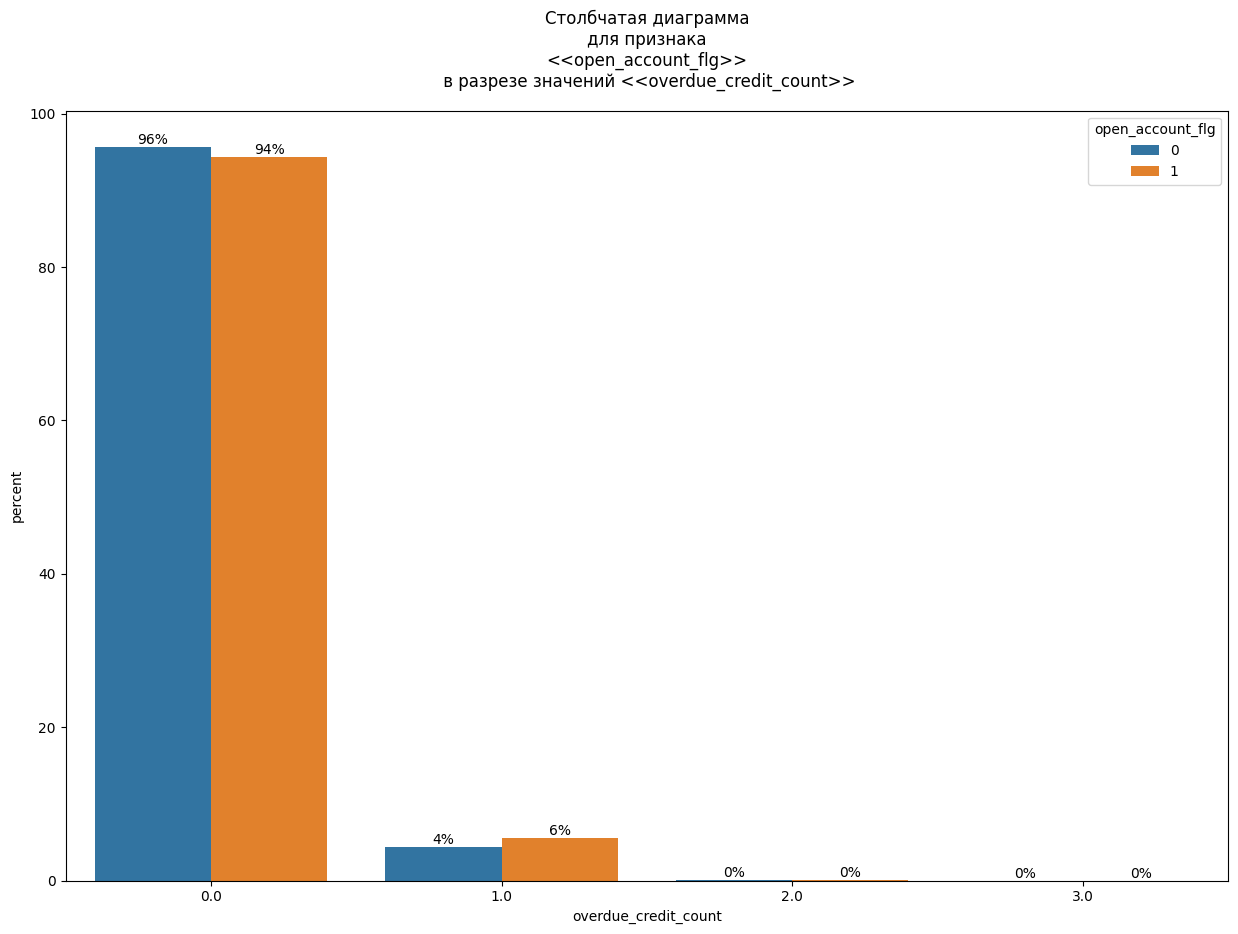

In [ ]:
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.barplot(data = df_overdue_credit_count_count,
              x = df_overdue_credit_count_count['overdue_credit_count'],
              y = df_overdue_credit_count_count['percent'],
              hue = df_overdue_credit_count_count['open_account_flg'],
                 );
for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.0f}%'.format(p.get_height()),
            (x.mean(), y), ha = 'center', va = 'bottom', fontsize = 10)
plt.title('Столбчатая диаграмма\nдля признака\n<<open_account_flg>>\n в разрезе значений <<overdue_credit_count>>', y = 1.02)
plt.show()

Таким образом, учитывая показатели моды признака 'overdue_credit_count' и коэффициенты корреляции, можно установить, что клиенты охотнее открывают кредитные карты при наличии одного просроченного кредита, нежели клиенты без просрочки. Остальные значения 'overdue_credit_count' не оказывают существенного влияния на целевую переменную, т.к. их доли в разрезе целевых групп клиентов приблизительно равны, а удельный вес в общей совокупности показателя 'overdue_credit_count' ничтожно мал.

## Результат анализа данных. Портреты клиентов.

Проведенный анализ данных позволяет составить портреты клиентов, которые будут открывать карту и которые откажутся. Характеристики таких клиентов представлены в таблице.

|Признак|Клиенты открывают кредитные карты `open_account_flg` = 1| Клиенты отказываются от кредитных карт `open_account_flg` = 0|
|--:|:--|:--|
|`gender`|код 2|код 1|
|`marital_status`|код 4|код 3|
|`job_position`|код 10|код 14|
|`credit_sum`|Среднняя сумма кредит меньше|Средняя сумма кредит больше
|`credit_month`|3, 6, 12, 18, 24 месяца(ев)|10 месяцев|
|`score_shk`|Средняя скоринговая оценка выше|Средняя скоринговая оценка выше|
|`education`|код 4|код 2|
|`tariff_id`|тарифы 2 и 19|тарифы 20, 25, 28, 30|
|`credit_count`||0|
|`overdue_credit_count`|1 просроченный кредит|просрочки отсутствуют|
|`okrug`|5 ФО|2, 3 ФО|

# Построение классификационных моделей

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

#загрузка классификаторов
from sklearn.tree import DecisionTreeClassifier, plot_tree # дерево решений
from sklearn.ensemble import RandomForestClassifier #случайный лес
from sklearn.linear_model import LogisticRegression # логистическая регресси
from sklearn.svm import SVC # метод опорных векторов
from sklearn.linear_model import SGDClassifier # стохастический градиентный спуск

#метрики
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans

pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150
pd.options.display.precision = 2

Построение и визуализация матрицы корреляций

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159807 entries, 0 to 170745
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   client_id             159807 non-null  int64         
 1   gender                159807 non-null  int64         
 2   age                   159807 non-null  float64       
 3   marital_status        159807 non-null  float64       
 4   job_position          159807 non-null  int64         
 5   credit_sum            159807 non-null  float64       
 6   credit_month          159807 non-null  int64         
 7   score_shk             159807 non-null  float64       
 8   education             159807 non-null  float64       
 9   tariff_id             159807 non-null  int64         
 10  living_region         159807 non-null  float64       
 11  okrug                 159807 non-null  float64       
 12  avg_income            159807 non-null  float64       
 13 

In [ ]:
df_copy.columns

Index(['client_id', 'gender', 'age', 'marital_status', 'job_position',
       'credit_sum', 'credit_month', 'score_shk', 'education', 'tariff_id',
       'living_region', 'okrug', 'avg_income', 'monthly_income',
       'credit_count', 'overdue_credit_count', 'open_account_flg', 'date_bank',
       'year', 'month', 'quarter'],
      dtype='object')

In [ ]:
# Удаление признаков 'client_id', 'date_bank', 'year', 'month', 'quarter'

df_ml = df_copy[['gender', 'age', 'marital_status', 'job_position',
       'credit_sum', 'credit_month', 'score_shk', 'education', 'tariff_id',
       'living_region', 'okrug', 'avg_income', 'monthly_income',
       'credit_count', 'overdue_credit_count', 'open_account_flg']]
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159807 entries, 0 to 170745
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   gender                159807 non-null  int64  
 1   age                   159807 non-null  float64
 2   marital_status        159807 non-null  float64
 3   job_position          159807 non-null  int64  
 4   credit_sum            159807 non-null  float64
 5   credit_month          159807 non-null  int64  
 6   score_shk             159807 non-null  float64
 7   education             159807 non-null  float64
 8   tariff_id             159807 non-null  int64  
 9   living_region         159807 non-null  float64
 10  okrug                 159807 non-null  float64
 11  avg_income            159807 non-null  float64
 12  monthly_income        159807 non-null  float64
 13  credit_count          159807 non-null  float64
 14  overdue_credit_count  159807 non-null  float64
 15  

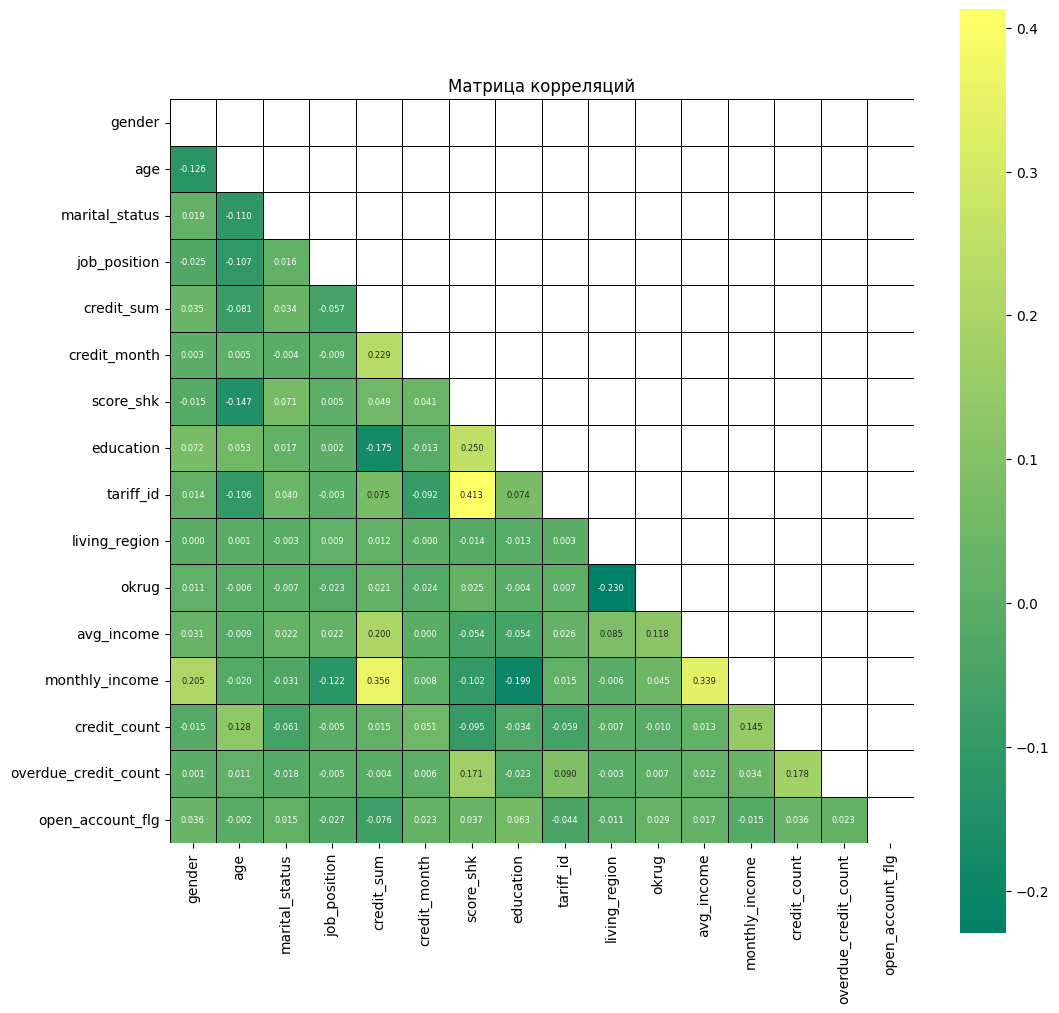

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(data = df_ml.corr(), annot=True,
                 square=True, annot_kws={"size":6},
                 cmap='summer', fmt='.3f', linewidths=0.5, linecolor='black', mask=np.triu(df_ml.corr()))
plt.title('Матрица корреляций')
plt.show()

Мультиколлинеарные признаки отсутствуют. Целевой признак `open_account_flg` не имеет тесной линейной зависимости от какого-либо из объясняющих признаков.

In [ ]:
df_ml.groupby('open_account_flg')['open_account_flg'].agg('count')/df_ml.shape[0]*100

open_account_flg
0    83.63
1    16.37
Name: open_account_flg, dtype: float64

Есть смещение целевого признака к показателю 0 (у клиентов нет кредитных карт), но будем считать выборку сбалансированной.

In [ ]:
# Формирование обучающих и тестирующих множеств

X = df_ml.drop(['open_account_flg'], axis = 1)
y = df_ml['open_account_flg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

Модель 1 - логистическая регрессия

In [ ]:
grid_searcher1 = GridSearchCV(
    LogisticRegression(max_iter=3000, random_state=42, solver = 'liblinear'),
    param_grid={
        'C': [0.01, 0.1, 0.5, 1, 10, 50],
        'penalty' : ['l1', 'l2']
    },
    scoring='accuracy'
)

In [ ]:
grid_searcher1.fit(X_train_st, y_train);
grid_searcher1.best_params_

{'C': 0.01, 'penalty': 'l2'}

In [ ]:
# Обучаем модель с оптимальными параметрами

lr = LogisticRegression(random_state=42, max_iter=3000, solver = 'liblinear', C=0.01, penalty = 'l2')
lr.fit(X_train_st, y_train)
y_pred = lr.predict(X_test_st)
lr_metrix = pd.Series([accuracy_score(y_test, y_pred),
                       precision_score(y_test, y_pred),
                      recall_score(y_test, y_pred)],
                      ['Accuracy', 'Precision', 'Recall'])
lr_imp_var = pd.DataFrame({'feature':X_train.columns, 'coeff':lr.coef_.tolist()[0]}, )
lr_imp_var['coeff'] = lr_imp_var['coeff'].apply(abs)
lr_imp_var.sort_values(by = 'coeff', ascending = False, inplace = True)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91     40103
           1       0.00      0.00      0.00      7840

    accuracy                           0.84     47943
   macro avg       0.42      0.50      0.46     47943
weighted avg       0.70      0.84      0.76     47943



In [ ]:
lr_metrix

Accuracy     0.84
Precision    0.00
Recall       0.00
dtype: float64

Модель 2 - случайный лес

In [ ]:
grid_searcher2 = GridSearchCV(
    RandomForestClassifier(),
    param_grid={
        'n_estimators': [1, 20, 40, 60, 80, 100],
        'max_depth' : [1, 2, 3, 4, 5, 6]
    },
    cv=5,
    scoring='accuracy')

In [ ]:
grid_searcher2.fit(X_train_st, y_train);
grid_searcher2.best_params_

{'max_depth': 6, 'n_estimators': 40}

In [ ]:
rnd_clf = RandomForestClassifier(n_estimators = 40, max_depth = 6, random_state=42)
rnd_clf.fit(X_train_st, y_train)
y_pred = rnd_clf.predict(X_test_st)
rnd_metrix = pd.Series([accuracy_score(y_test, y_pred),
                       precision_score(y_test, y_pred),
                      recall_score(y_test, y_pred)],
                      ['Accuracy', 'Precision', 'Recall'])
rnd_imp_var = pd.DataFrame({'feature':X_train.columns, 'coeff':rnd_clf.feature_importances_}, )
rnd_imp_var['coeff'] = rnd_imp_var['coeff'].apply(abs)
rnd_imp_var.sort_values(by = 'coeff', ascending = False, inplace = True)

Метрики качества на классификационных моделях 1 и 2

In [ ]:
(pd.concat({'Логрегрессия':lr_metrix, 'Случайный лес':rnd_metrix}, axis = 1, sort = False).
 style.set_caption('Метрики качества классификации'))

Визуализация значимости признаков по отношению к целевой переменной `open_account_flg`

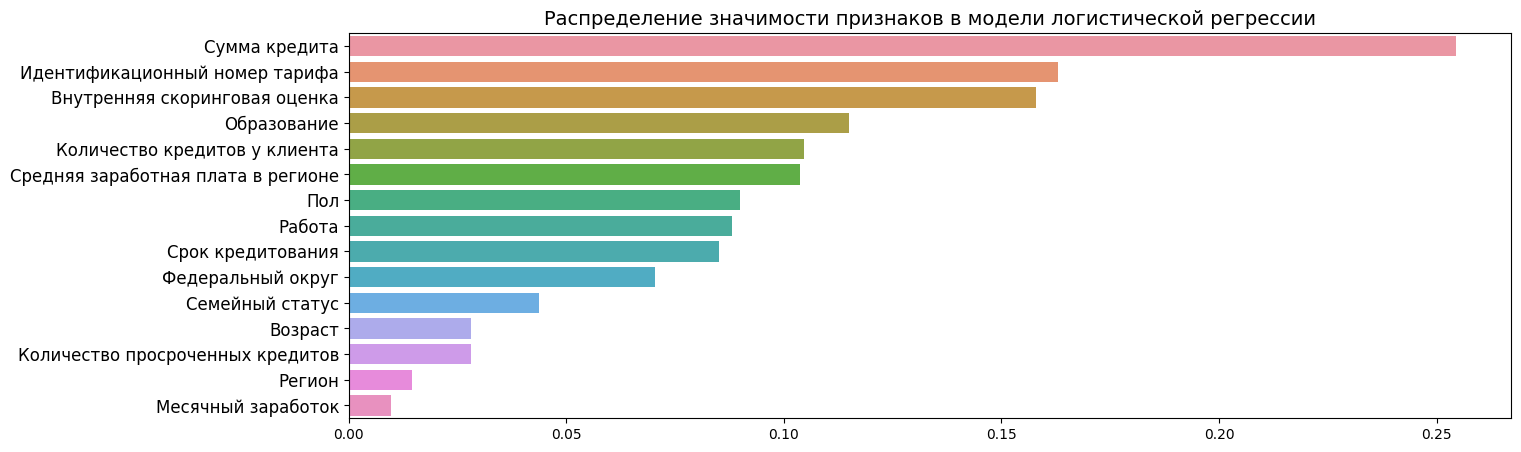

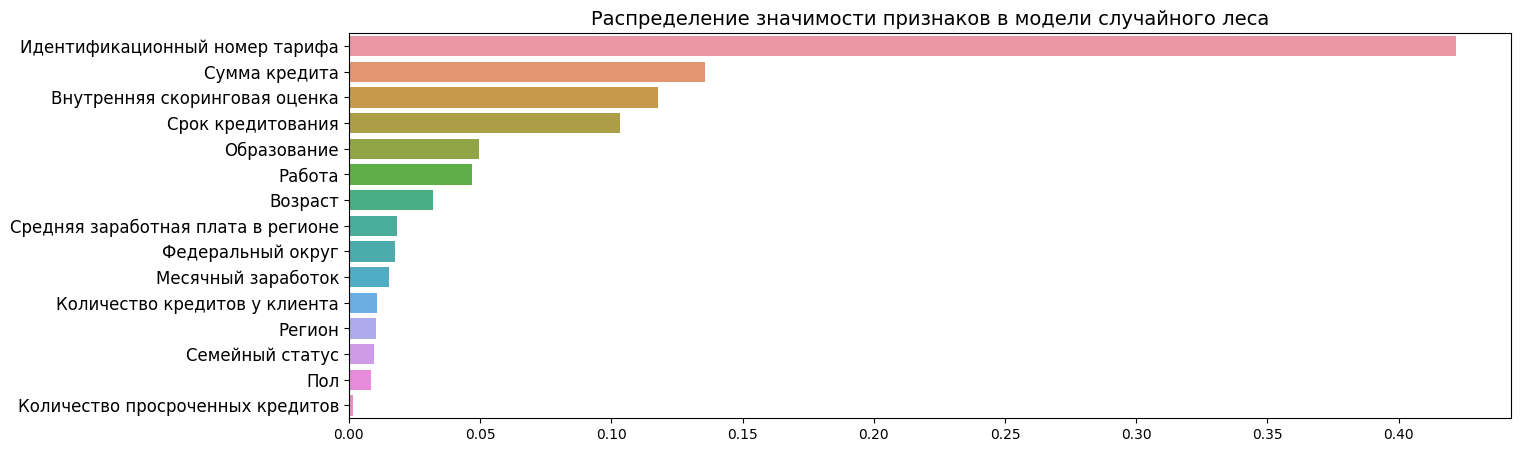

In [ ]:
fig, ax = plt.subplots(figsize = (15,5))
ax = sns.barplot(x='coeff', y='feature', data = lr_imp_var)
x_label=[]
for i in ax.get_yticklabels():
    x_label.append(dict_to_rus[i.get_text()])
ax.set_yticklabels(x_label, ha="right",fontsize = 12)
ax.set_title('Распределение значимости признаков в модели логистической регрессии',fontsize = 14)
plt.xlabel('',fontsize = 12)
plt.ylabel('', fontsize = 12);

fig, ax = plt.subplots(figsize = (15,5))
ax = sns.barplot(x='coeff', y='feature', data = rnd_imp_var)
x_label=[]
for i in ax.get_yticklabels():
    x_label.append(dict_to_rus[i.get_text()])
ax.set_yticklabels(x_label, ha="right",fontsize = 12)
ax.set_title('Распределение значимости признаков в модели случайного леса',fontsize = 14)
plt.xlabel('',fontsize = 12)
plt.ylabel('', fontsize = 12);

Вывод: построены классификационные модели:

* логистической регрессии;
* случайного леса.

Общая точность предсказания моделей (accuracy) одинакова.

По установленным метрикам качества precision и recall лучший результат показала классификационная модель 2 "Случайный лес". Определена также ранжированная последовательность объясняющих признаков.